In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pdf = pd.read_csv("dataset.csv")

In [3]:
pdf[:10]

,Unnamed: 0,CardHolder,age,cheque_count_12m_g20,cheque_count_12m_g21,cheque_count_12m_g25,cheque_count_12m_g32,cheque_count_12m_g33,cheque_count_12m_g38,cheque_count_12m_g39,...,sale_sum_6m_g24,sale_sum_6m_g25,sale_sum_6m_g26,sale_sum_6m_g32,sale_sum_6m_g33,sale_sum_6m_g44,sale_sum_6m_g54,stdev_days_between_visits_15d,stdev_discount_depth_15d,stdev_discount_depth_1m
0,0,16095858,47.0,3.0,22.0,19.0,3.0,28.0,8.0,7.0,...,3141.25,356.67,237.25,283.84,3648.23,1195.37,535.42,1.7078,0.2798,0.3008
1,1,15906620,57.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,...,113.39,62.69,58.71,87.01,179.83,0.00,122.98,0.0000,0.0000,0.0000
2,2,16495466,38.0,7.0,0.0,15.0,4.0,9.0,5.0,9.0,...,1239.19,533.46,83.37,593.13,1217.43,1336.83,3709.82,0.0000,0.0000,0.0803
3,3,16570217,65.0,6.0,3.0,25.0,2.0,10.0,14.0,11.0,...,139.68,1849.91,360.40,175.73,496.73,172.58,1246.21,0.0000,0.0000,0.0000
4,4,16346871,61.0,0.0,1.0,2.0,0.0,2.0,1.0,0.0,...,226.98,168.05,461.37,0.00,237.93,225.51,995.27,1.4142,0.3495,0.3495
5,5,15692946,27.0,0.0,0.0,7.0,0.0,2.0,1.0,0.0,...,10.90,379.43,90.07,0.00,239.39,114.48,209.34,3.0957,0.0584,0.1171
6,6,16536055,57.0,1.0,3.0,0.0,0.0,0.0,1.0,2.0,...,361.89,0.00,287.61,0.00,0.00,55.42,96.60,0.0000,0.0000,0.0000
7,7,16388254,32.0,1.0,5.0,7.0,1.0,6.0,2.0,4.0,...,825.75,19.19,195.98,0.00,343.24,73.78,100.37,0.0000,0.0000,0.0000
8,8,16406288,69.0,1.0,1.0,5.0,0.0,1.0,0.0,0.0,...,1218.97,166.49,408.97,0.00,115.93,329.43,0.00,0.0000,0.0000,0.0000
9,9,15779982,36.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,491.43,411.23,0.00,0.00,406.45,43.00,0.00,0.0000,0.0000,0.0000


In [9]:
group_column = "group"
target_column = "response_att"

test_value = 1
control_value = 0

In [32]:
def calc_mean_values(df, n_sections):
    delta = df.shape[0] // n_sections

    mean_values = []
    for i in range(n_sections):
        value = df[delta * i : delta * (i + 1)][target_column].mean()
        mean_values.append(value)
    
    return mean_values

In [41]:
def bars_graphic(df, column_name, n_sections):
    groups = df.groupby([group_column])
    test = groups.get_group(test_value)
    control = groups.get_group(control_value)
    
    test.sort_values(by=column_name, inplace=True)
    control.sort_values(by=column_name, inplace=True)
    
    test_values = calc_mean_values(test, n_sections)
    control_values = calc_mean_values(control, n_sections)
    
    plt.figure(figsize=(14,8))
    plt.bar(list(range(n_sections)), test_values, alpha=1, label='test')
    plt.bar(list(range(n_sections)), control_values, alpha=0.65, label='control')
    plt.title(column_name)
    plt.legend()
    plt.show()

/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


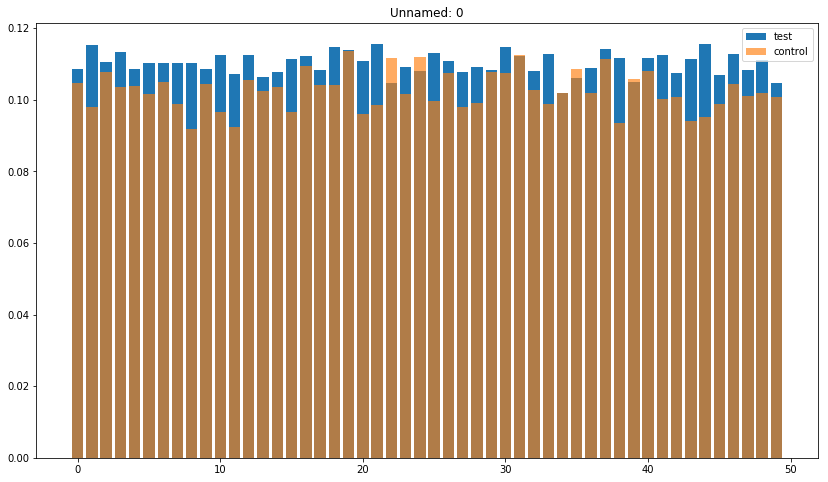

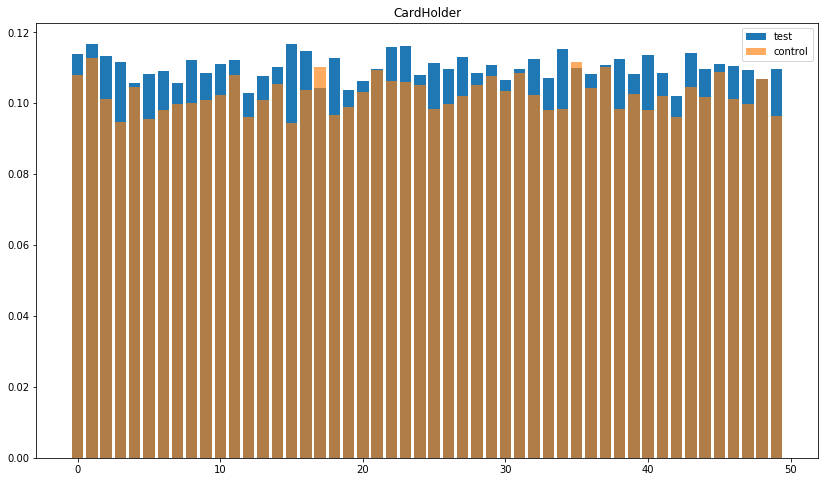

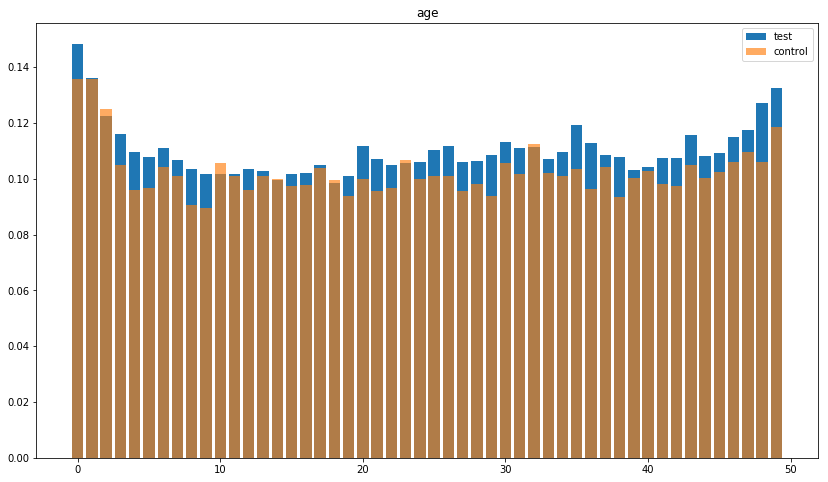

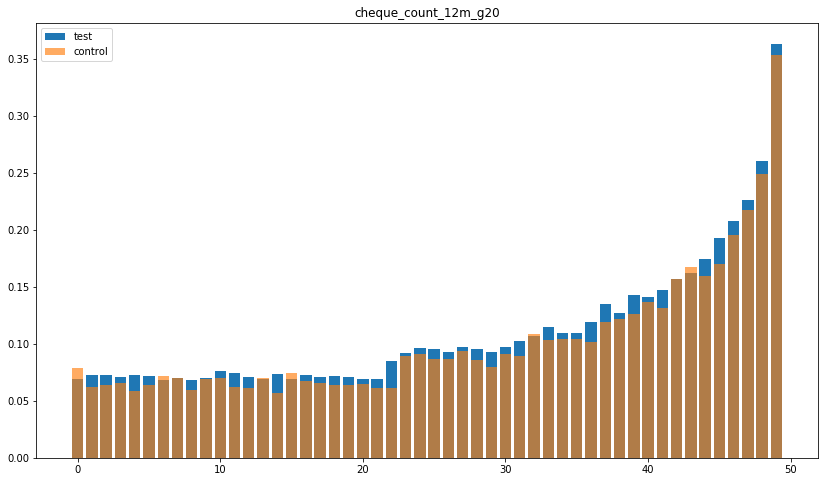

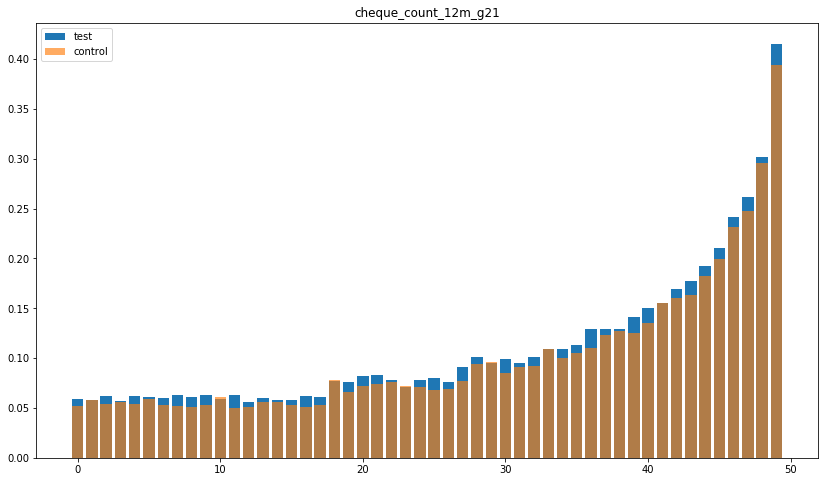

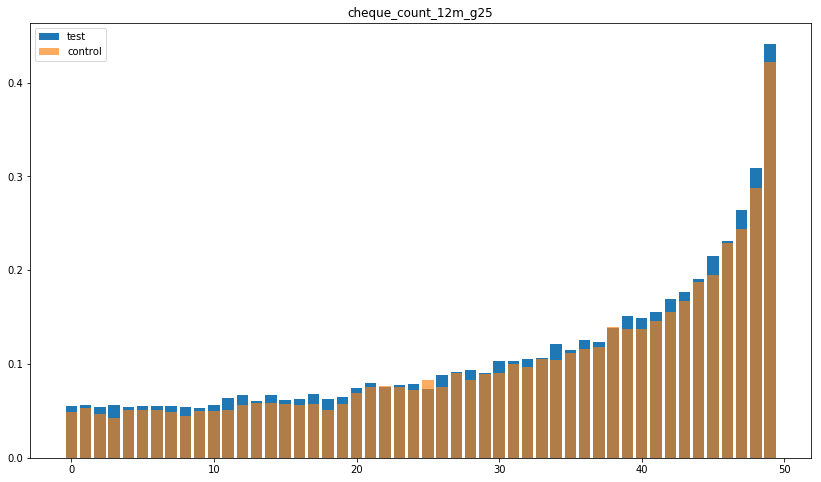

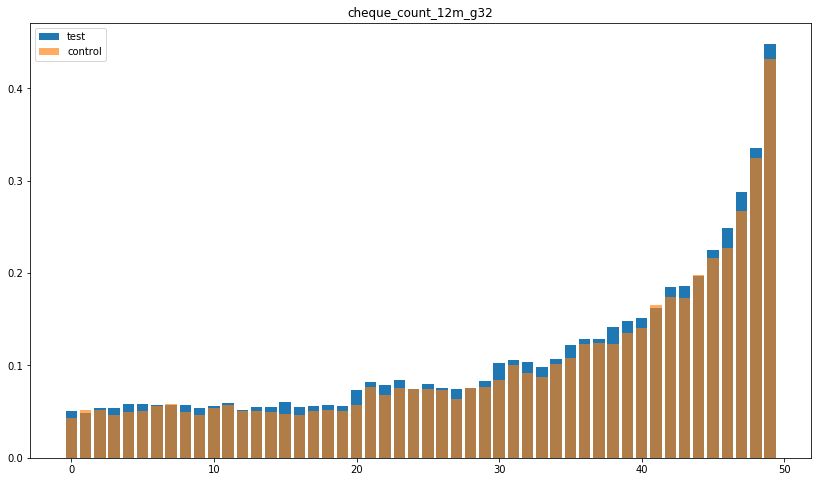

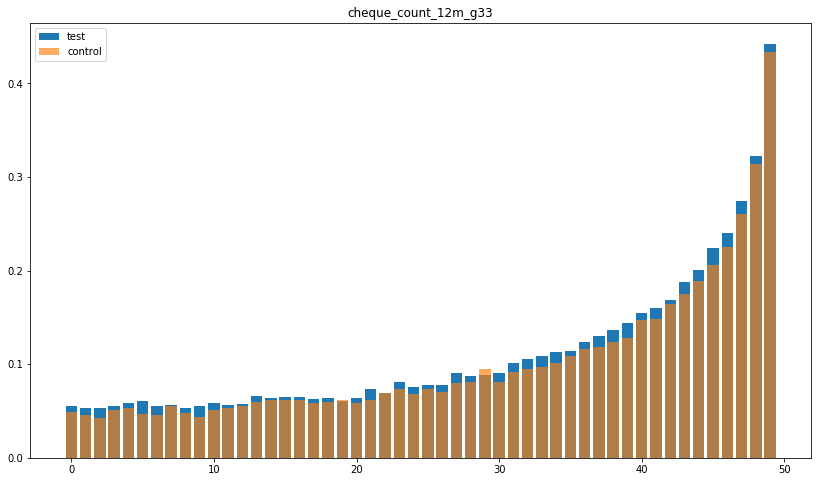

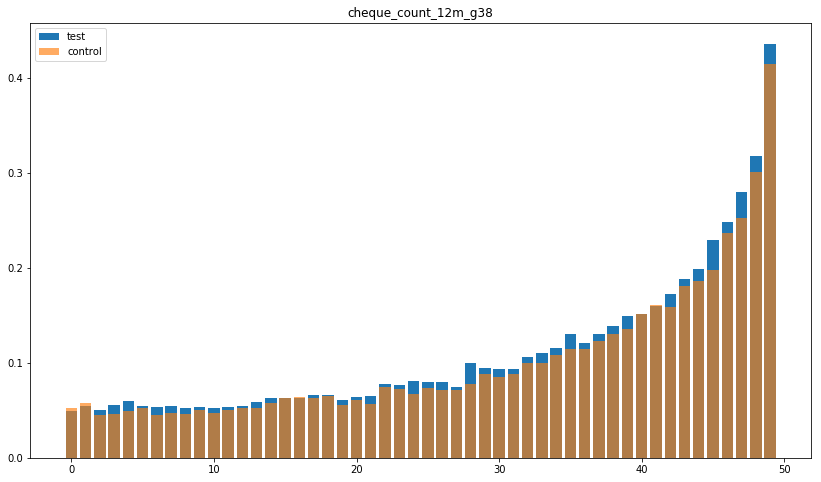

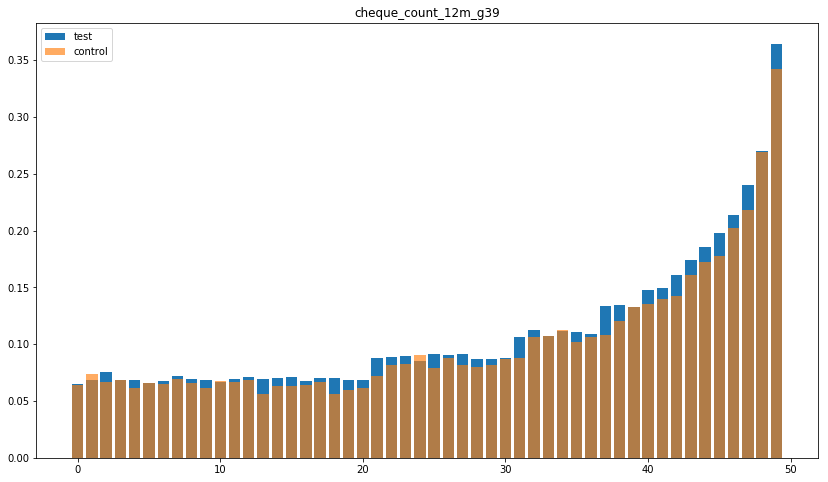

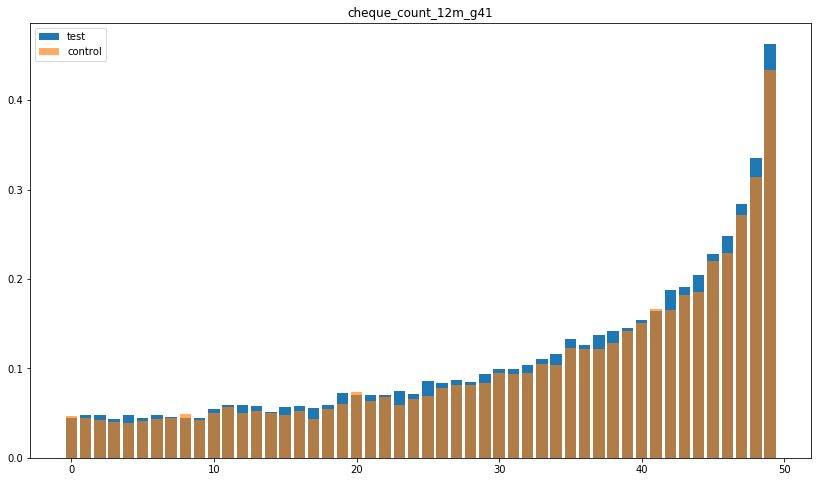

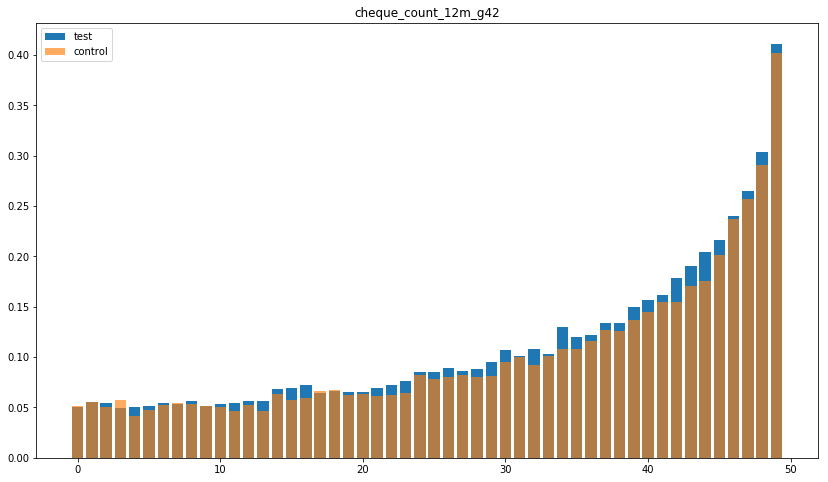

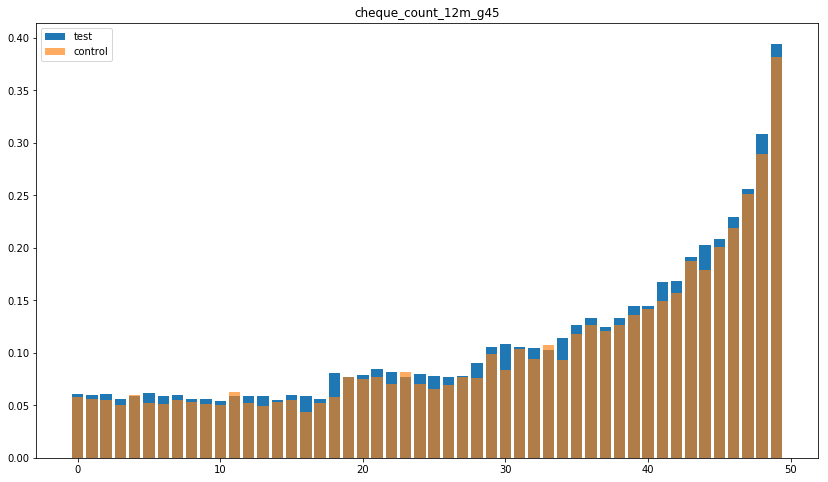

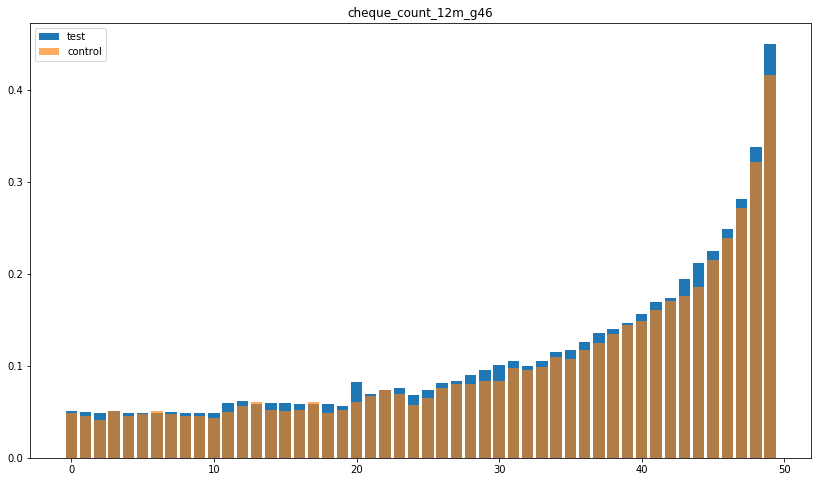

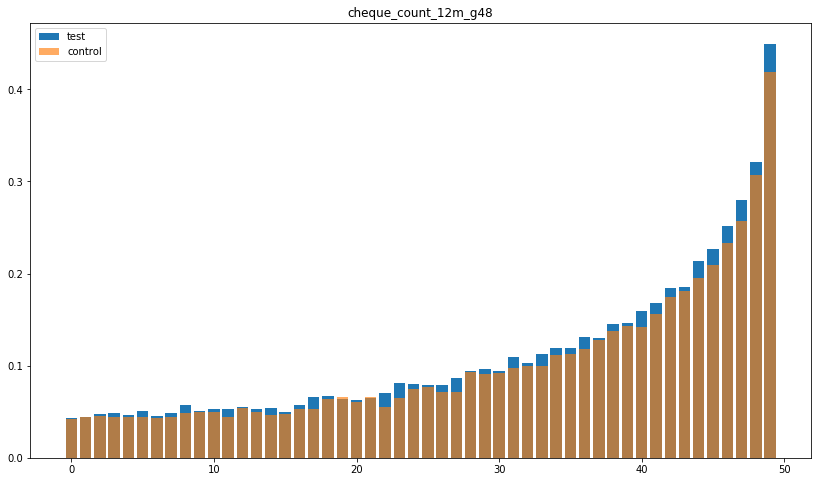

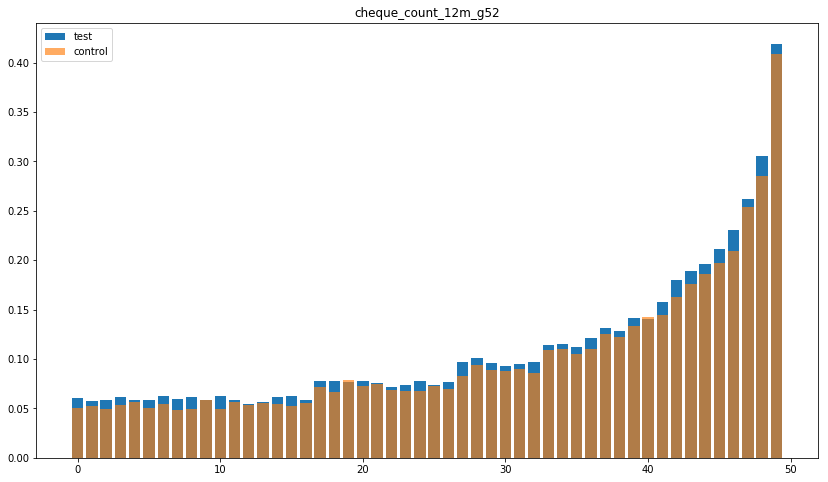

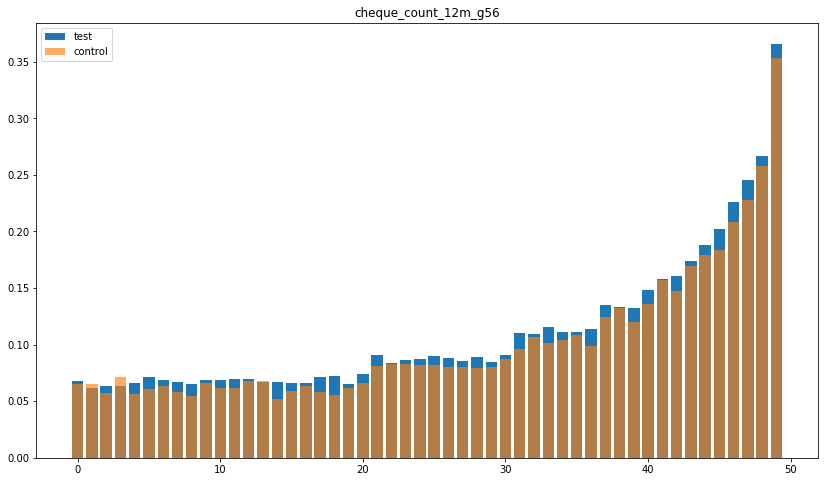

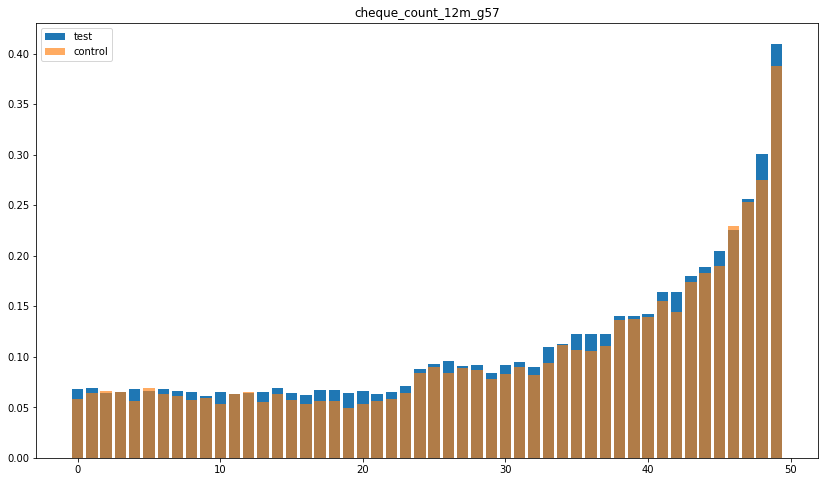

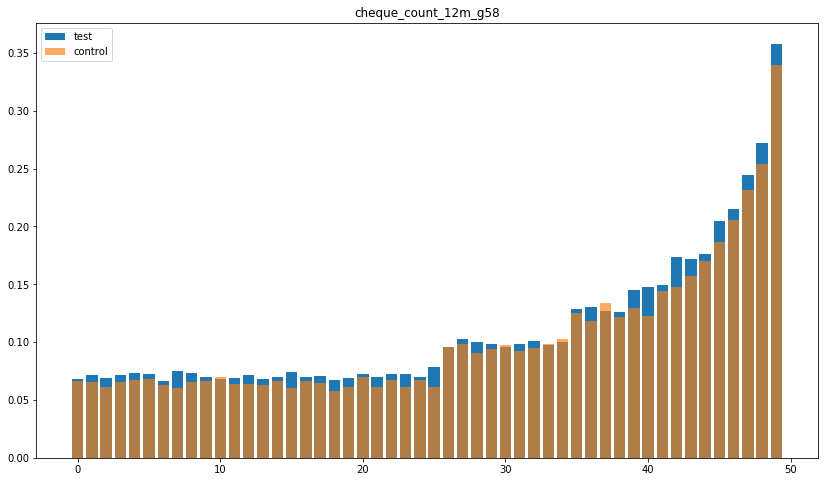

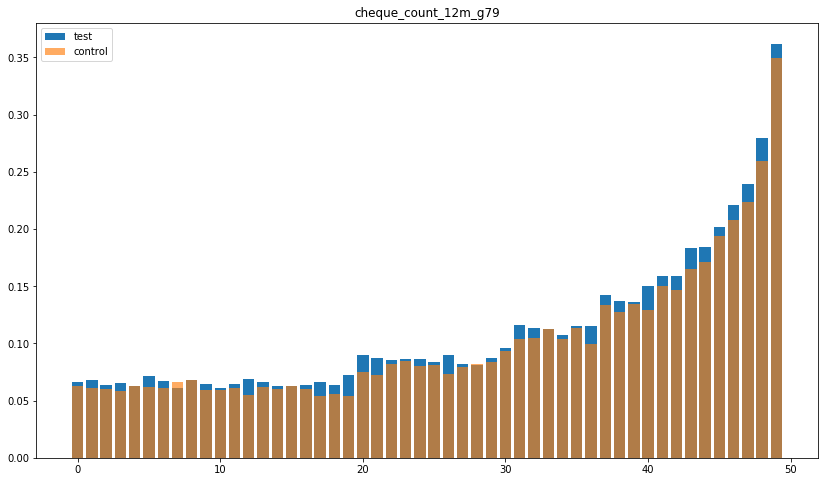

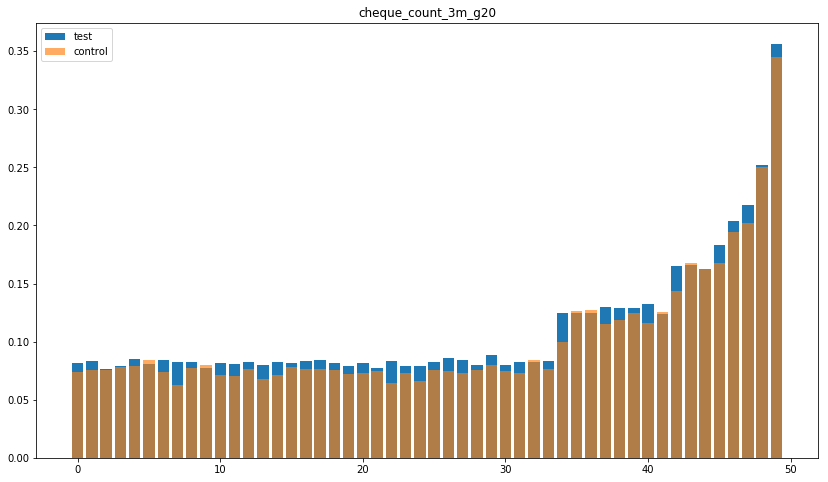

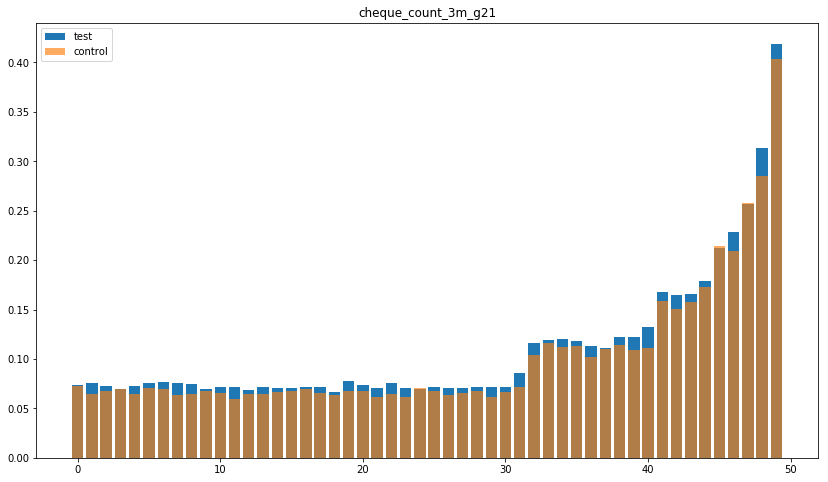

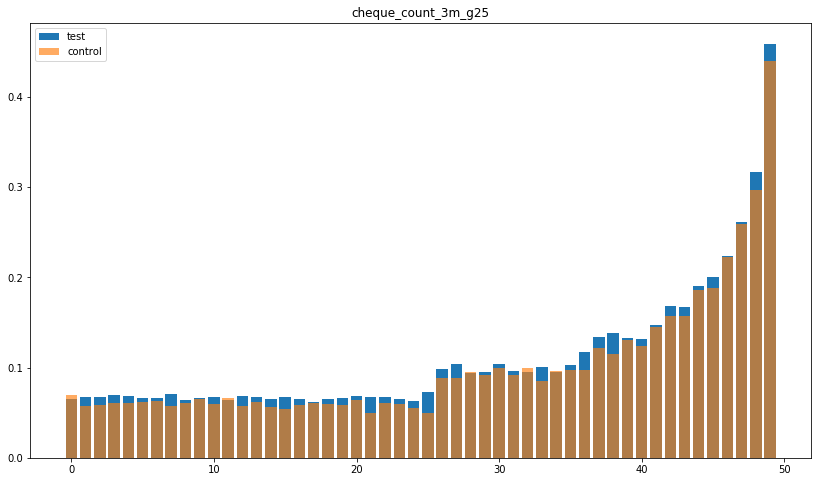

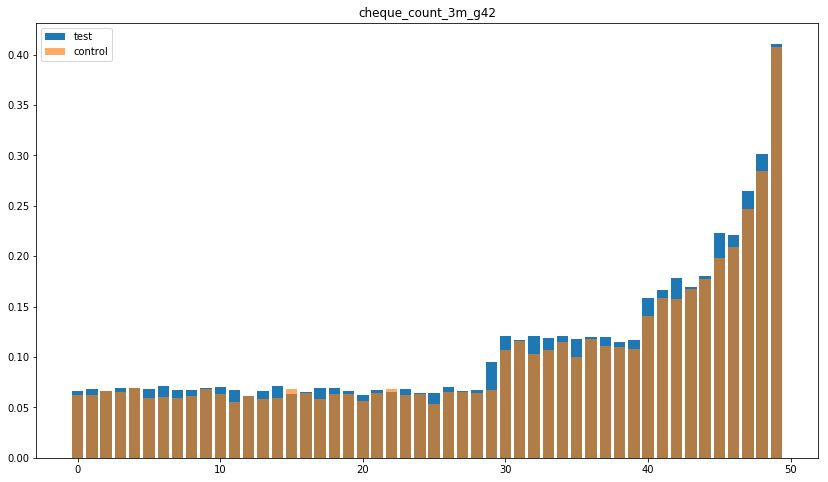

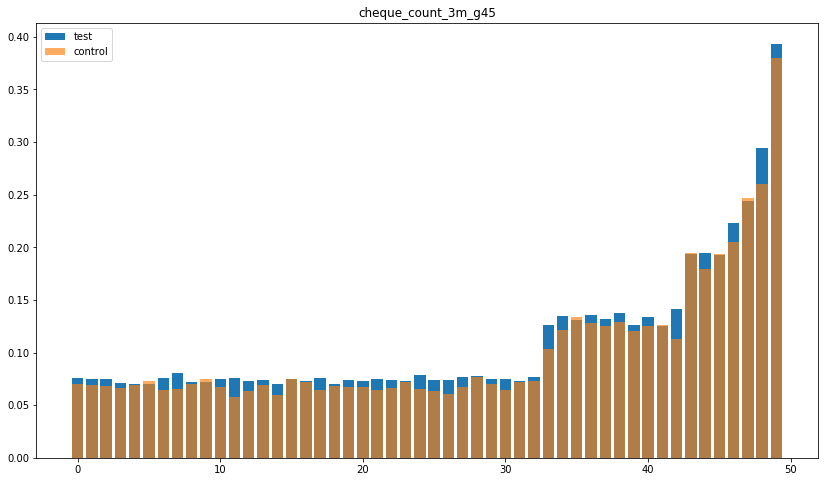

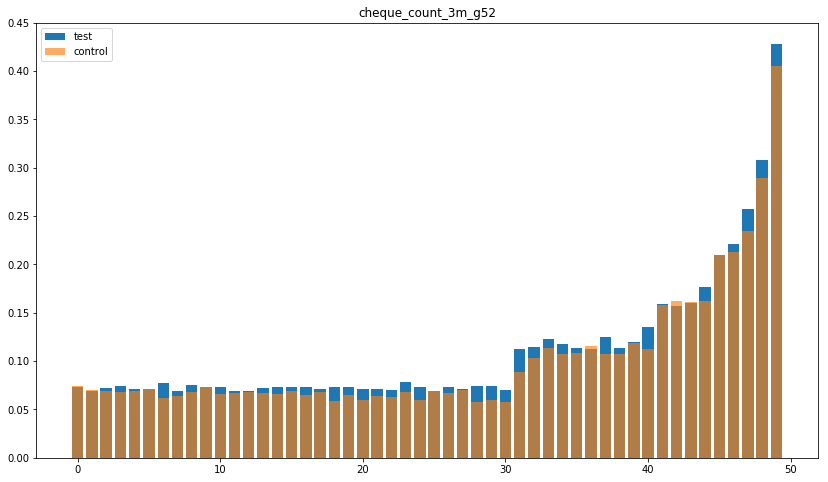

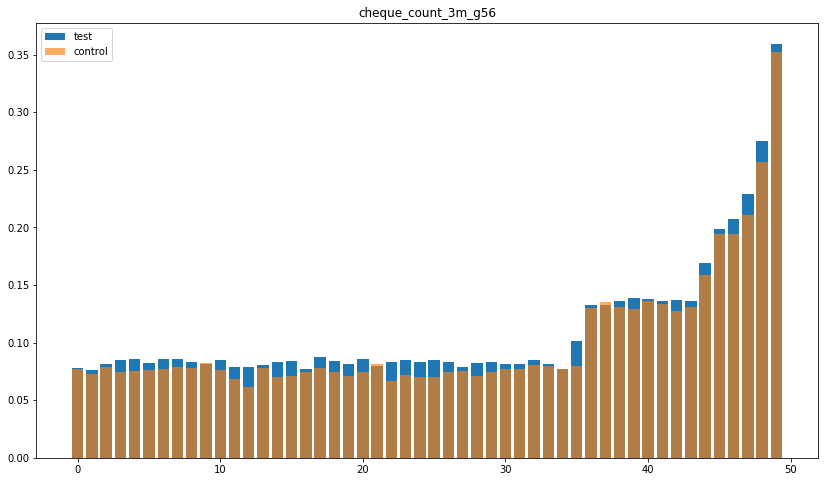

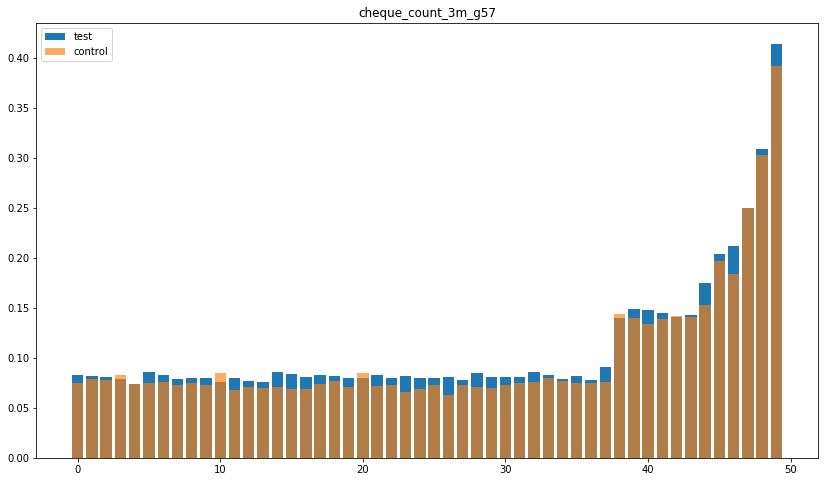

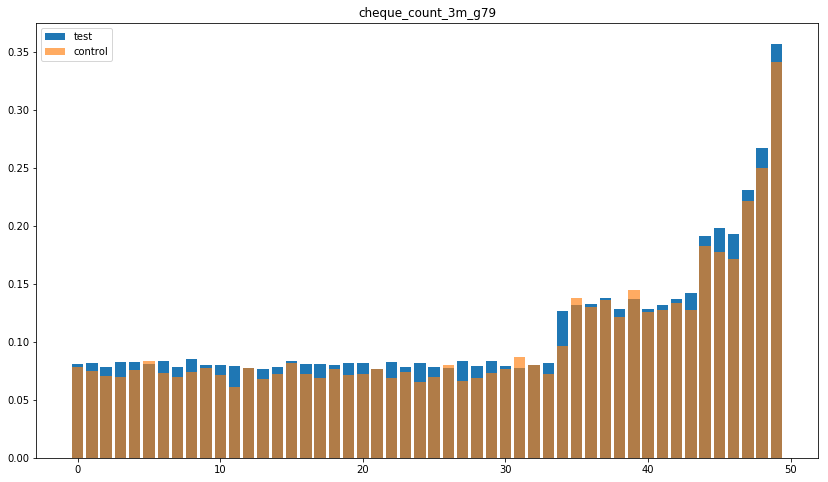

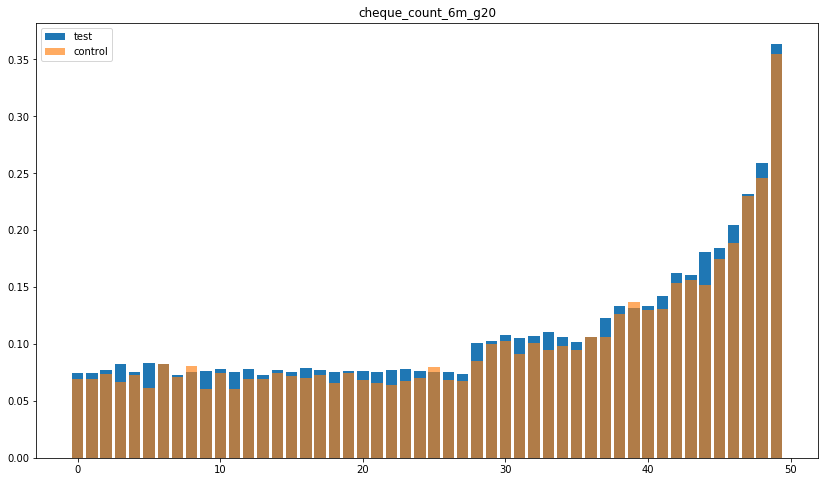

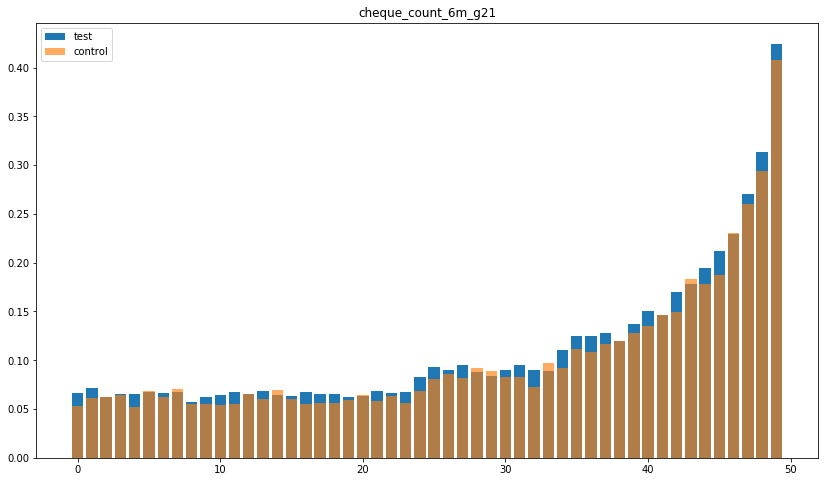

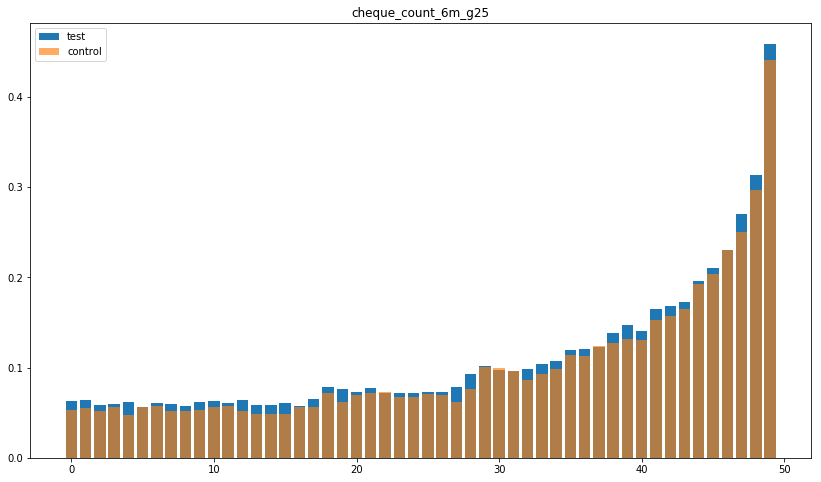

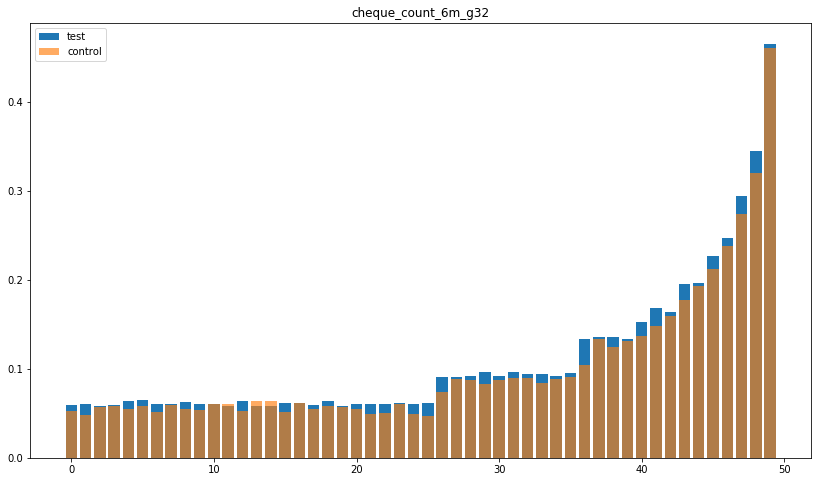

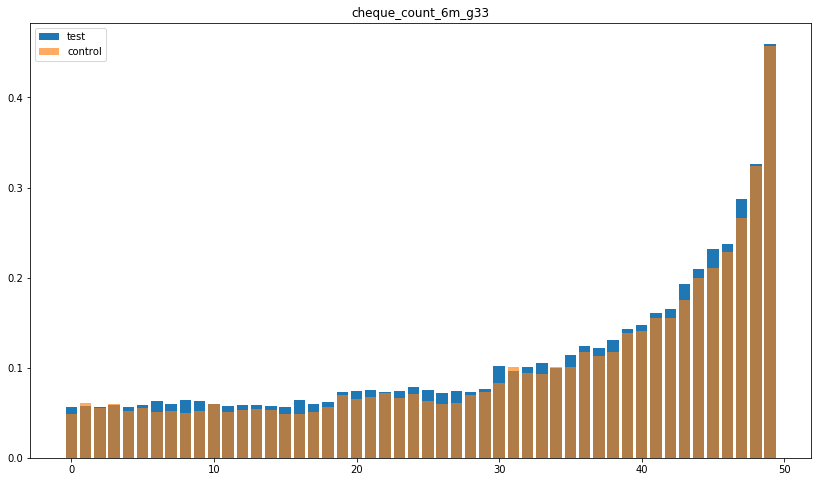

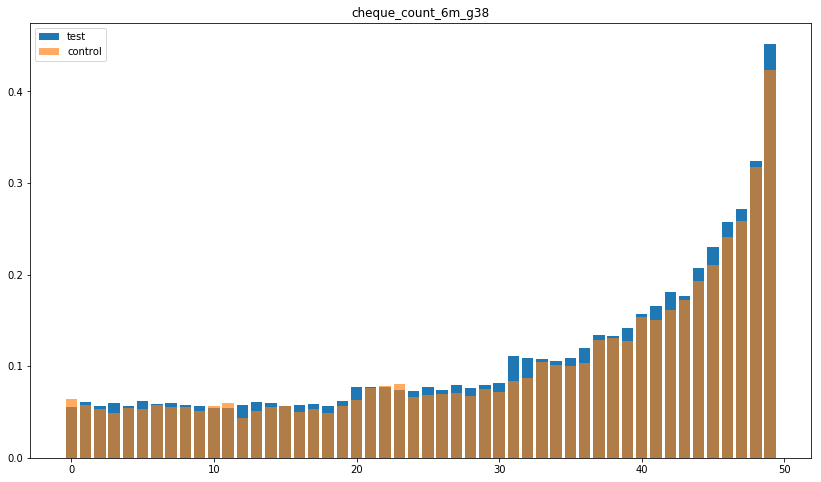

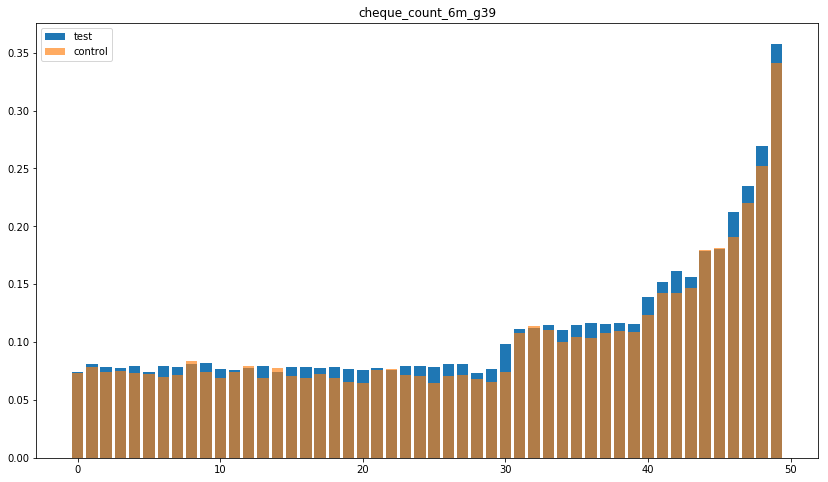

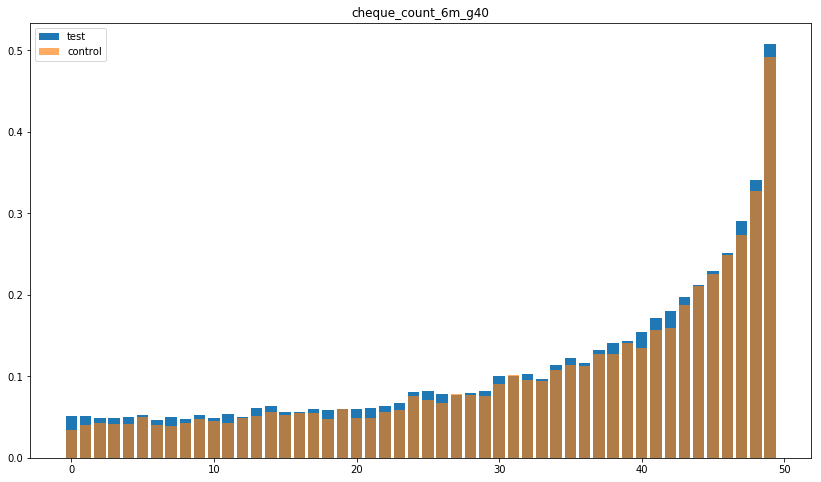

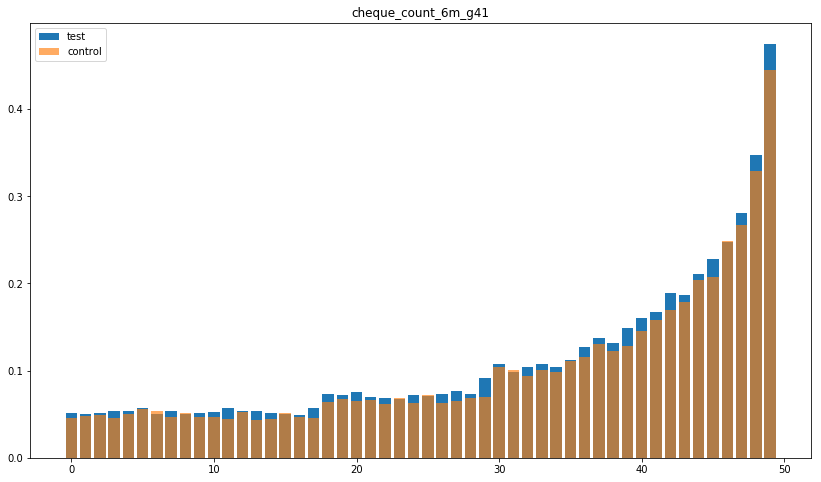

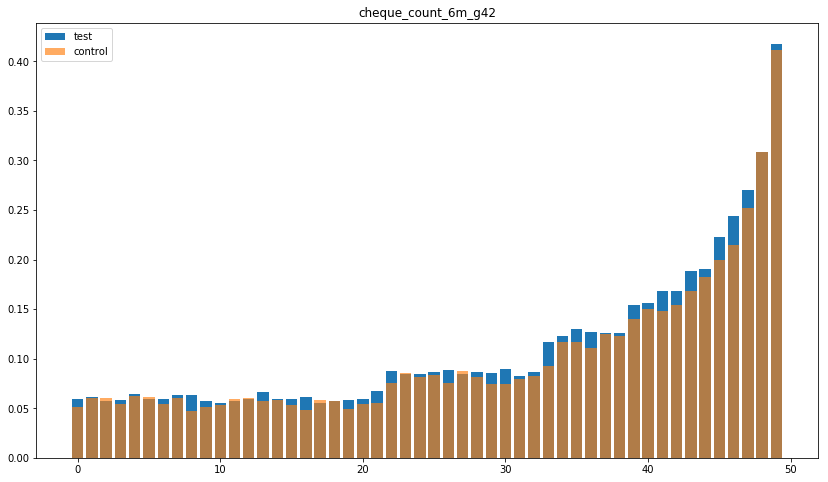

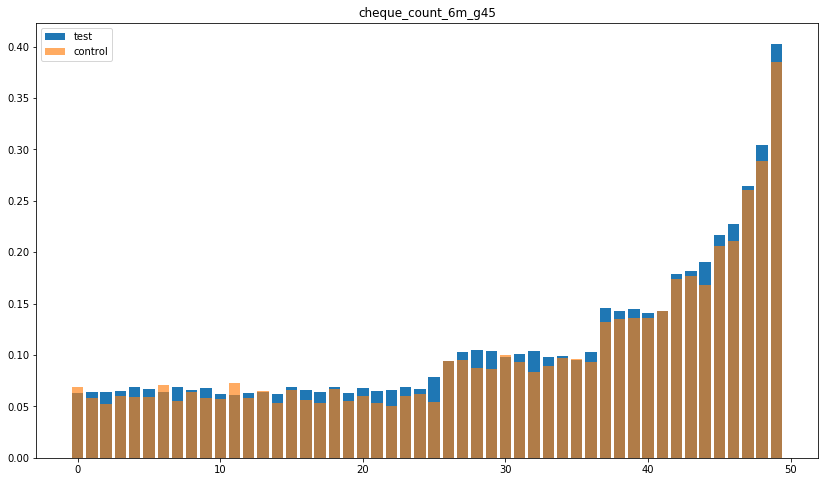

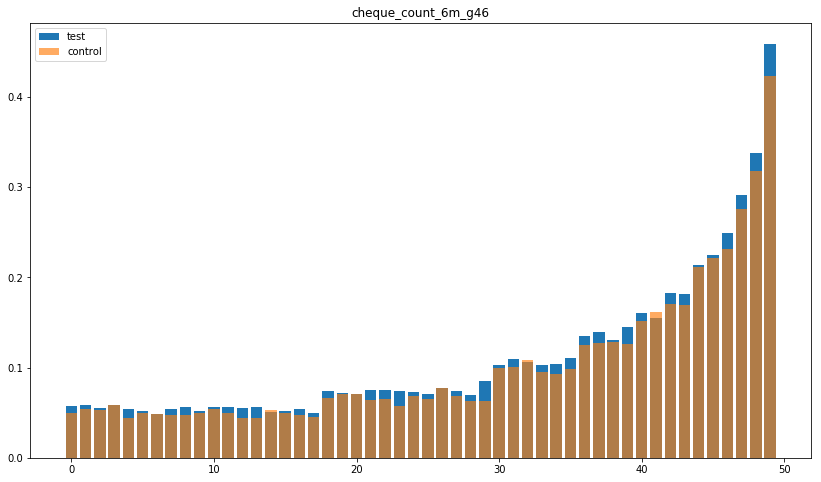

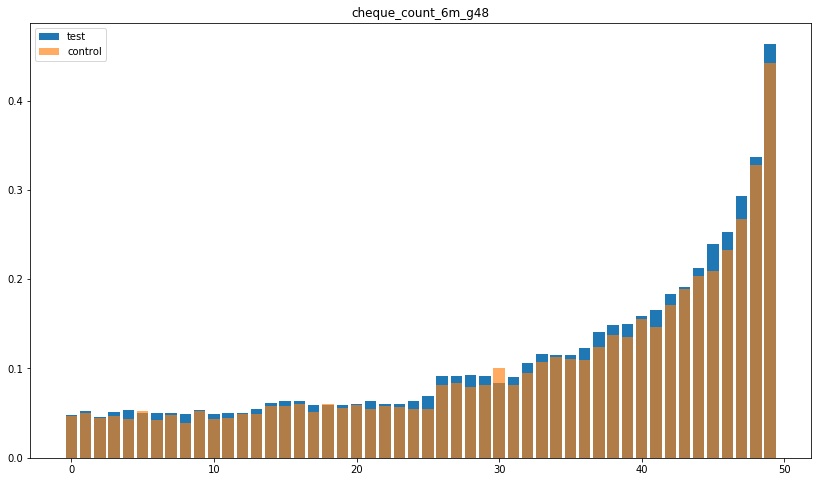

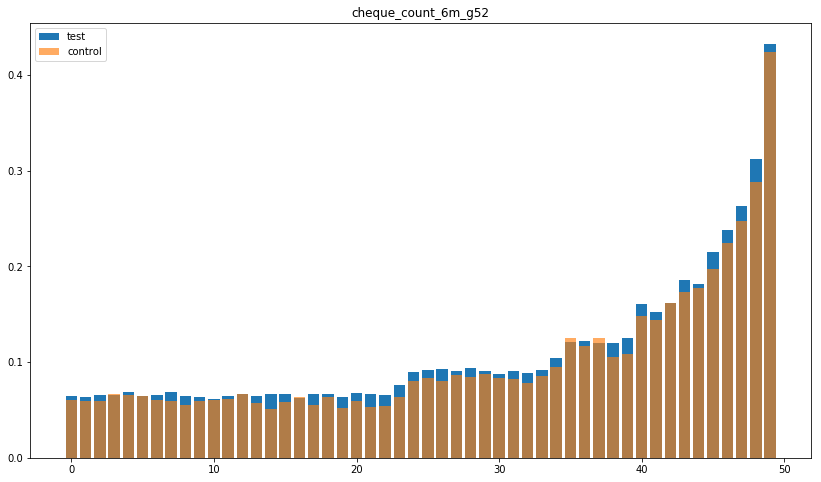

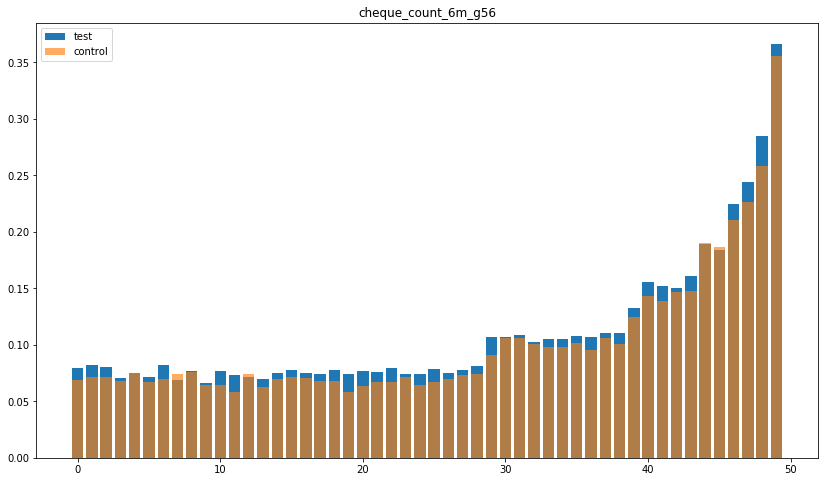

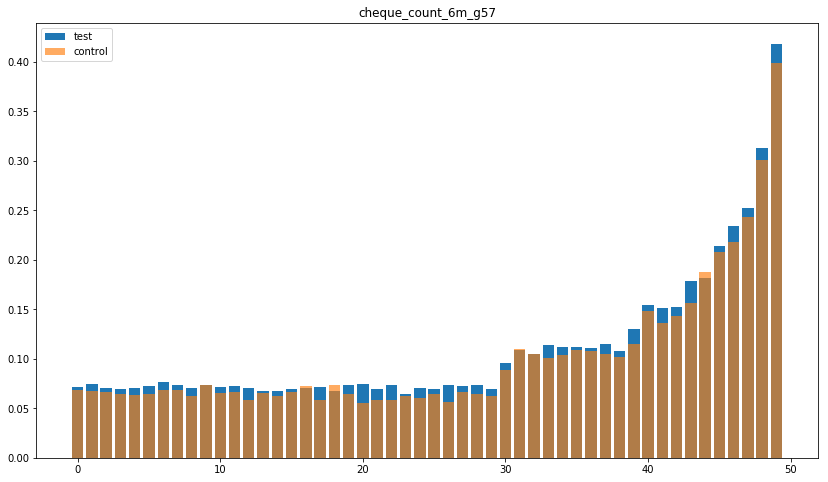

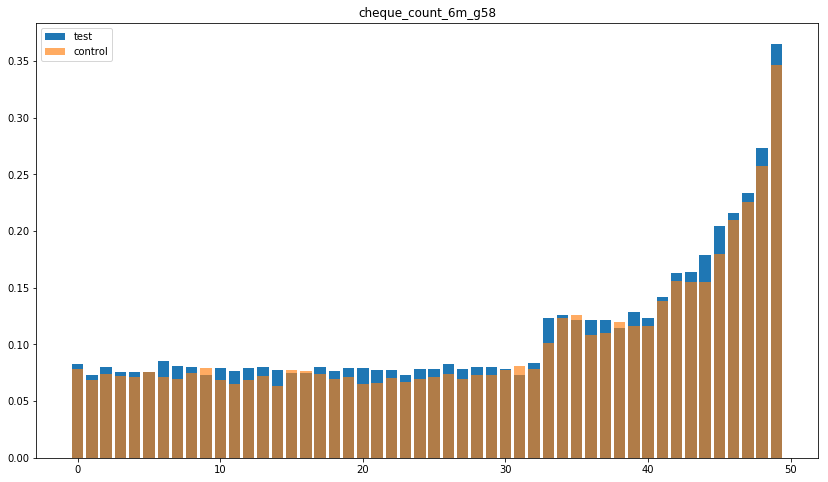

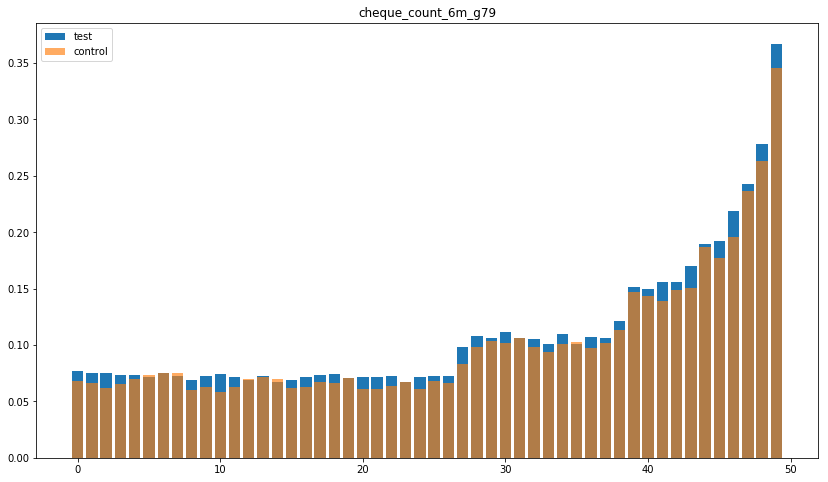

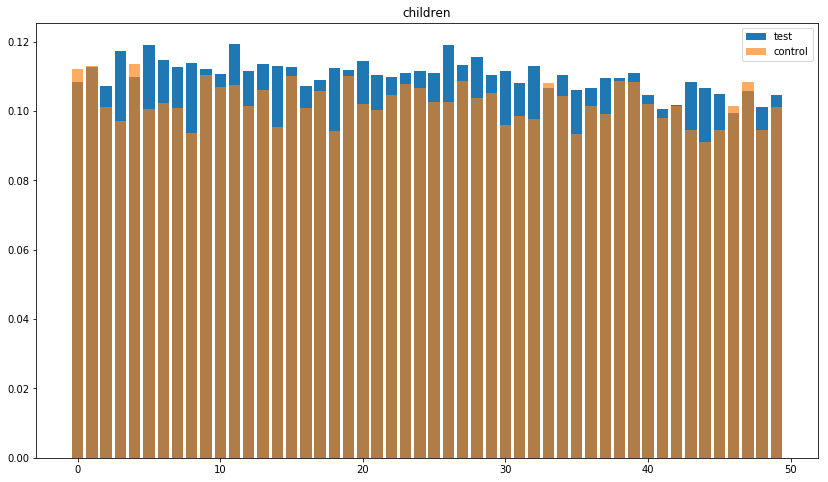

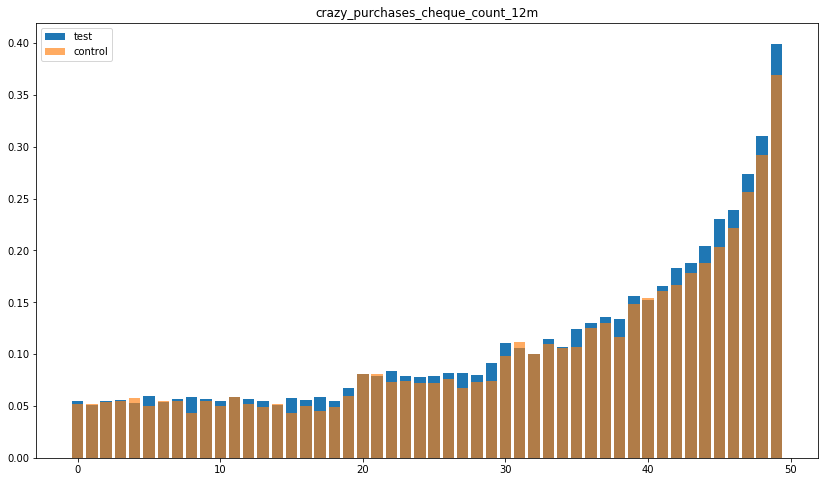

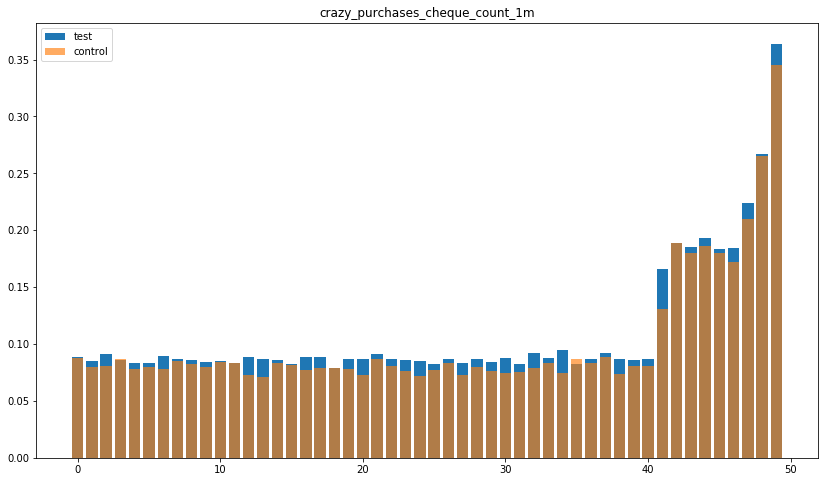

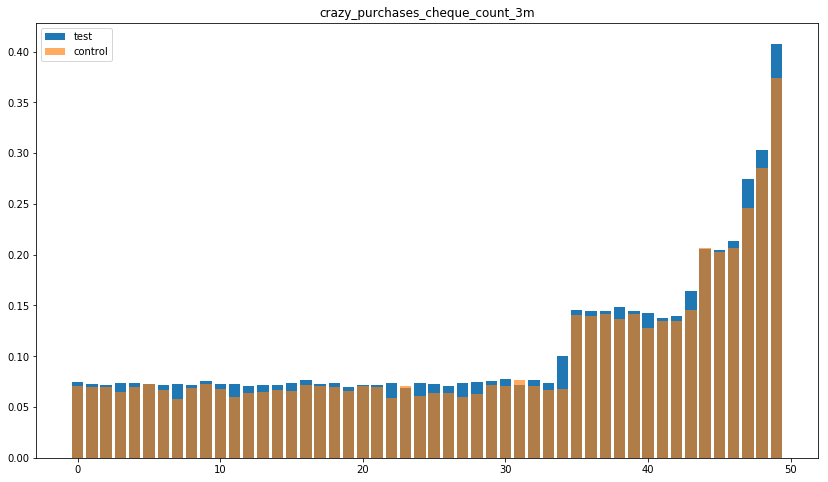

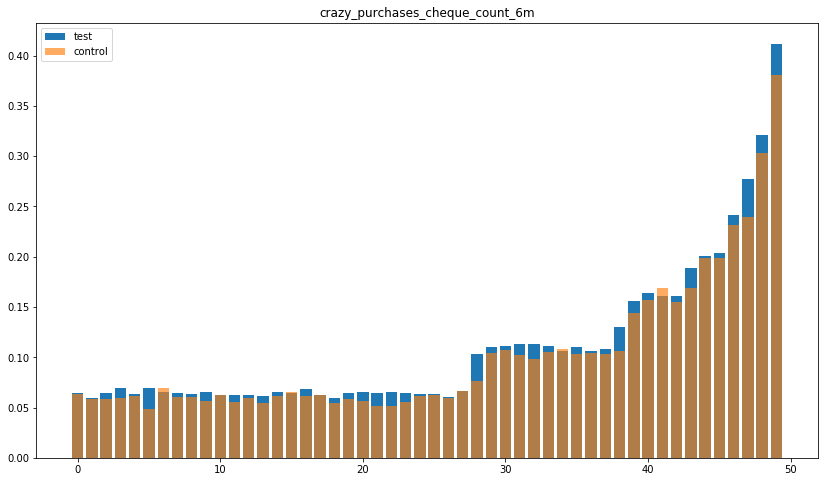

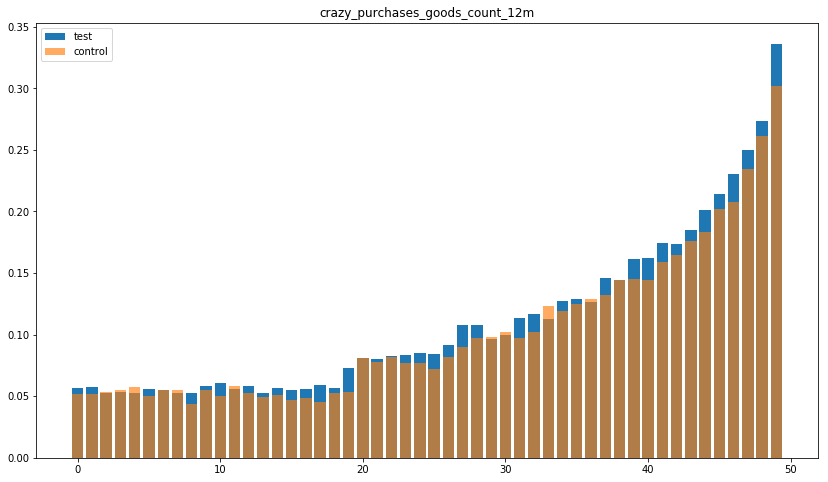

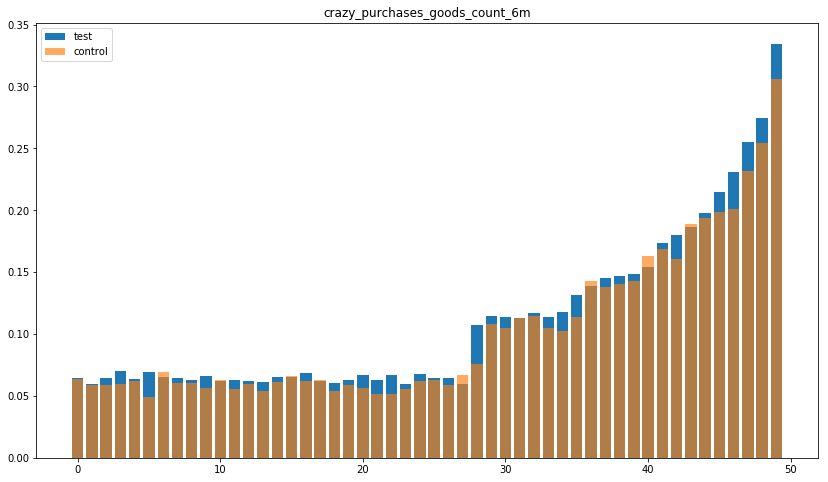

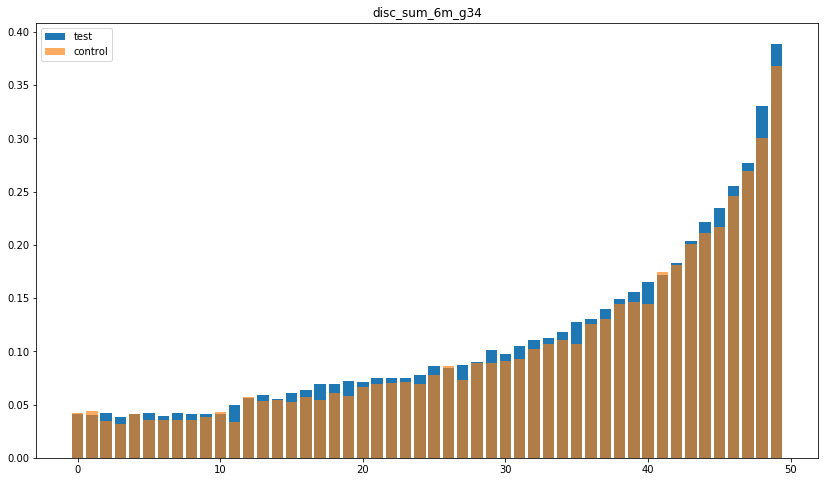

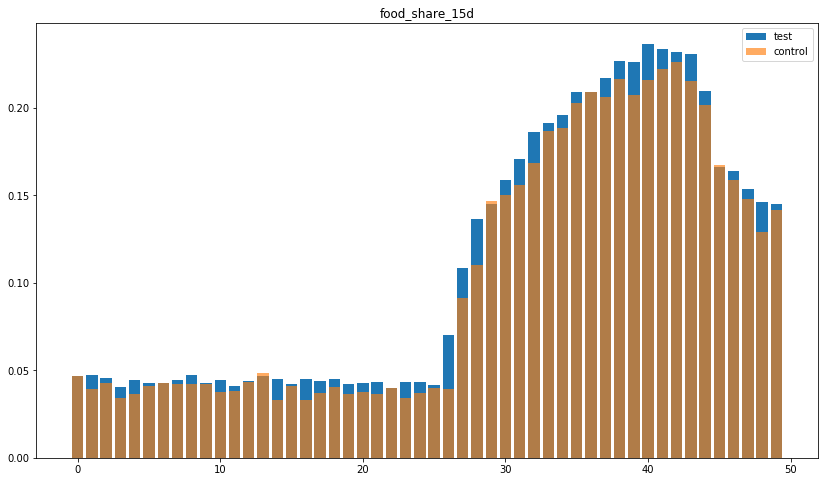

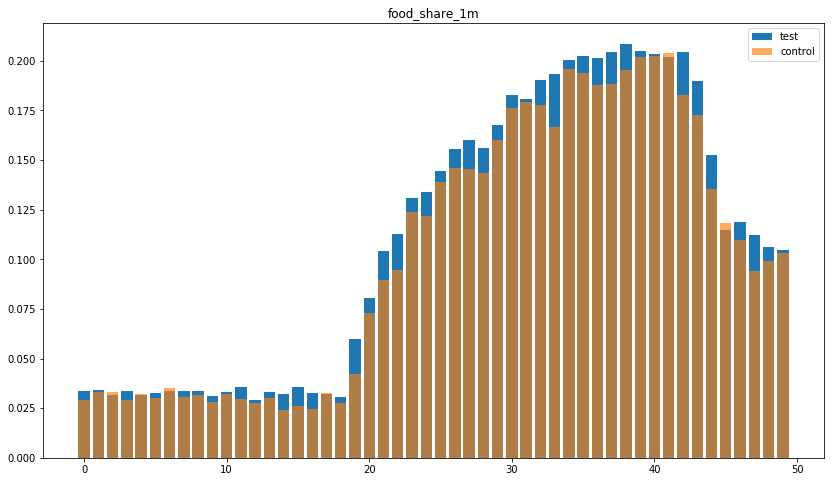

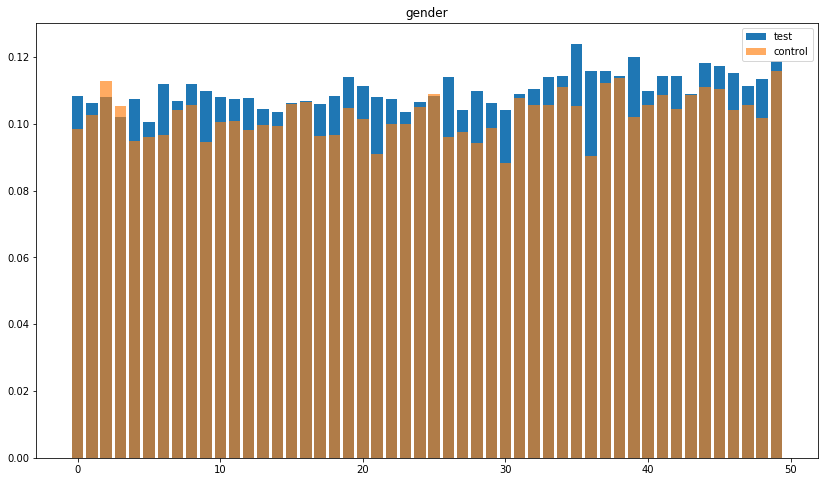

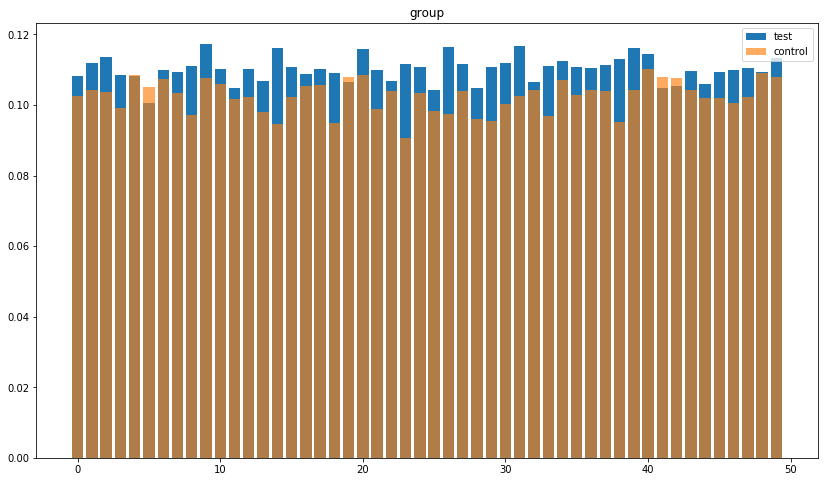

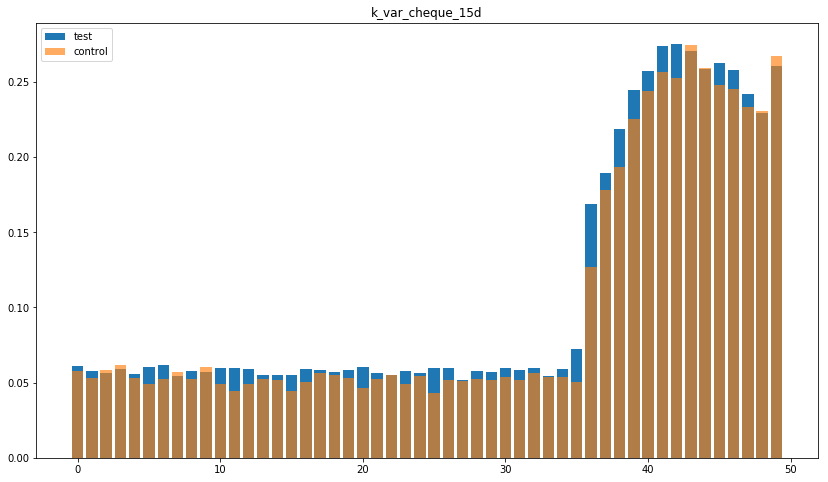

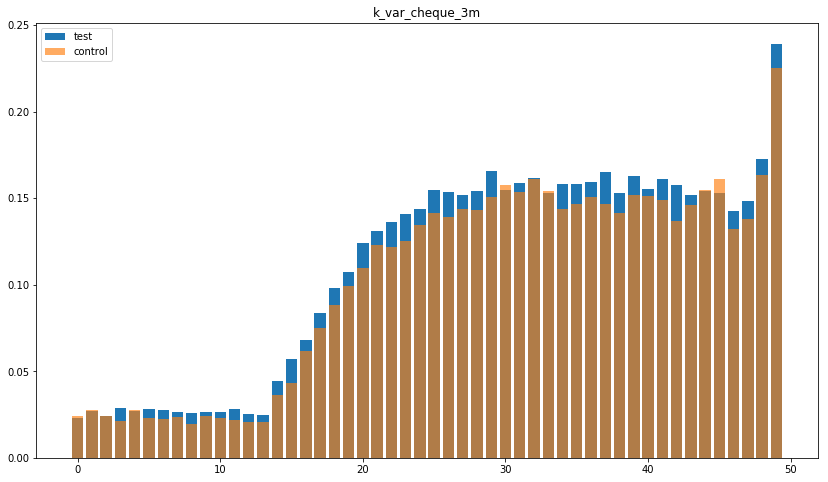

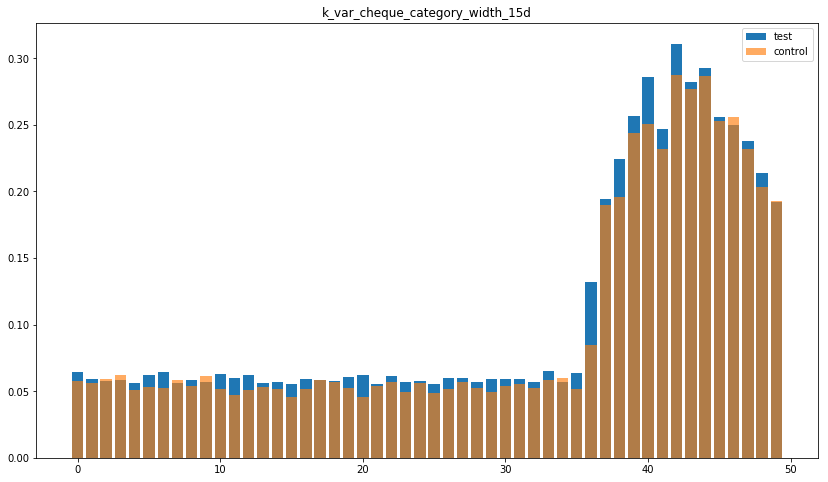

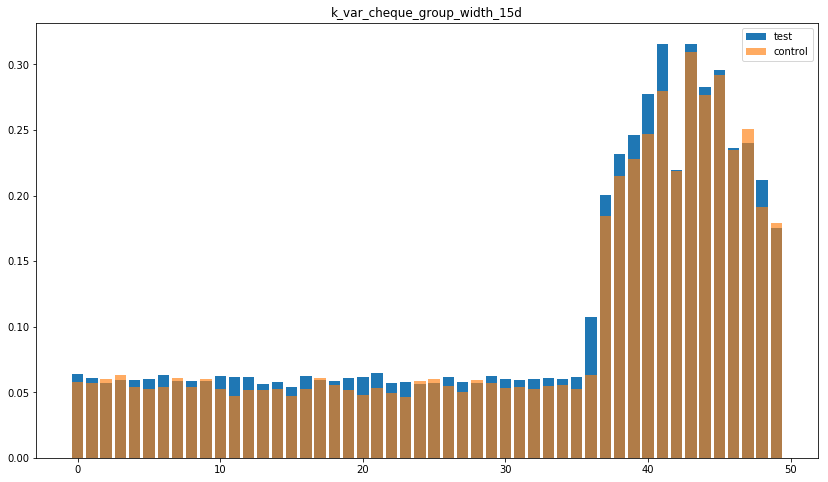

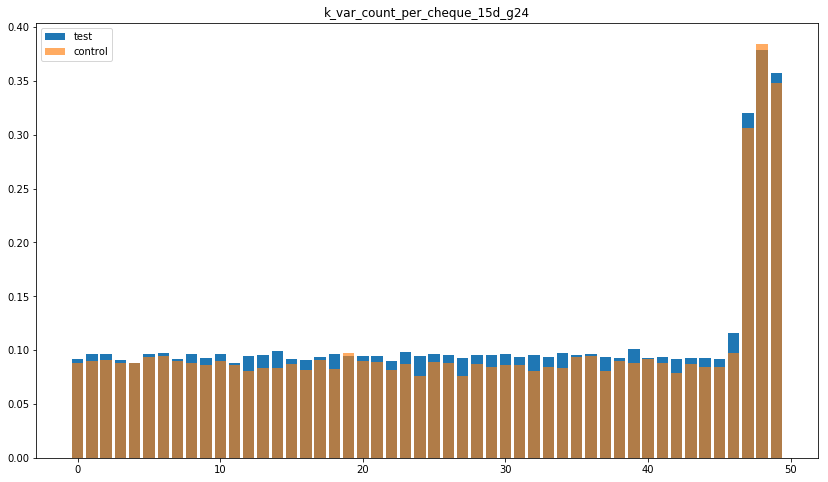

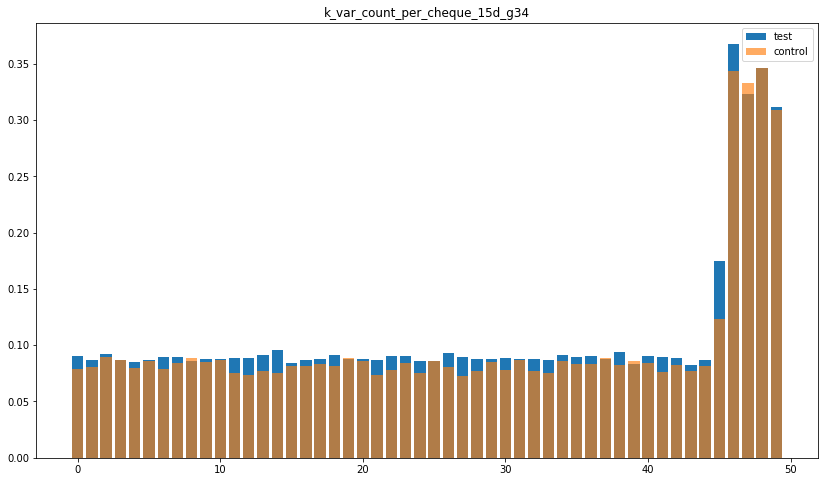

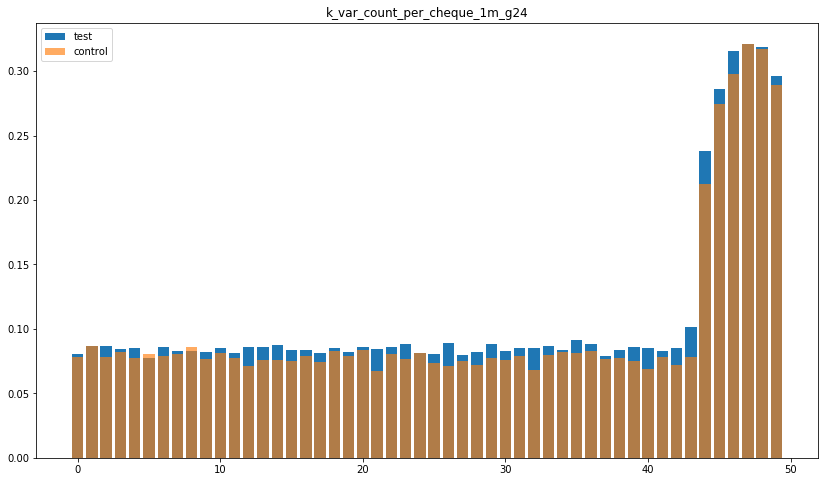

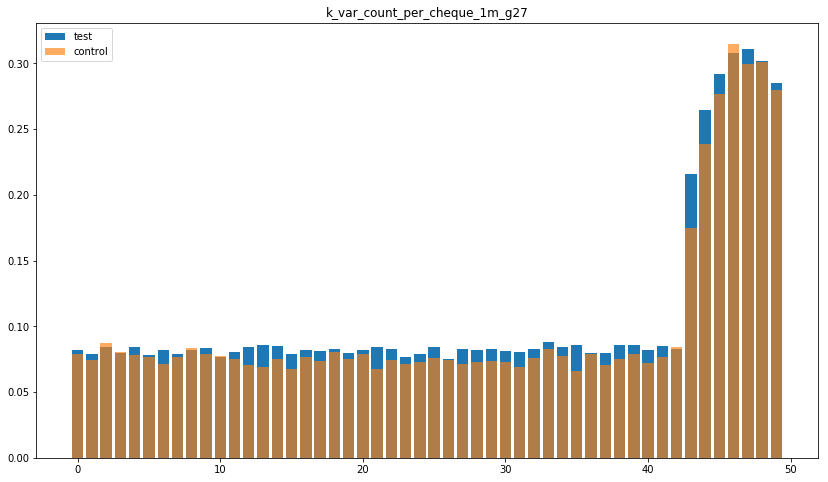

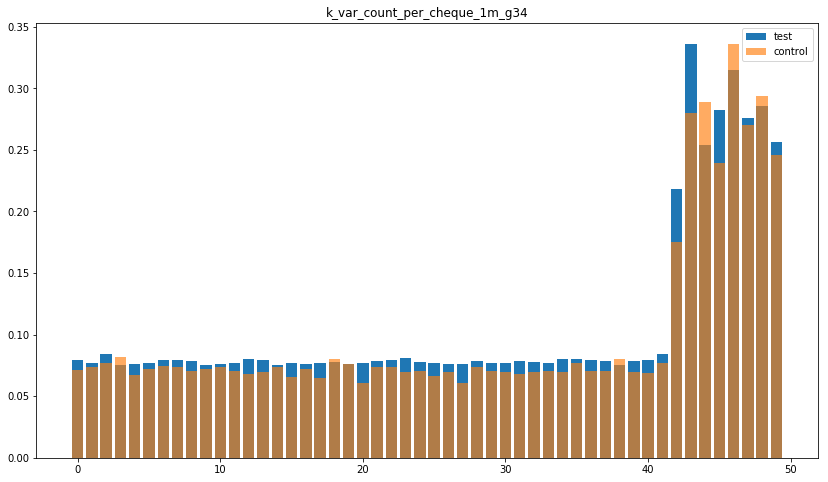

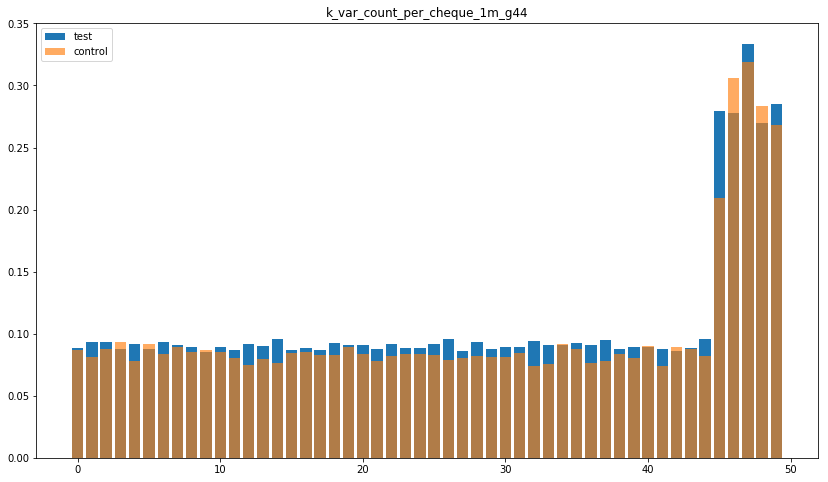

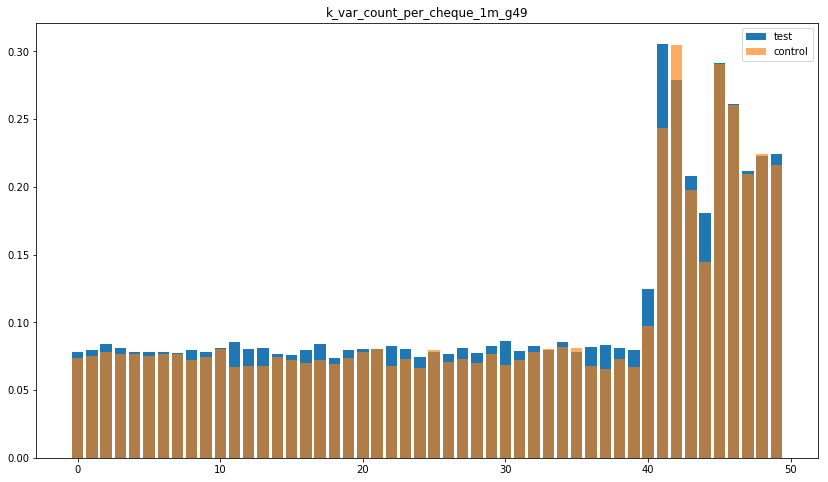

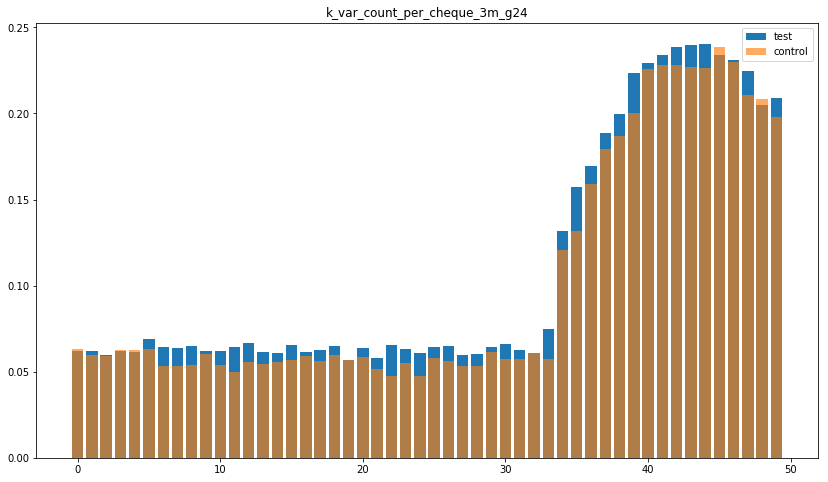

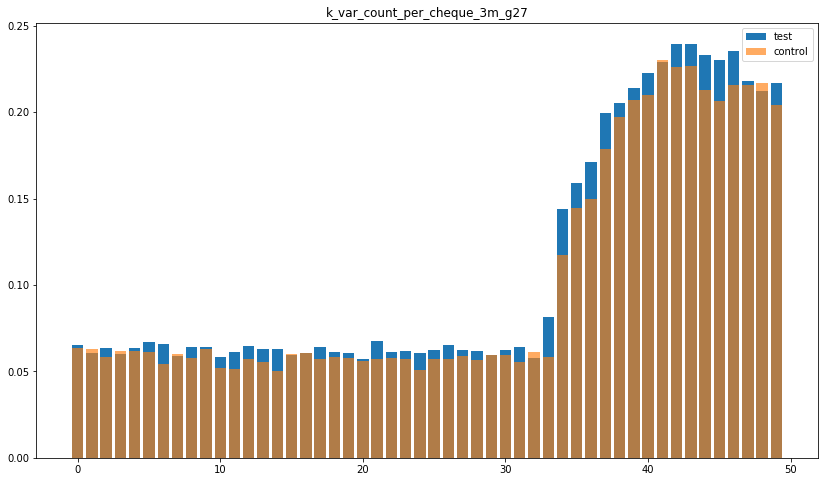

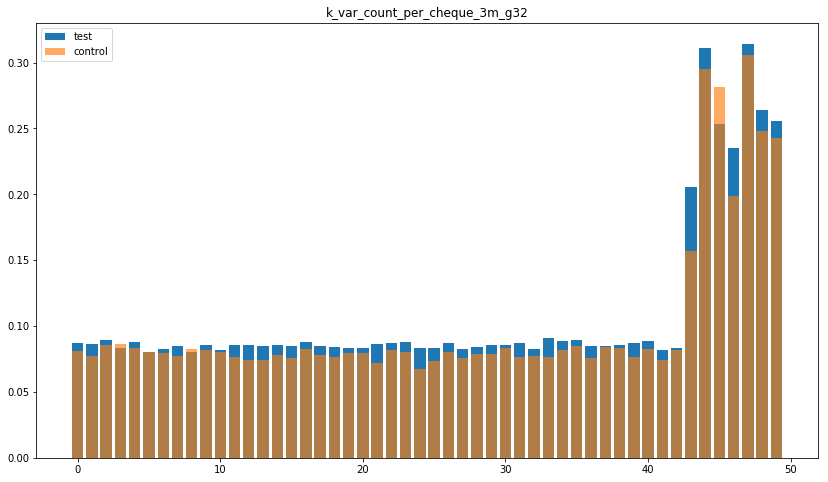

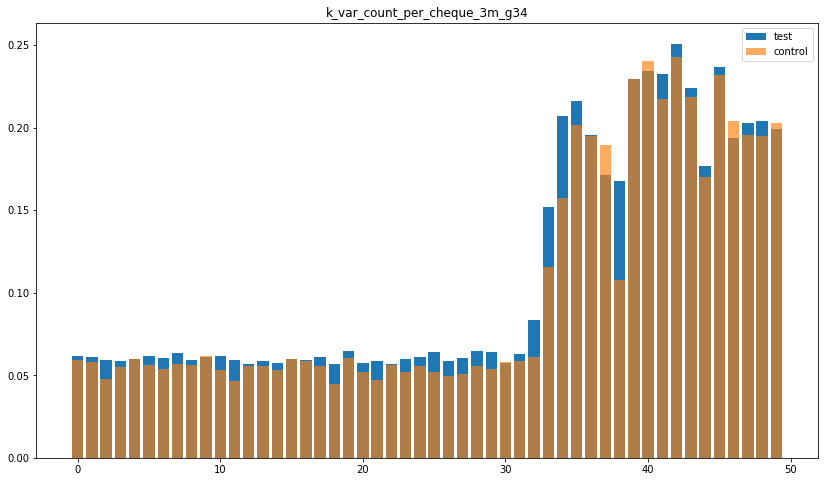

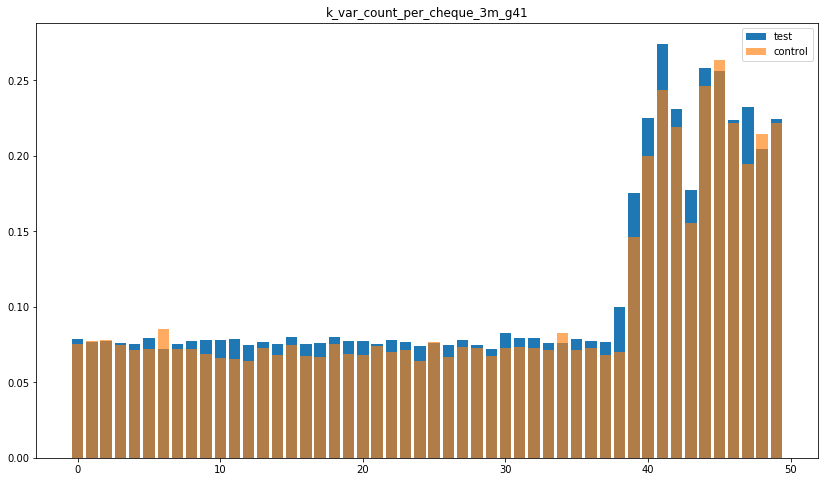

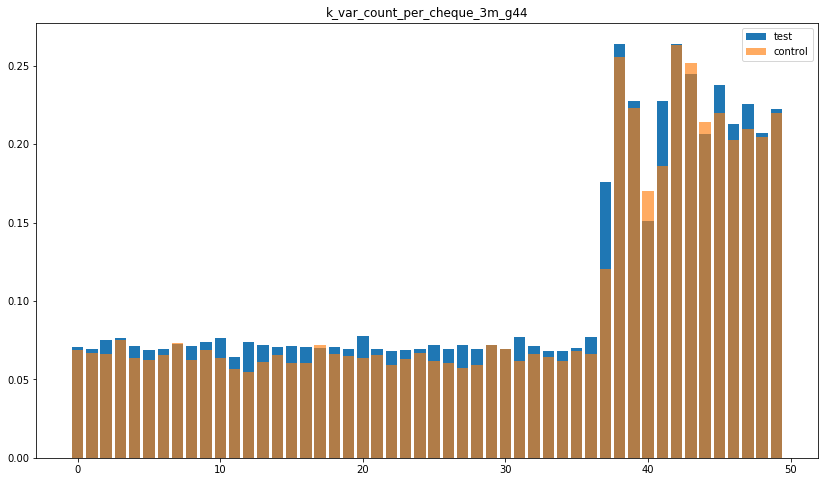

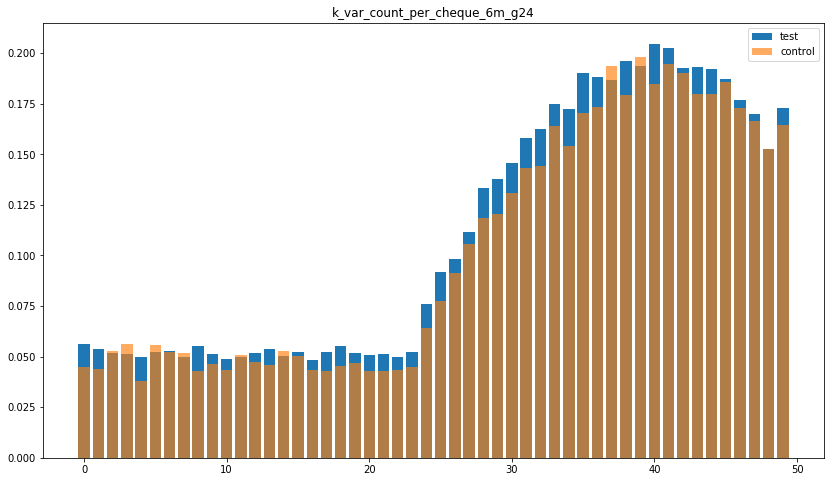

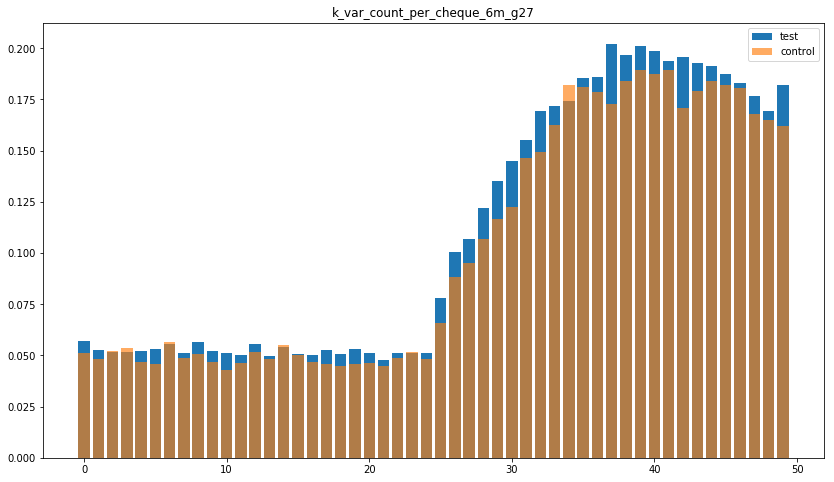

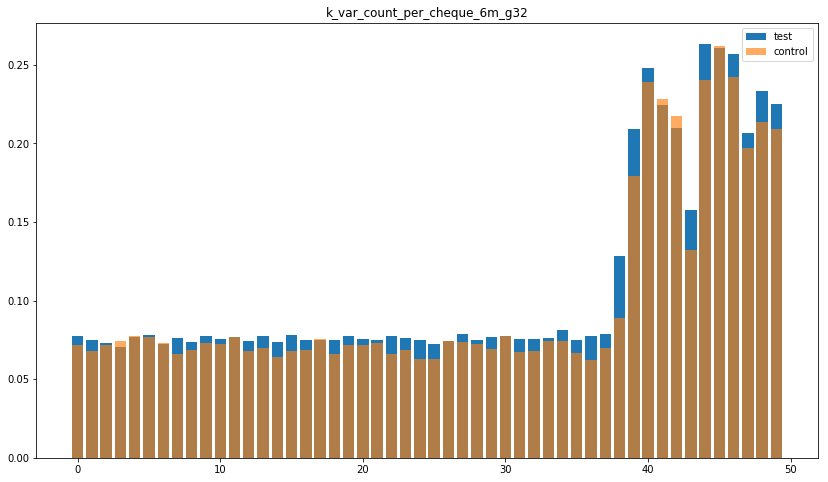

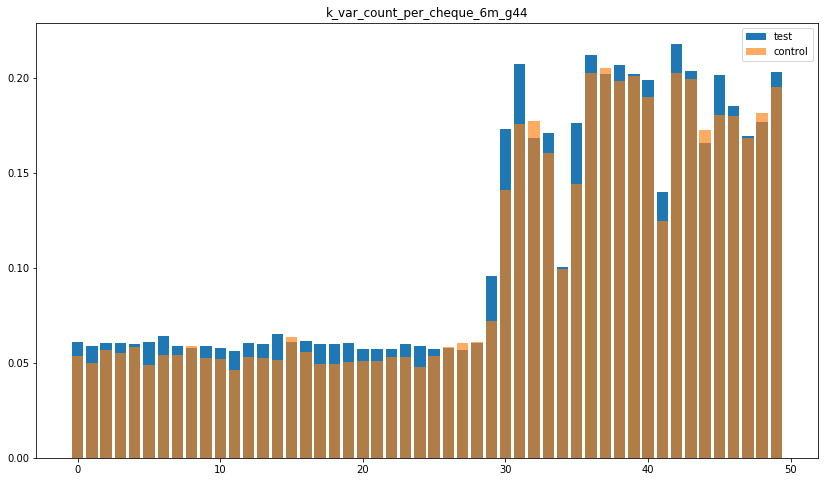

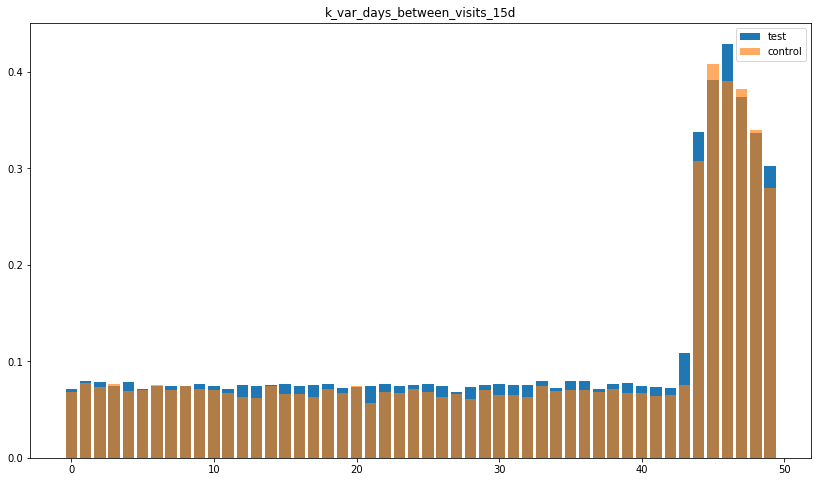

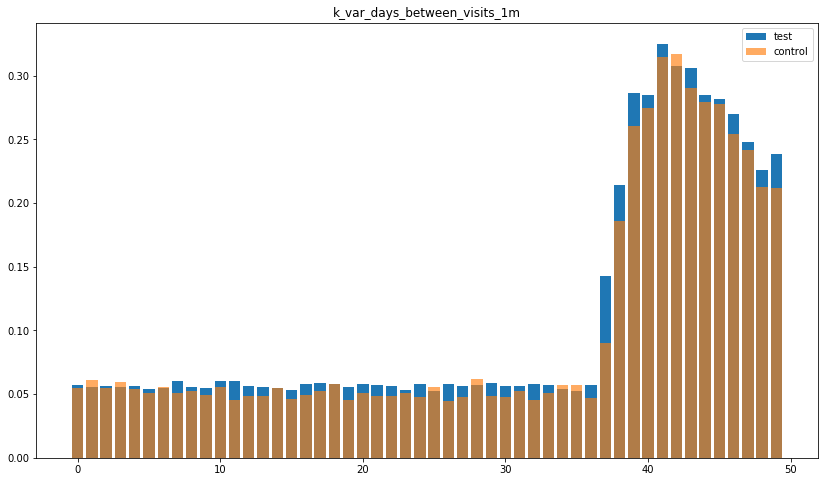

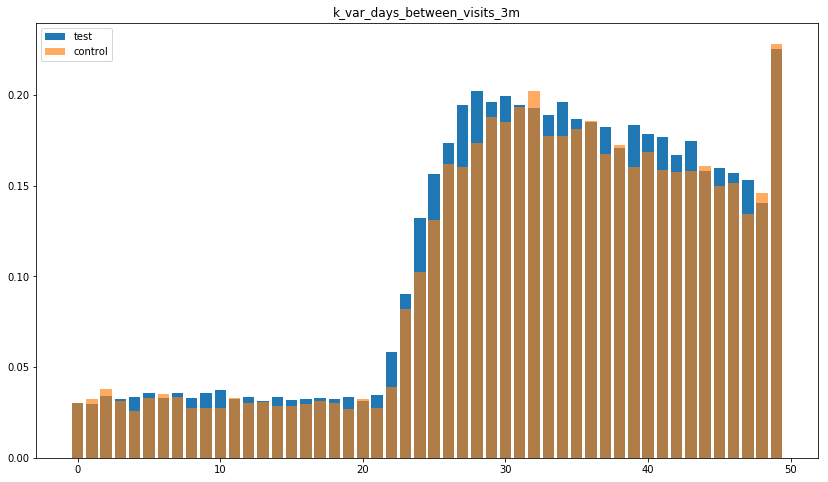

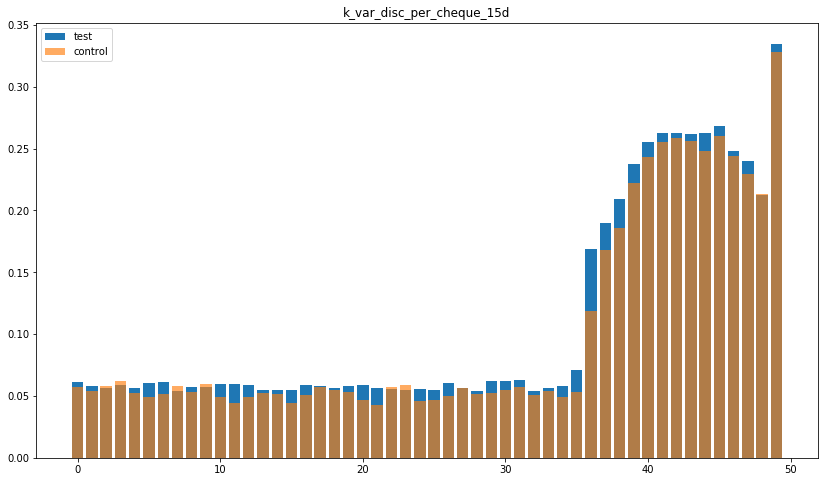

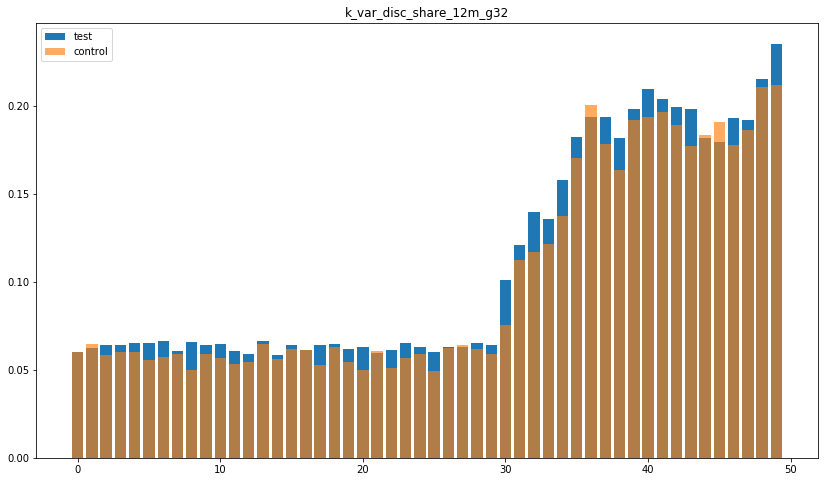

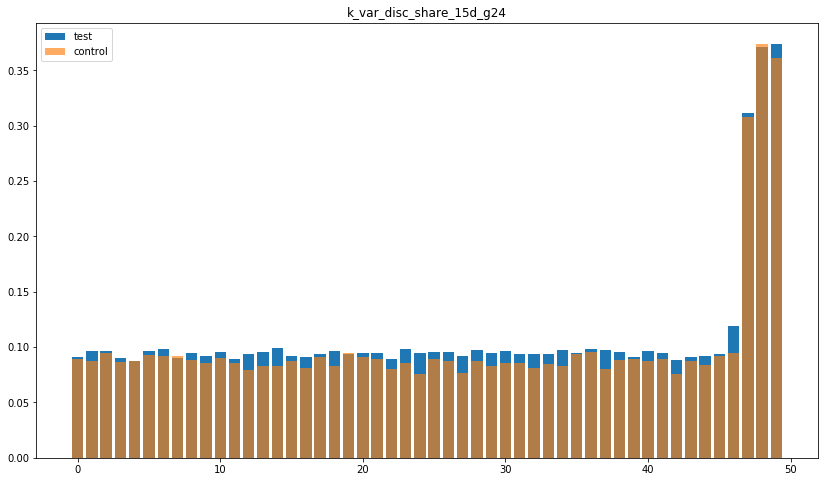

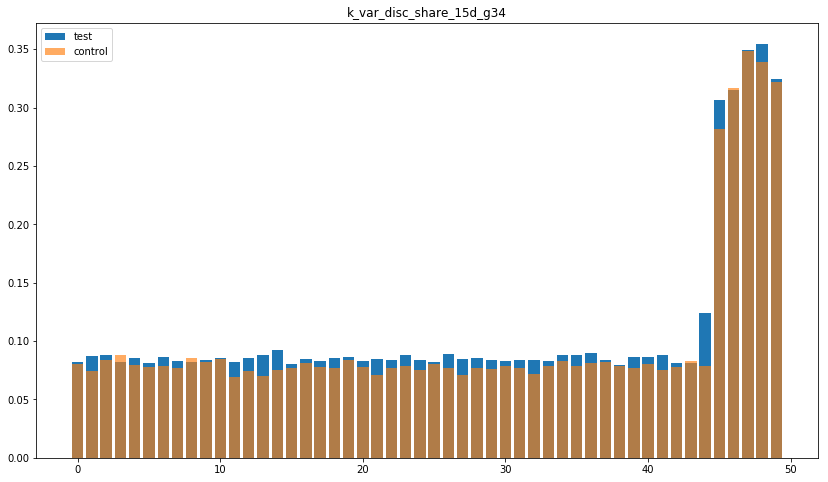

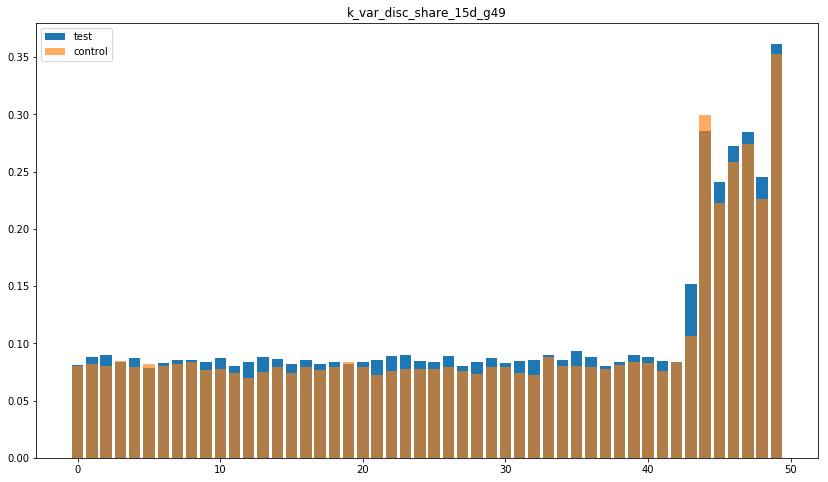

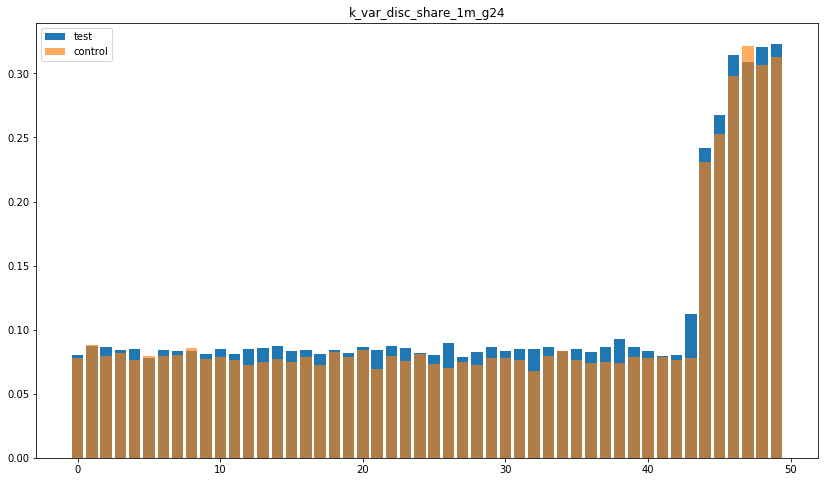

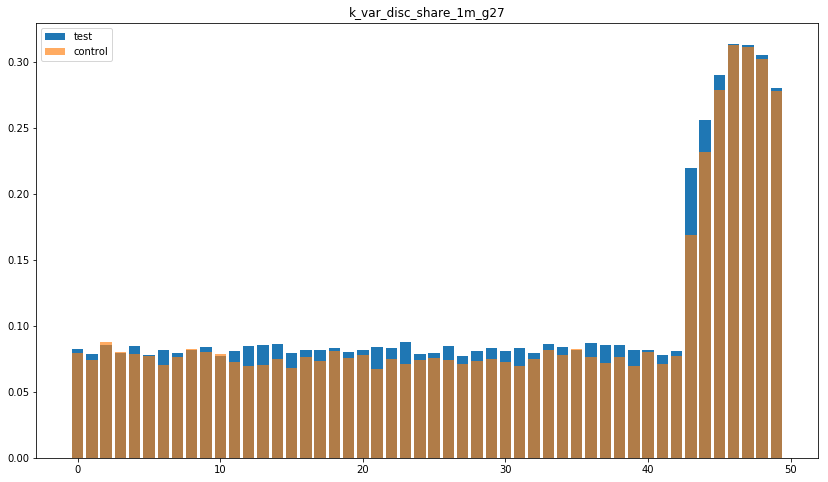

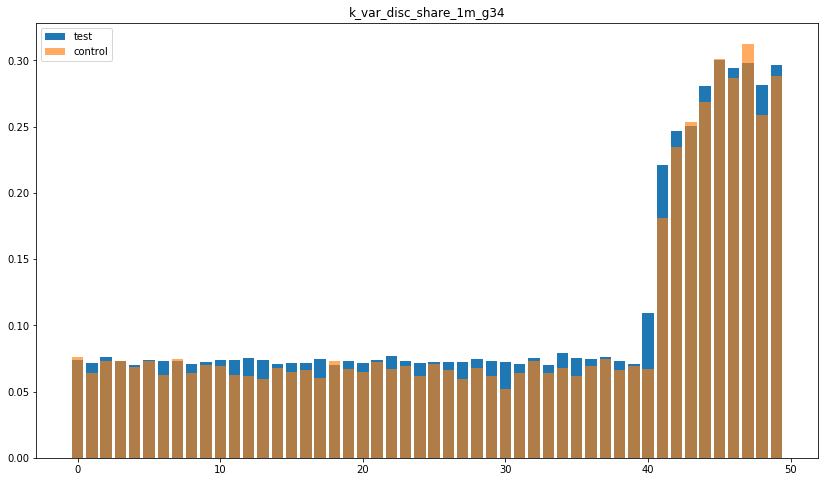

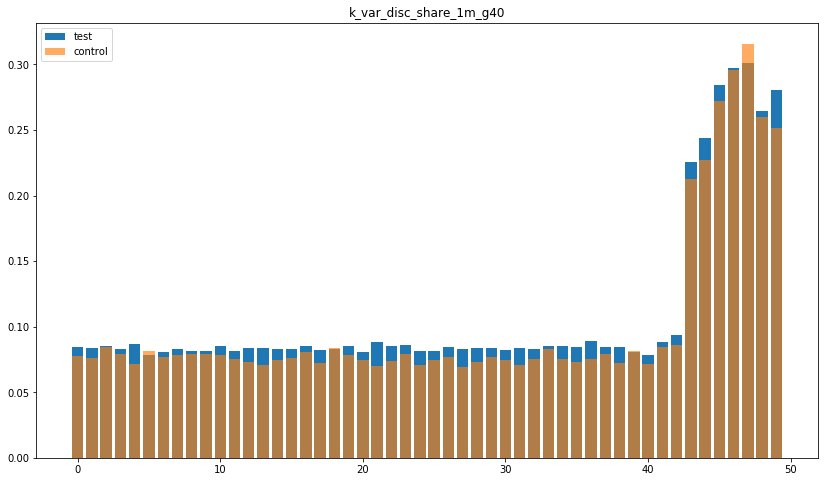

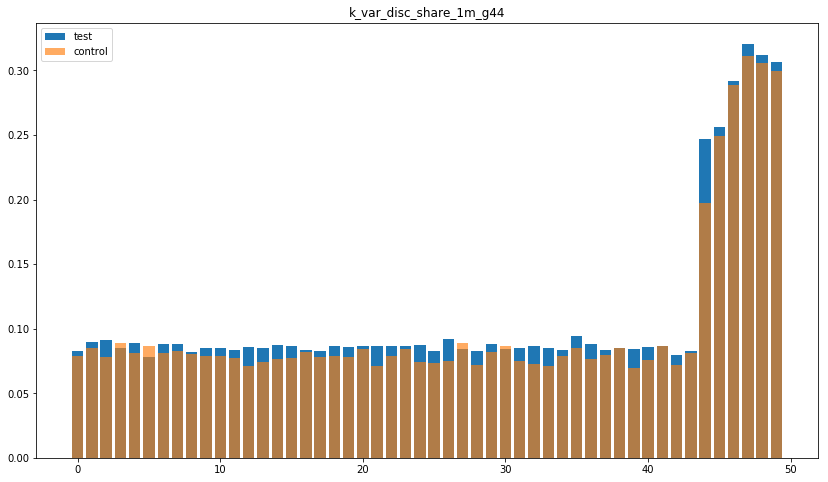

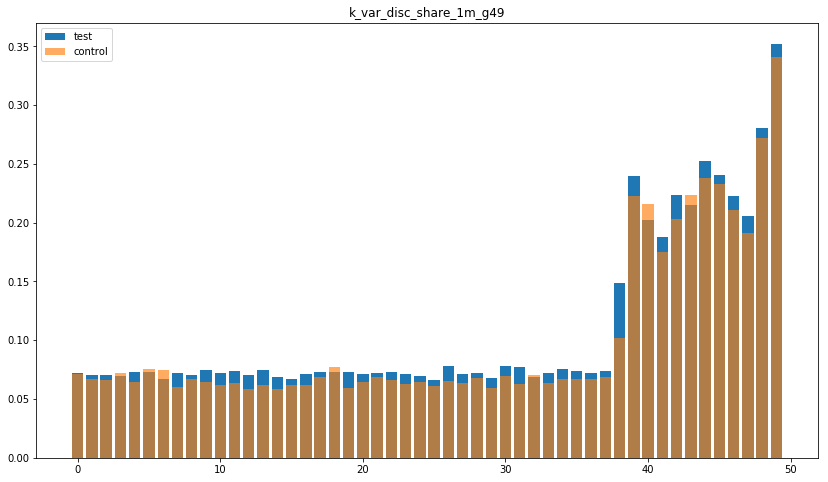

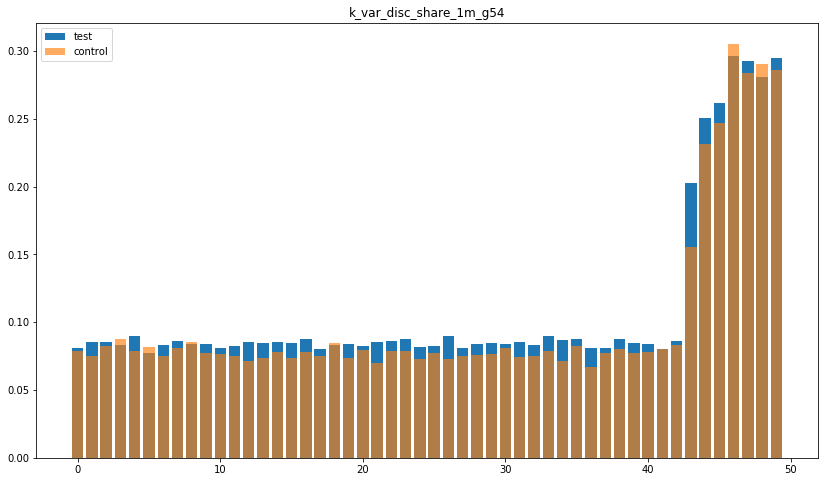

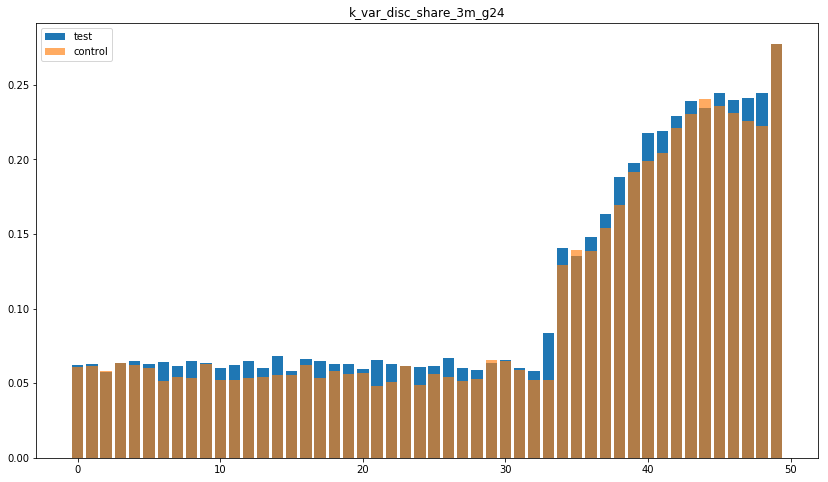

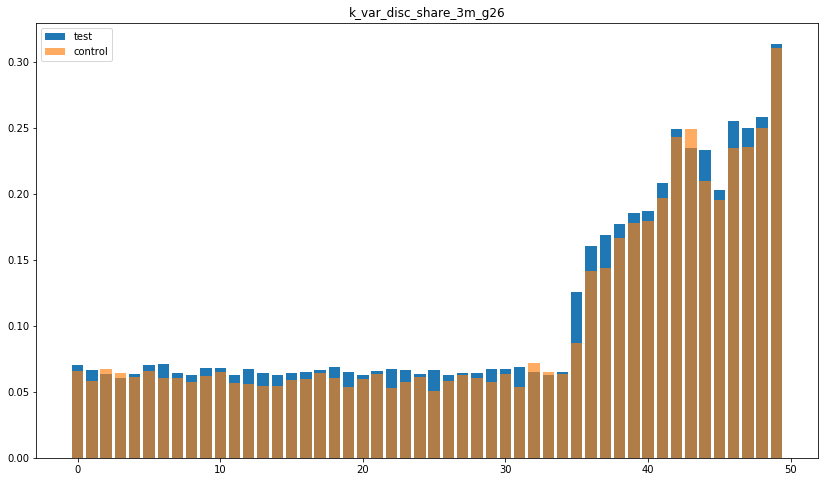

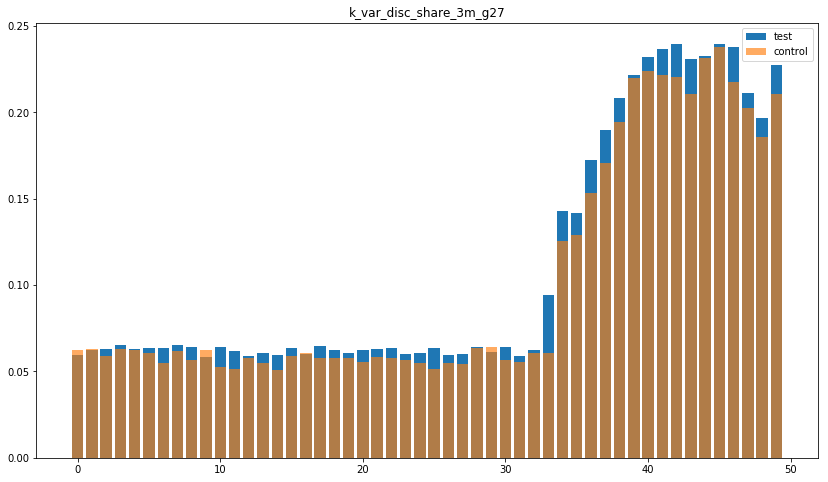

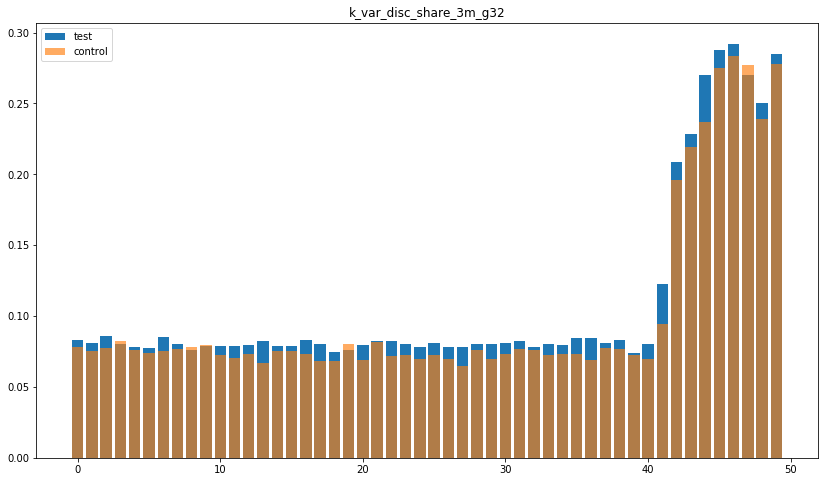

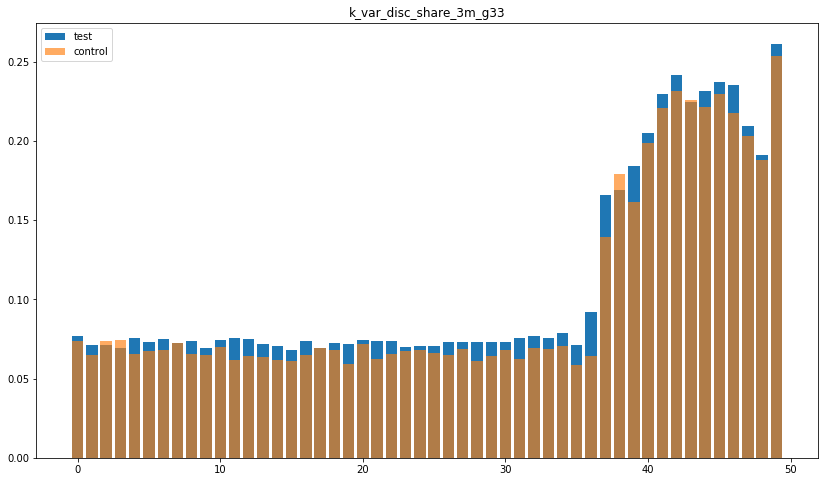

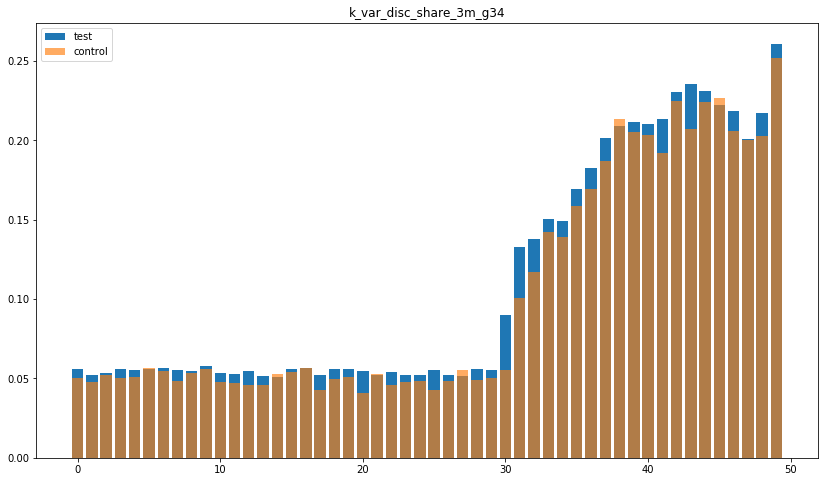

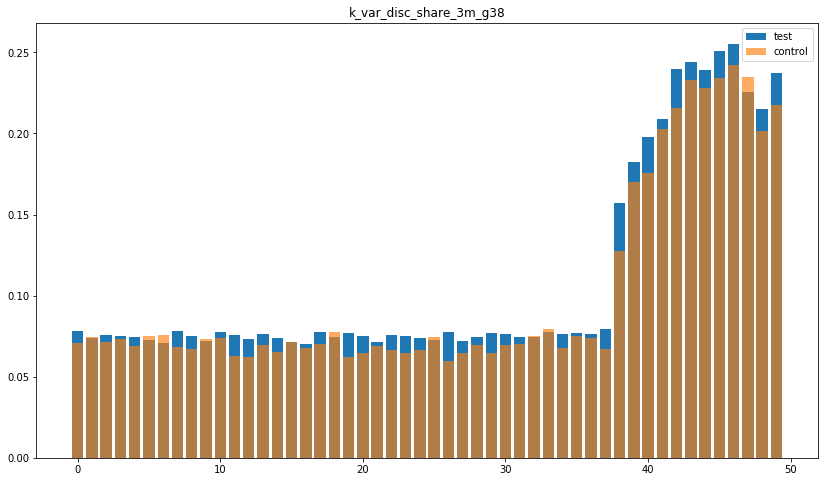

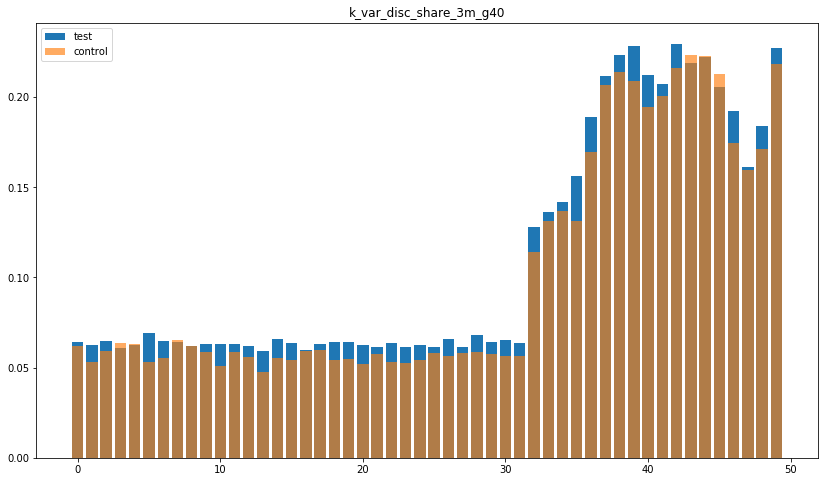

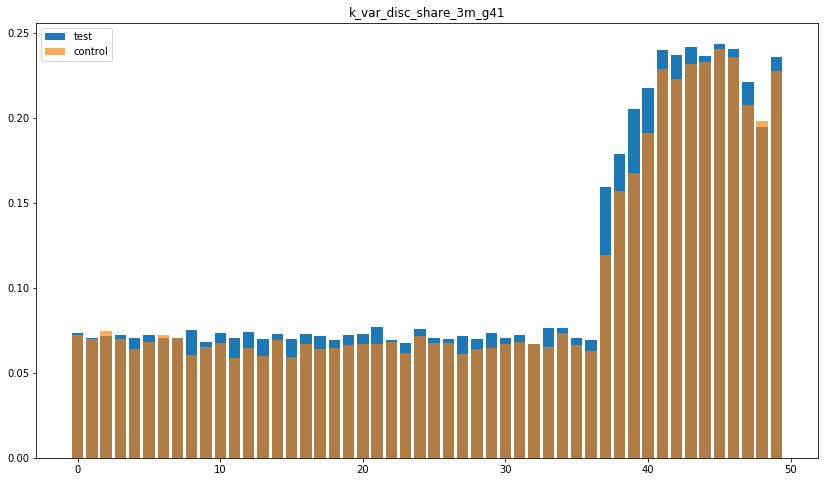

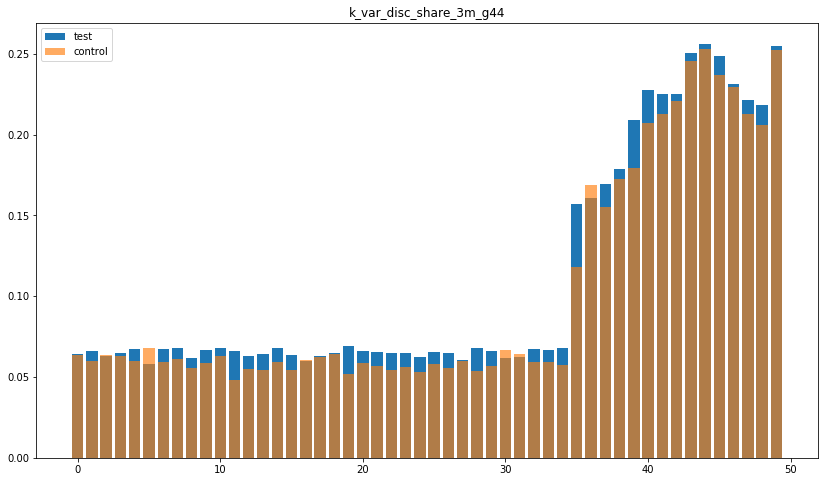

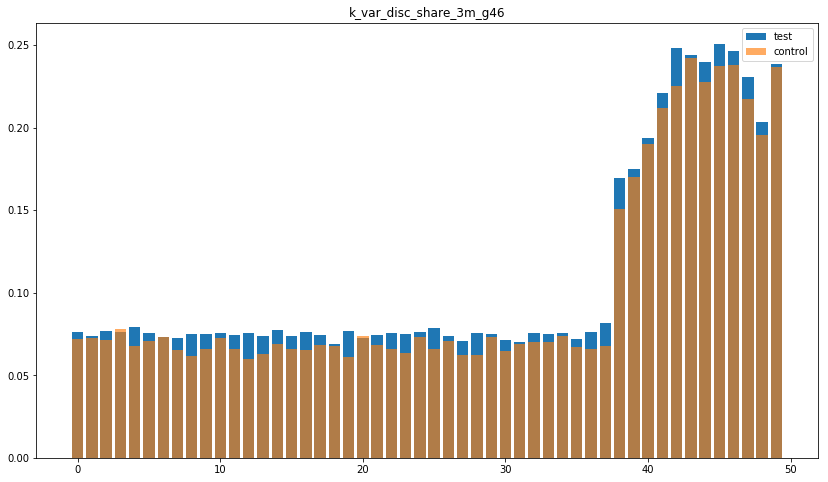

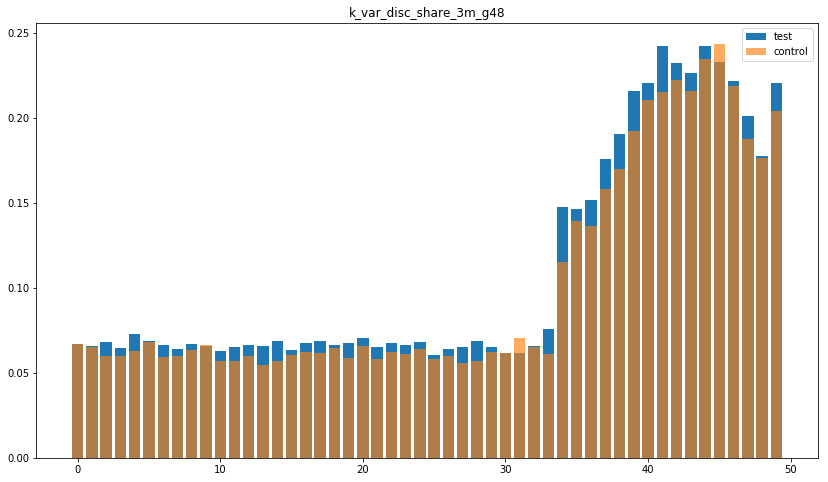

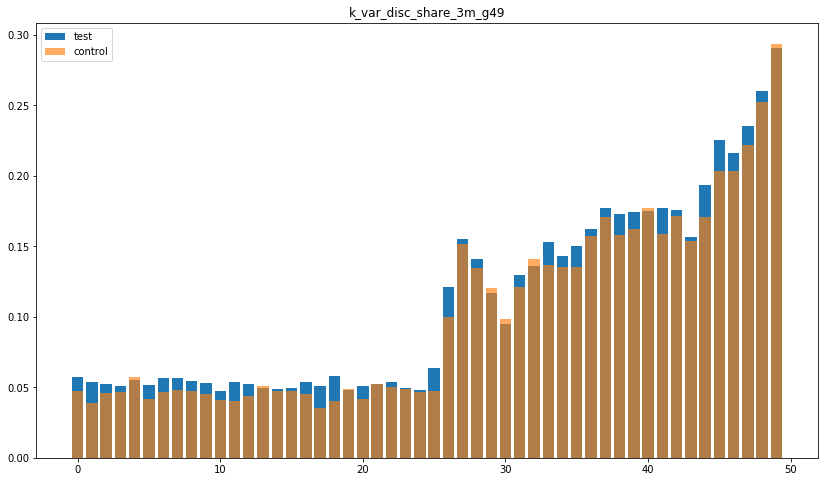

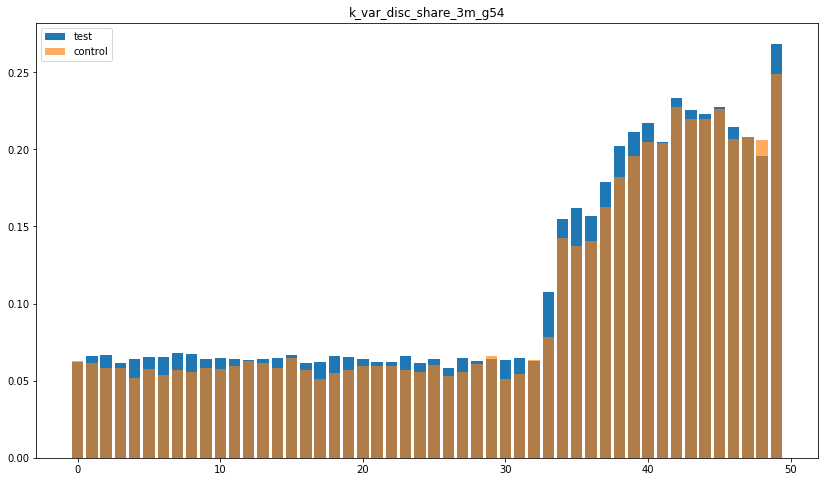

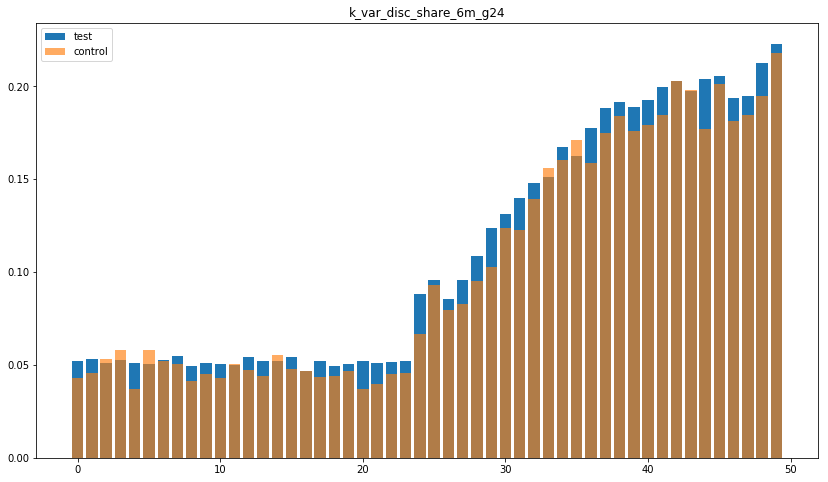

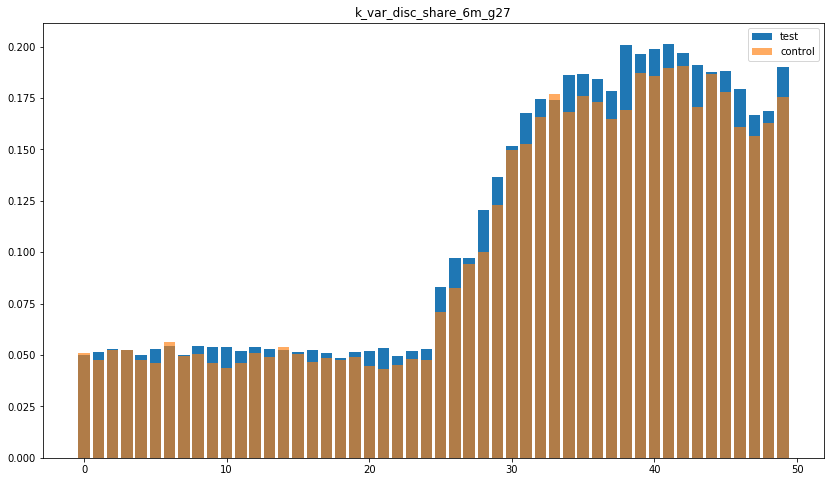

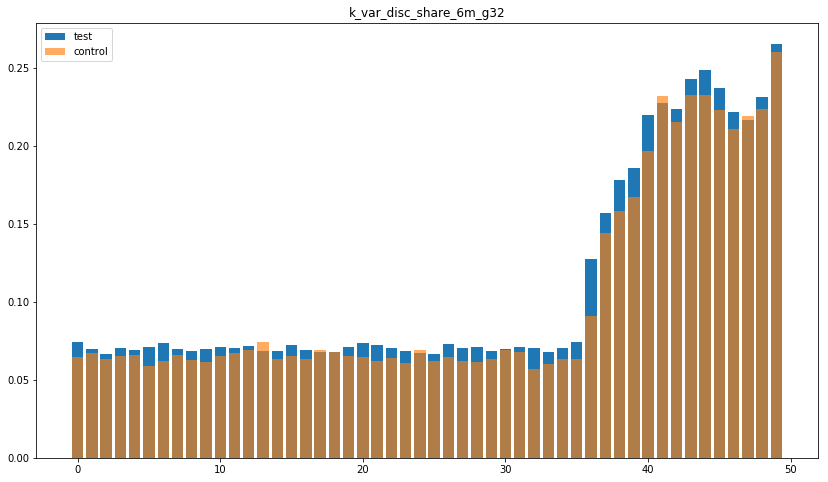

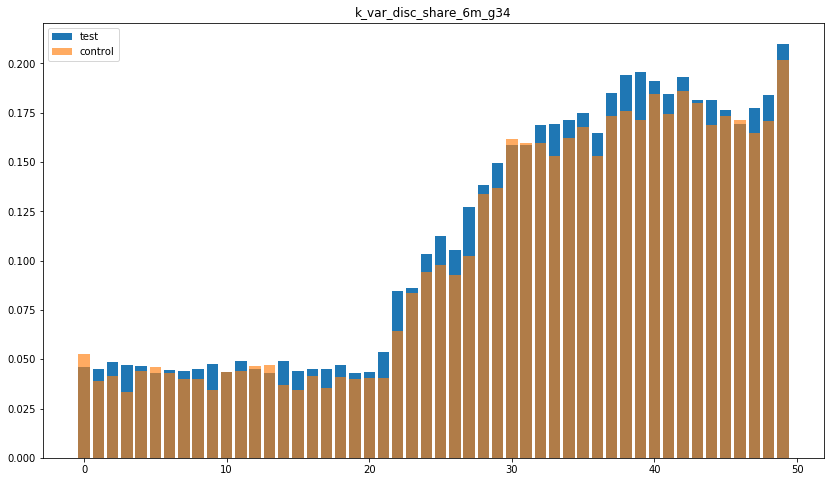

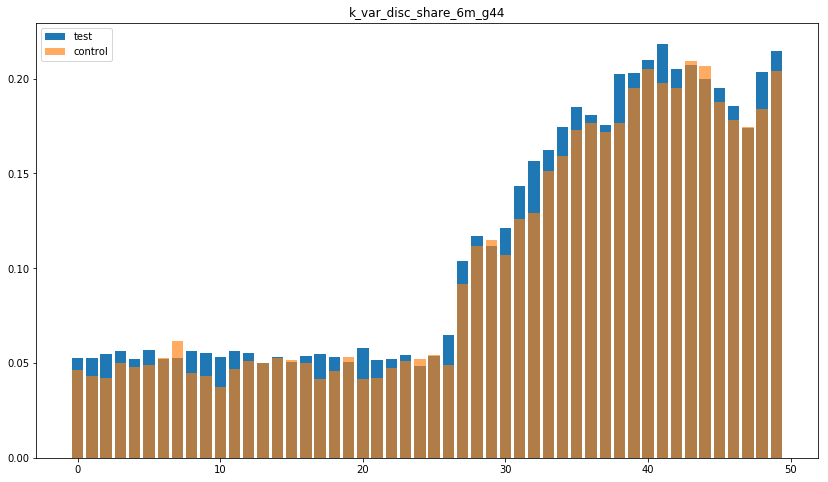

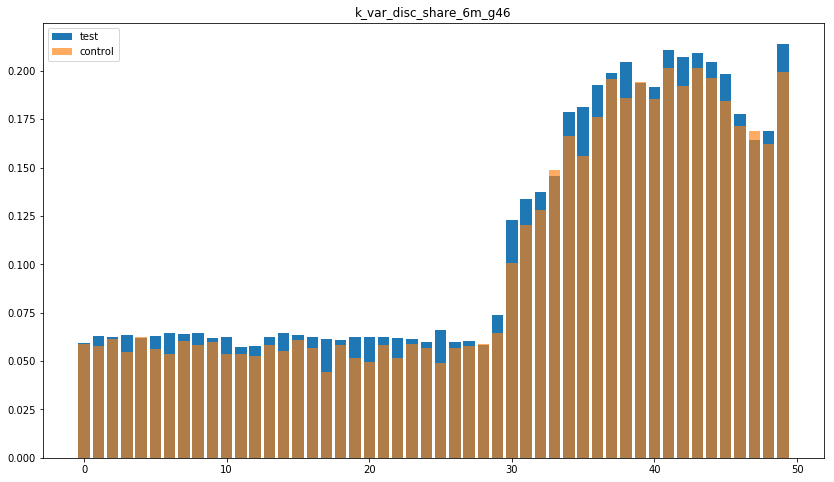

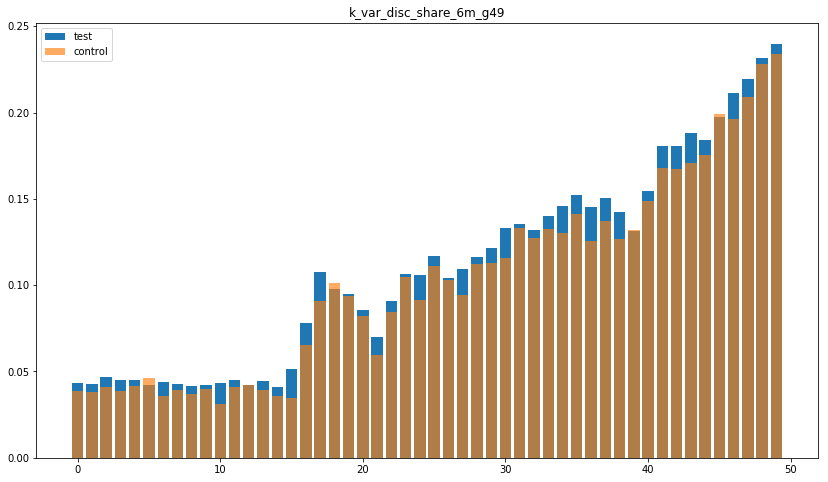

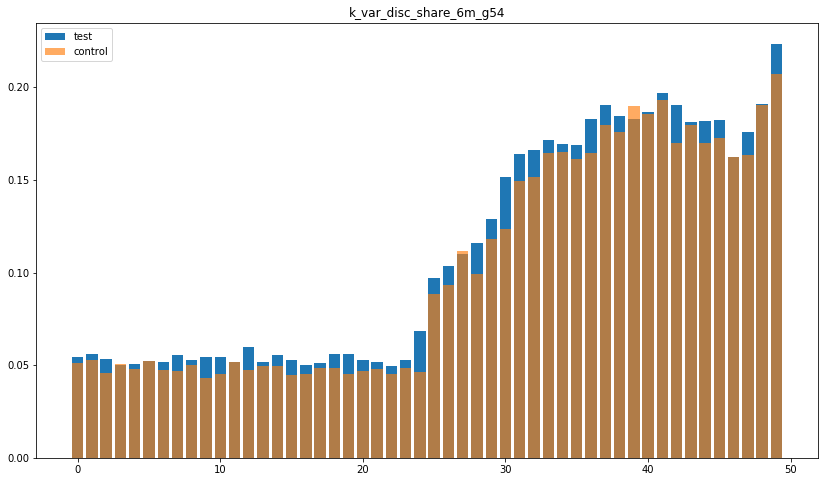

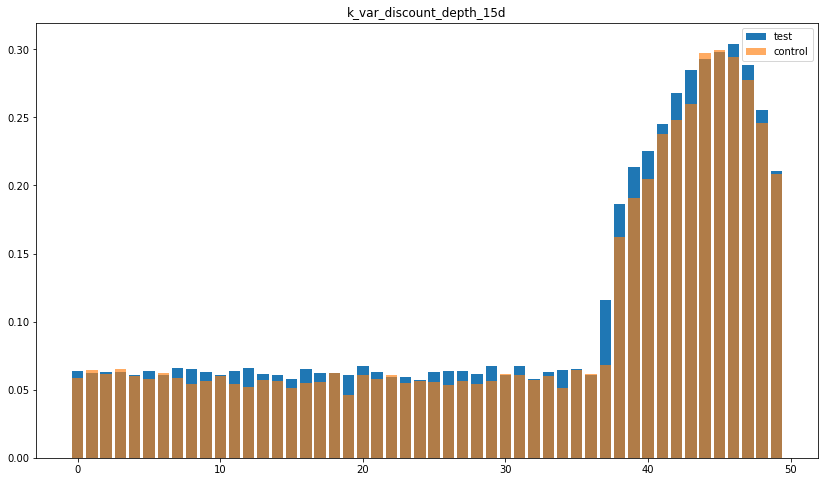

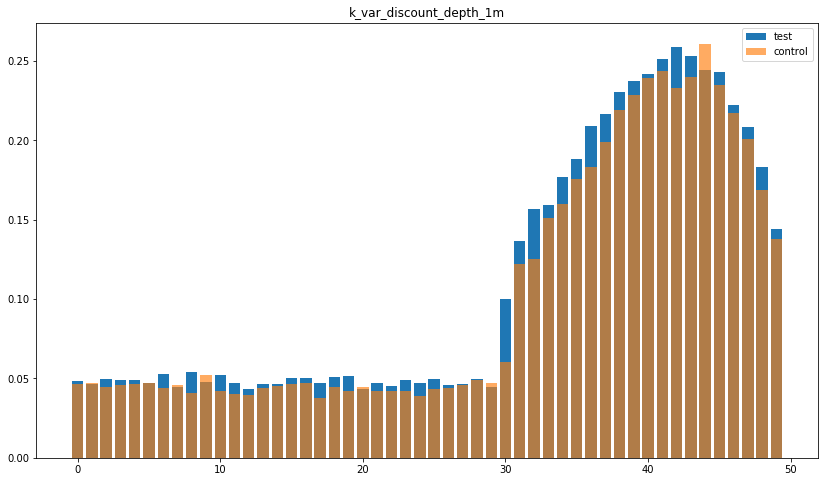

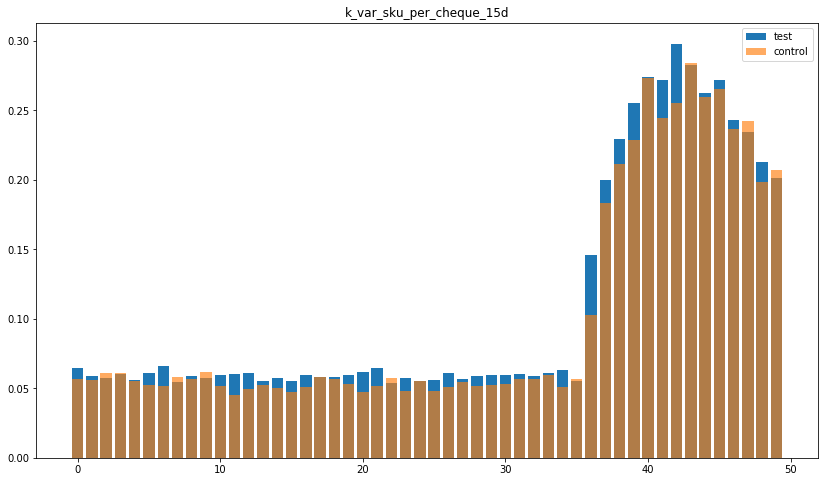

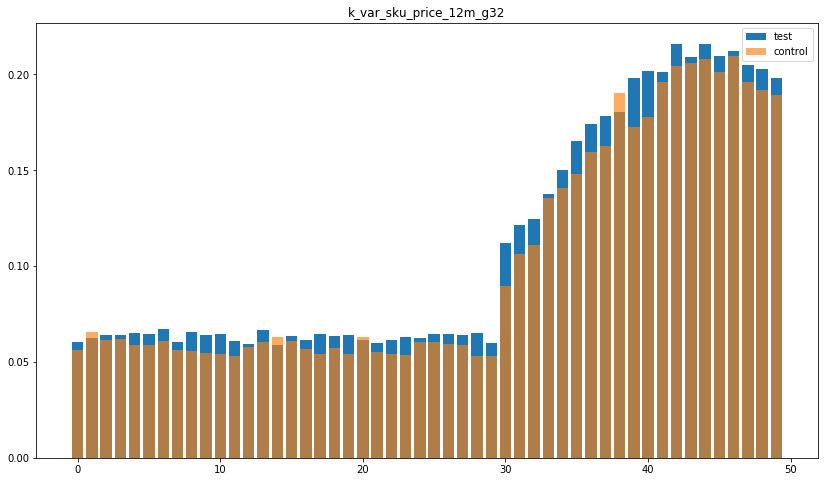

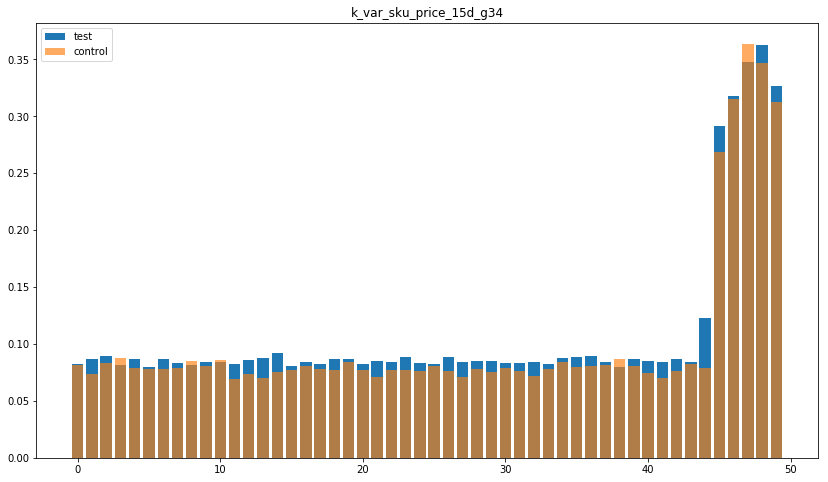

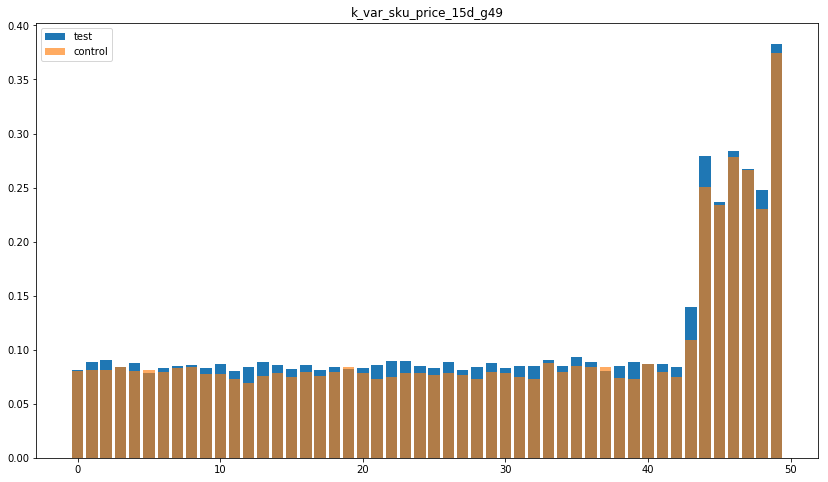

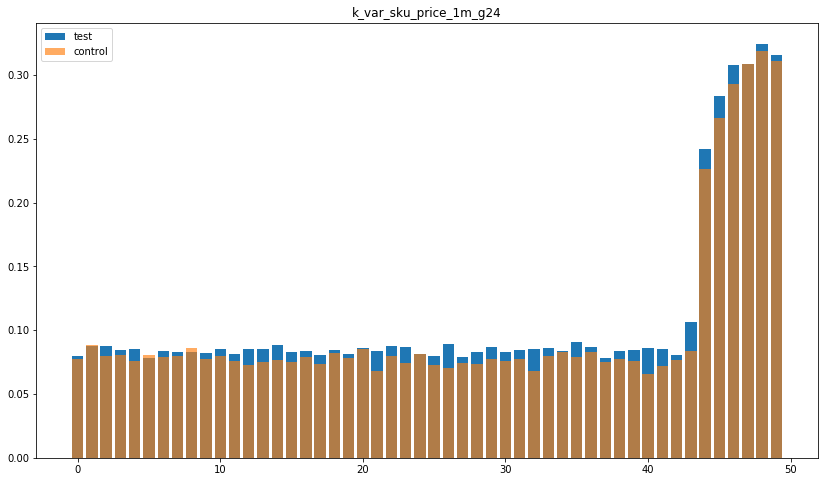

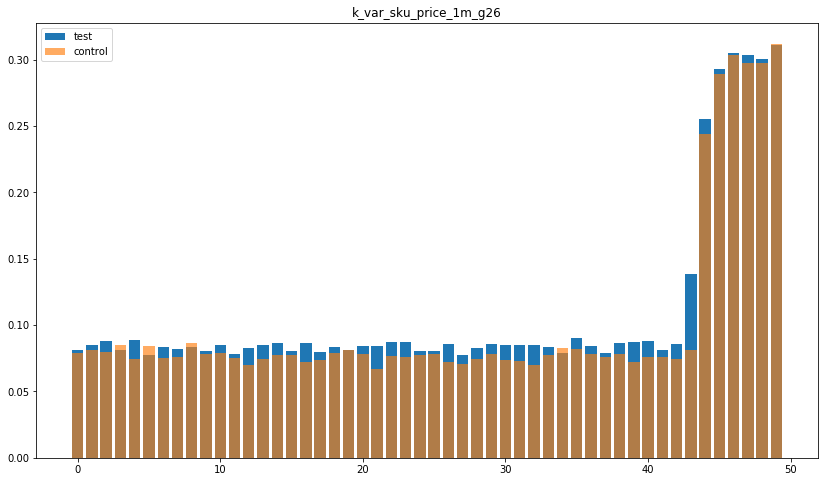

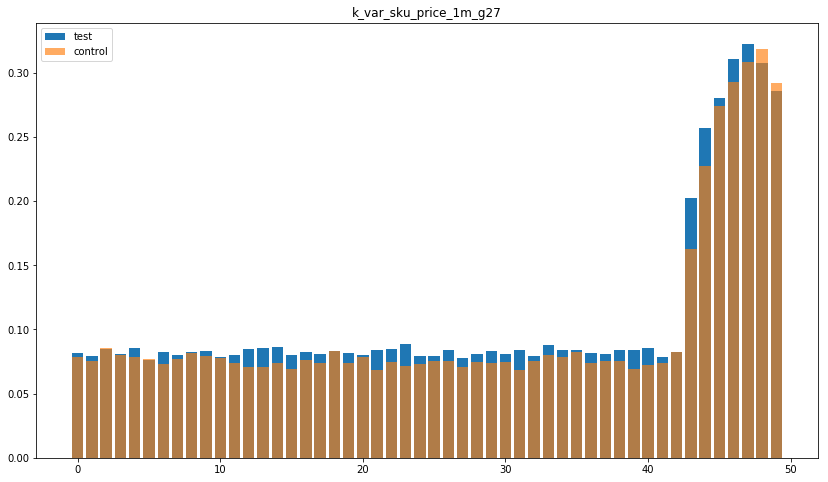

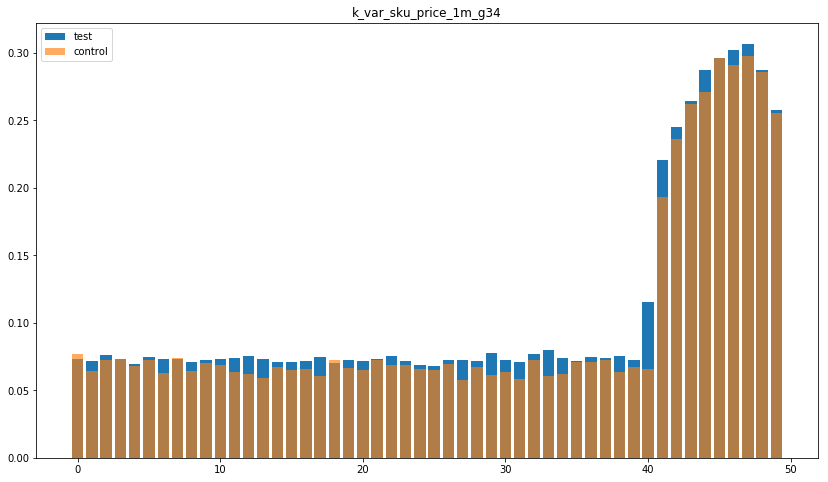

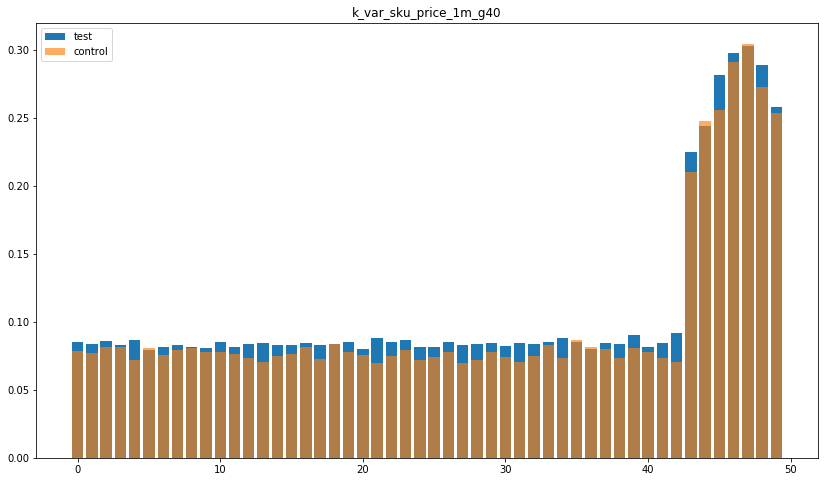

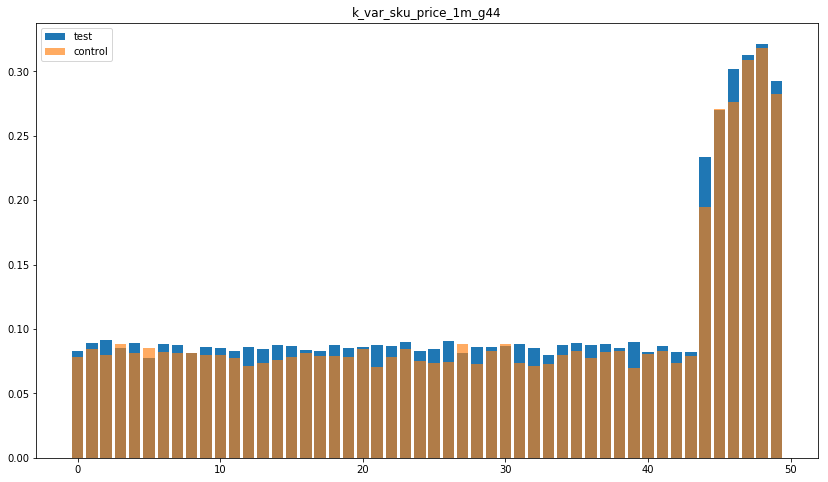

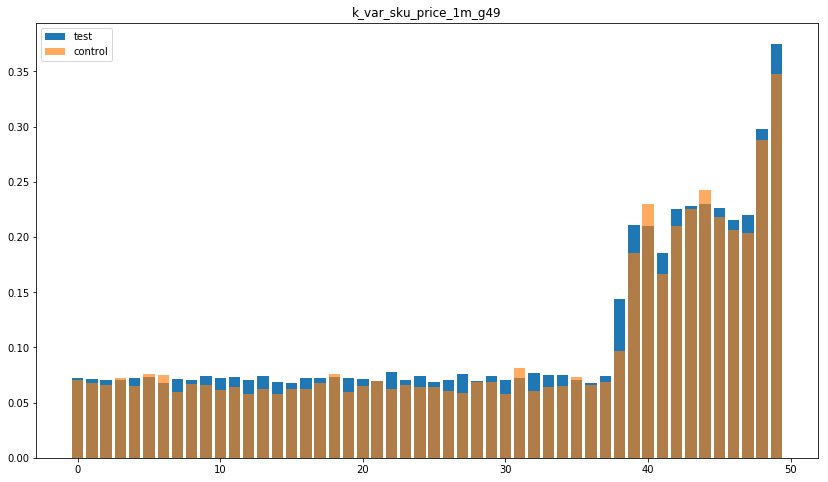

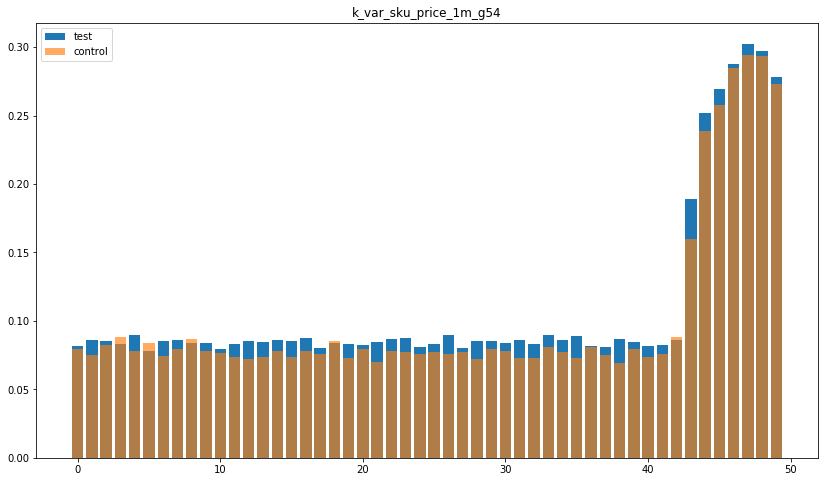

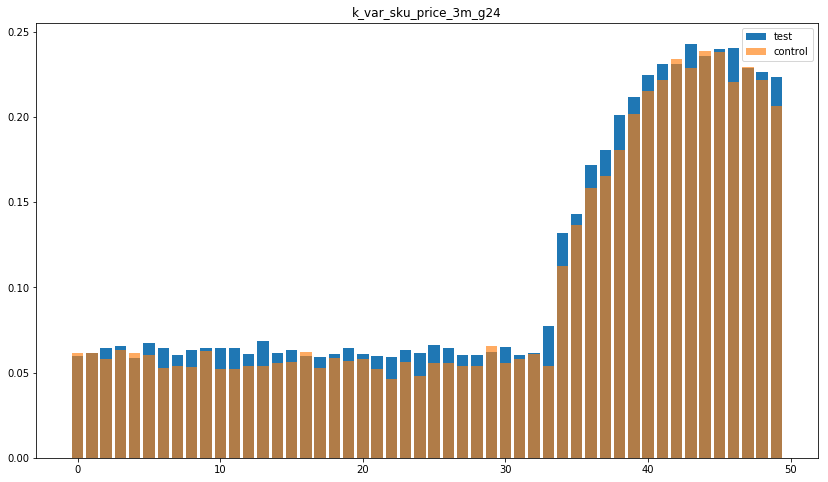

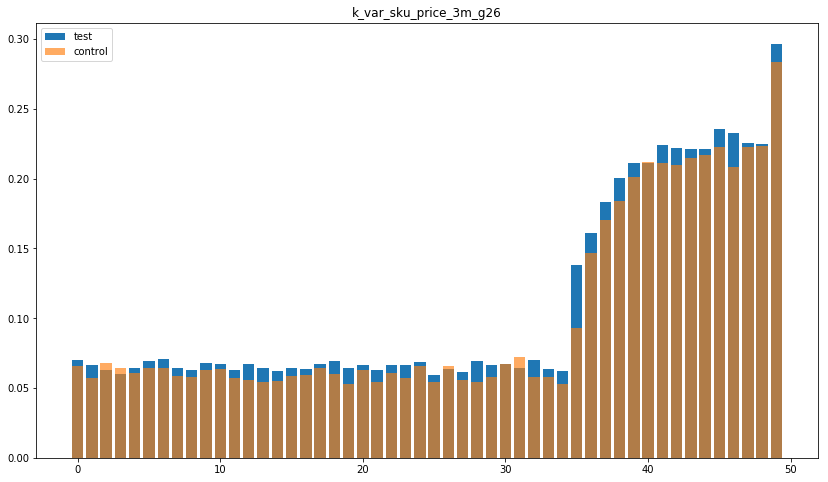

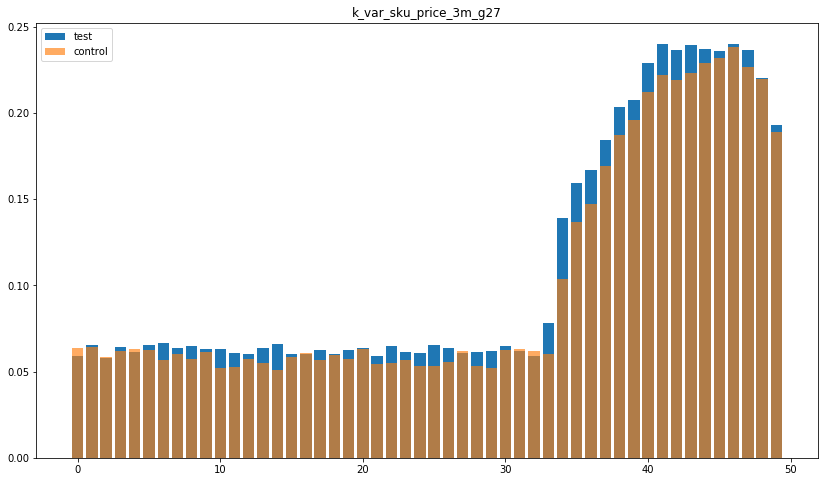

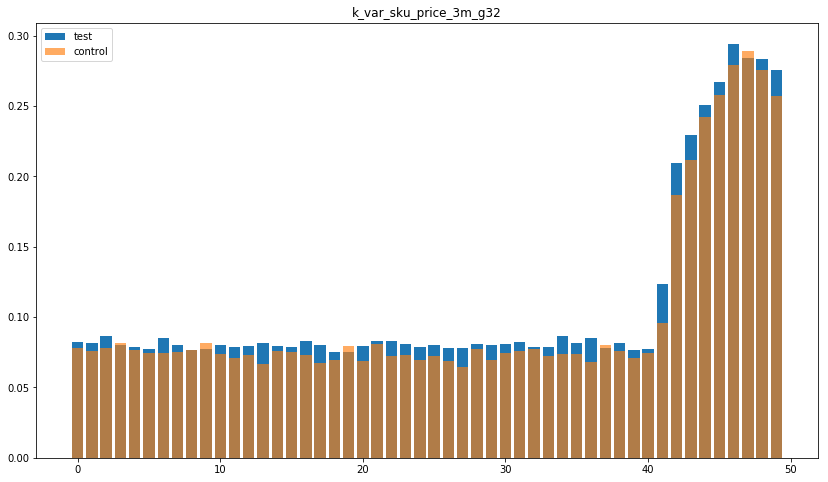

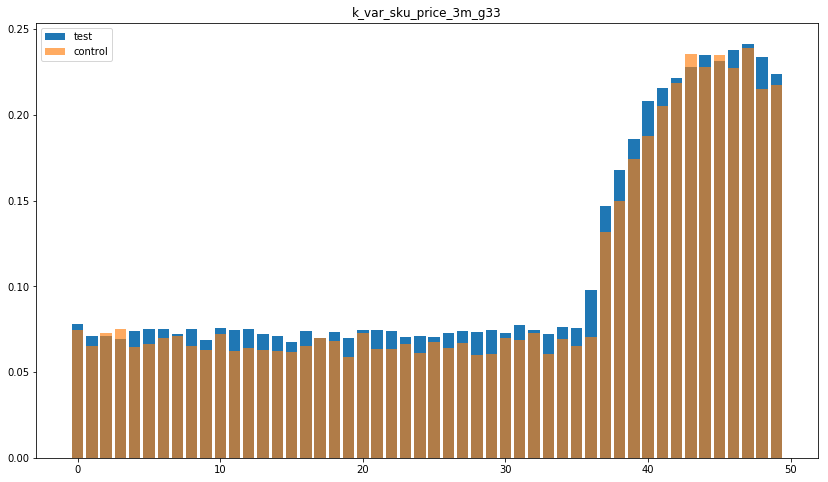

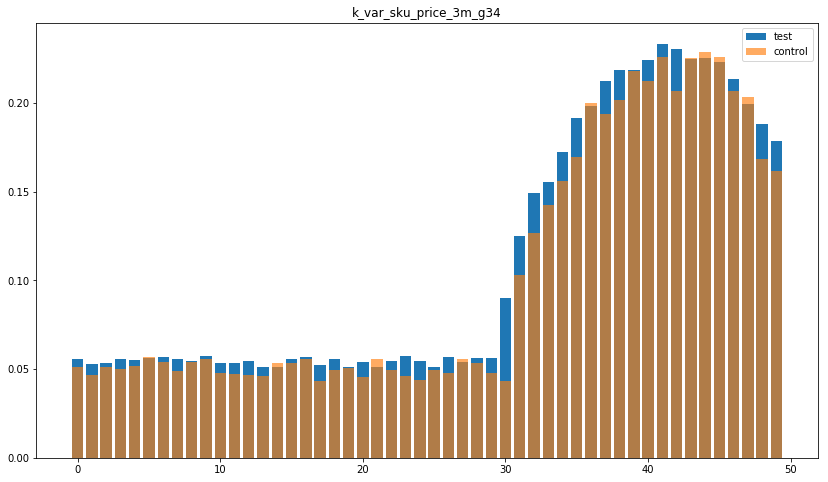

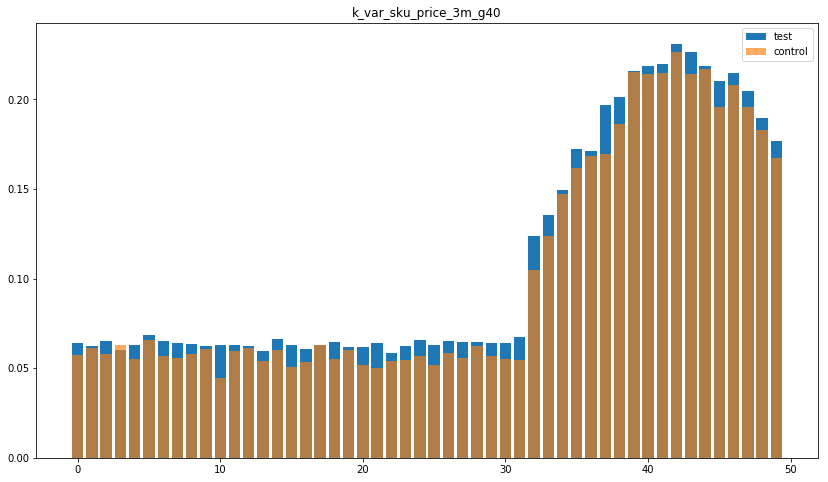

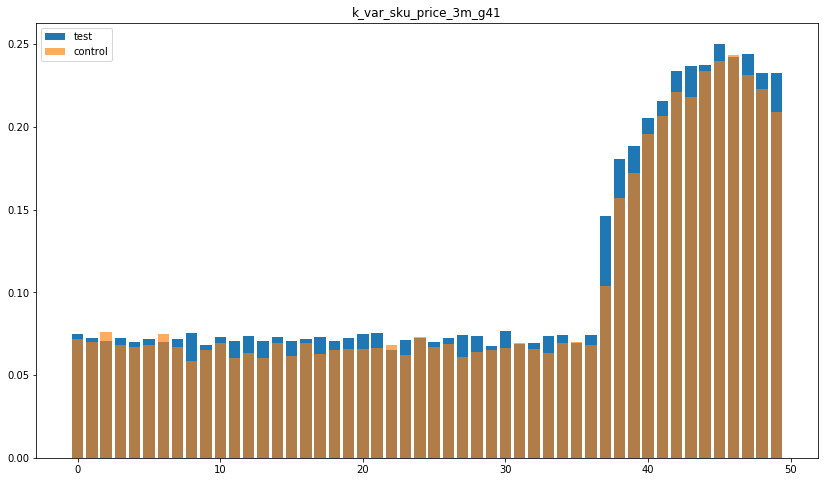

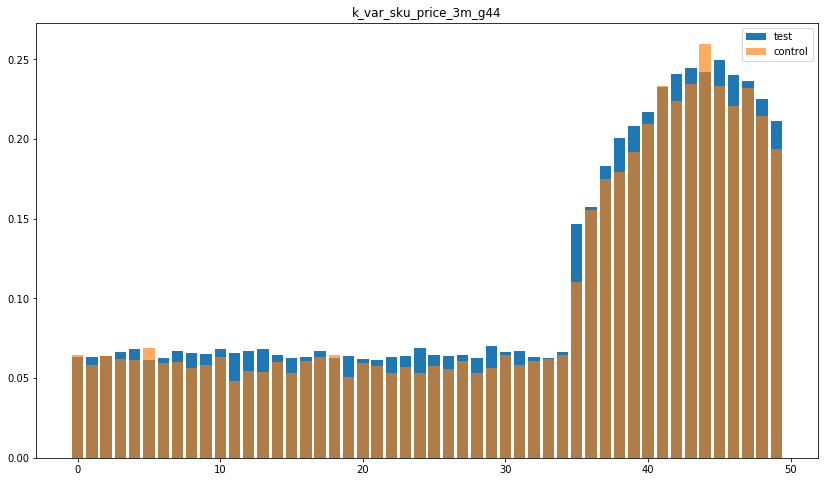

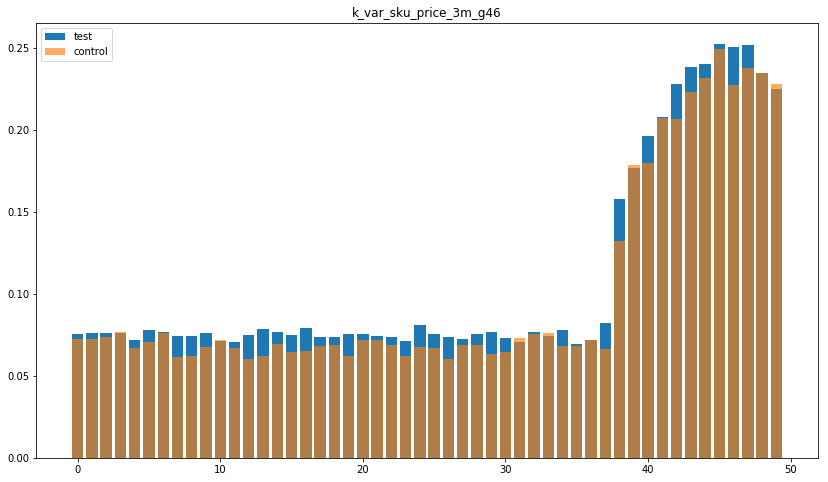

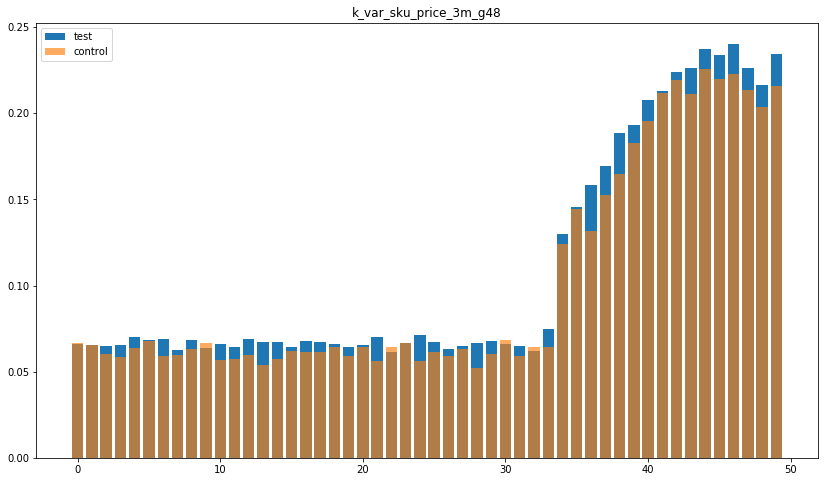

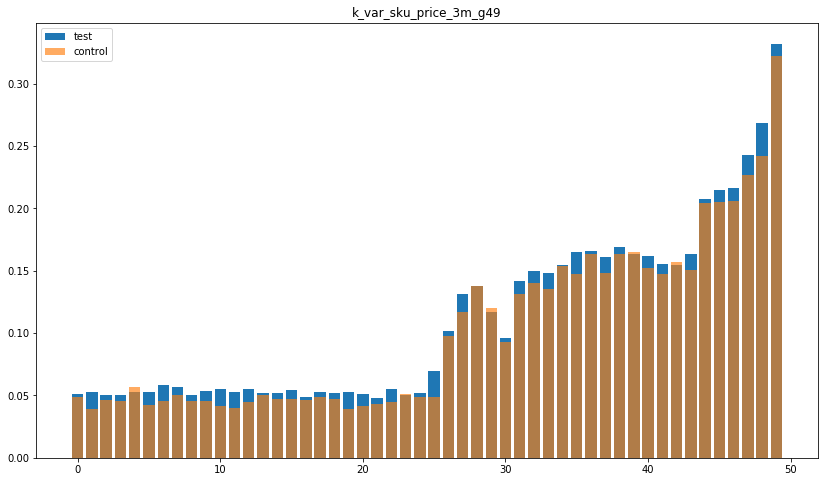

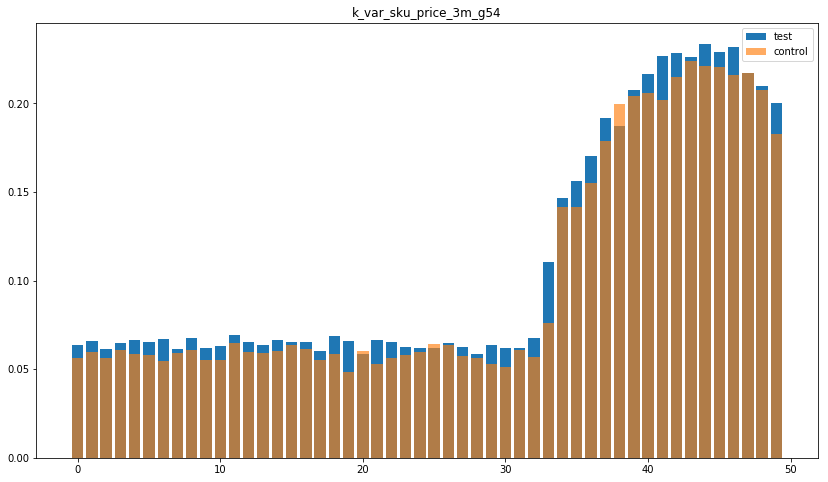

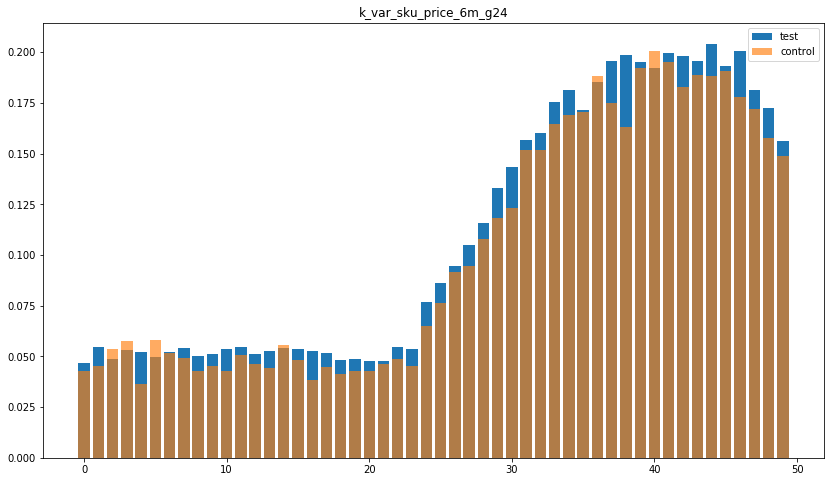

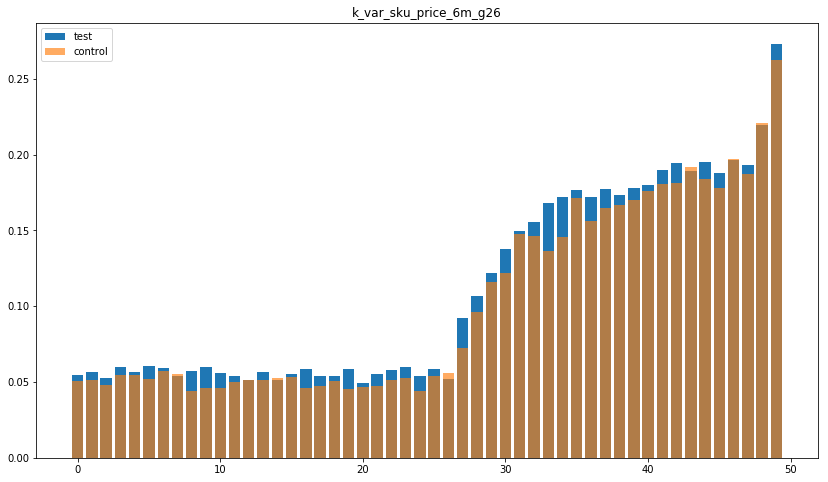

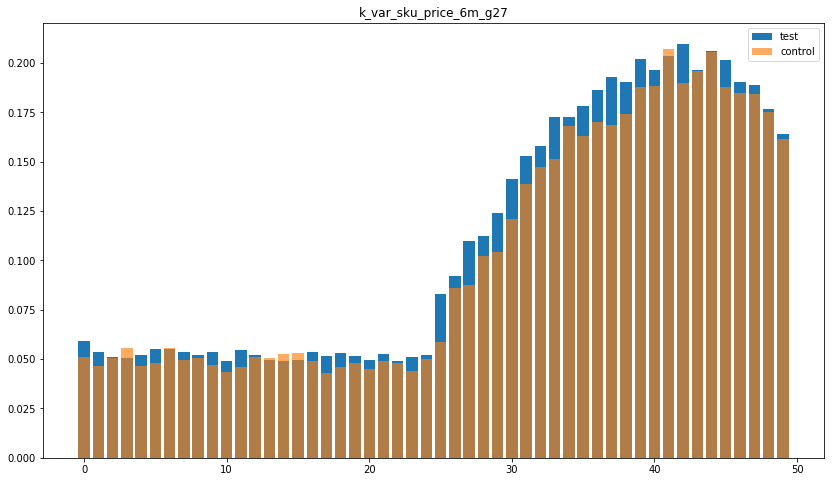

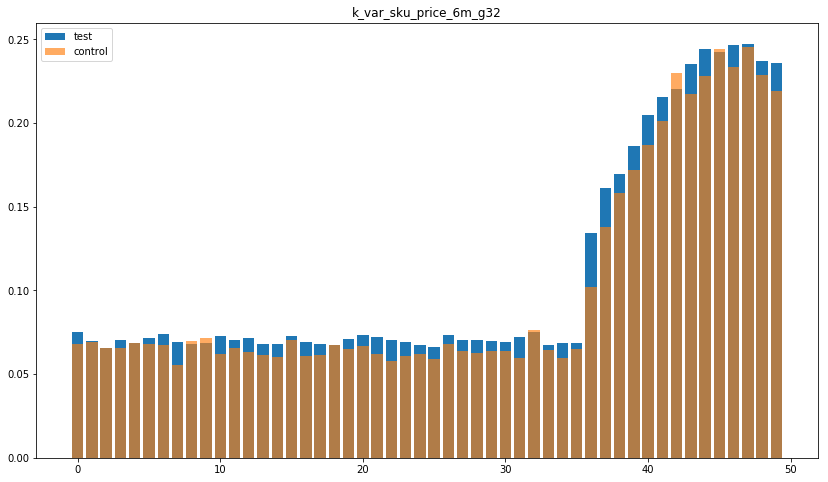

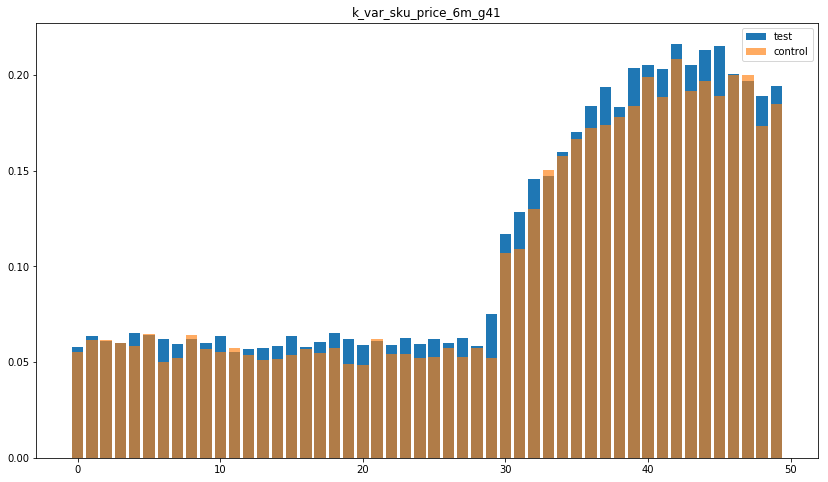

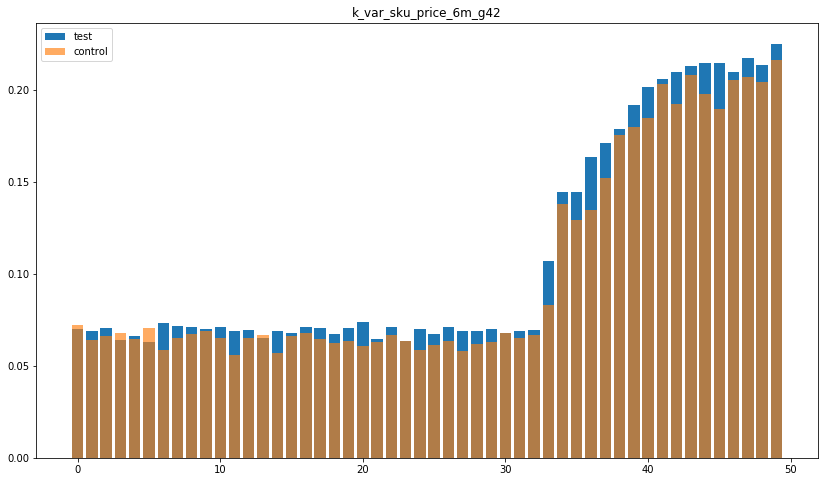

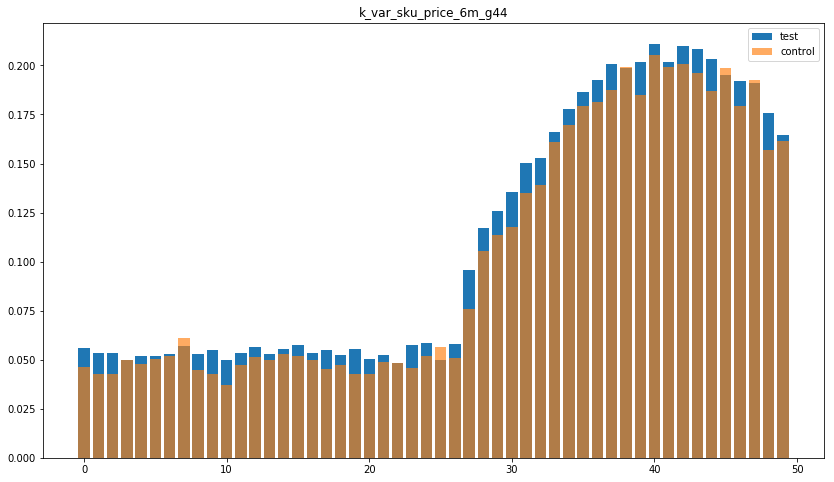

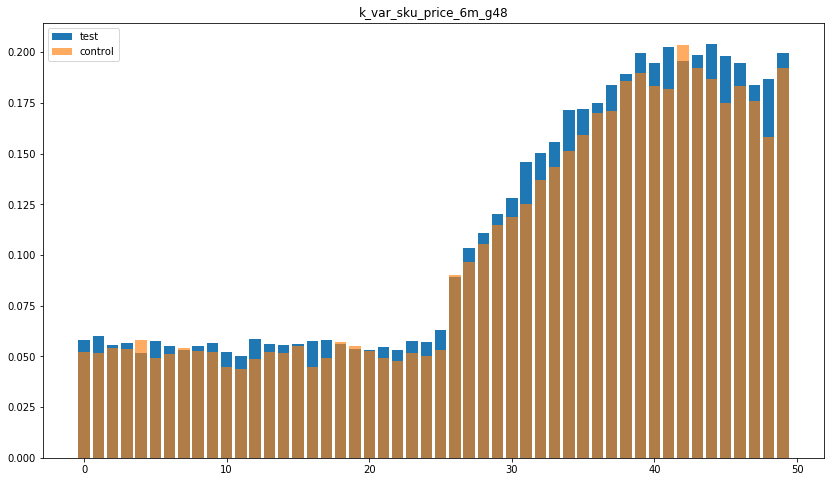

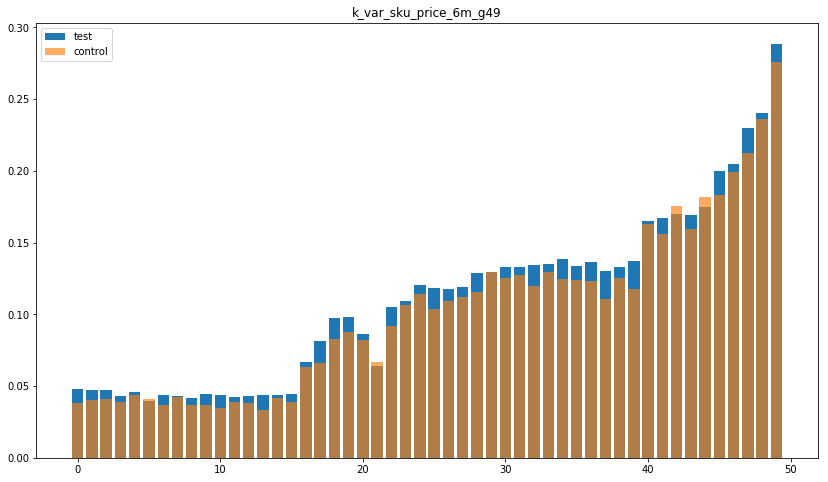

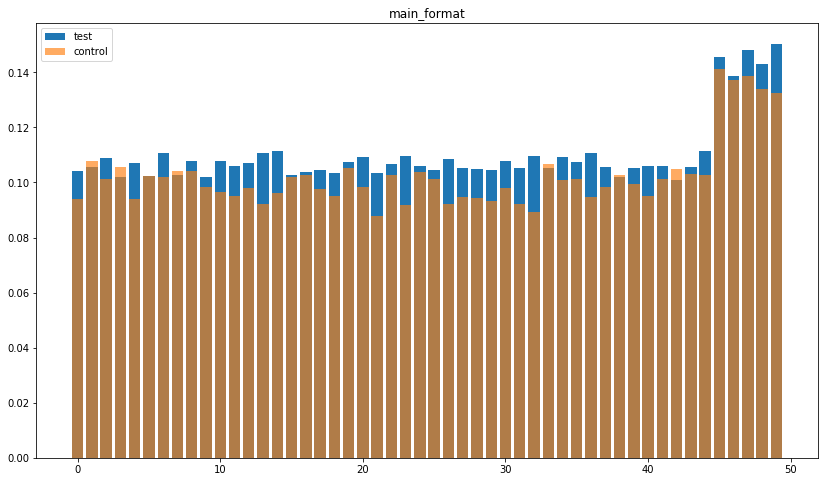

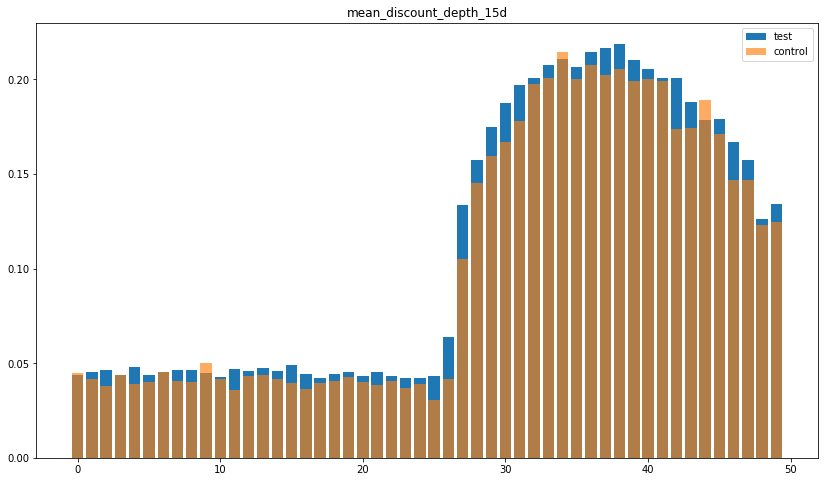

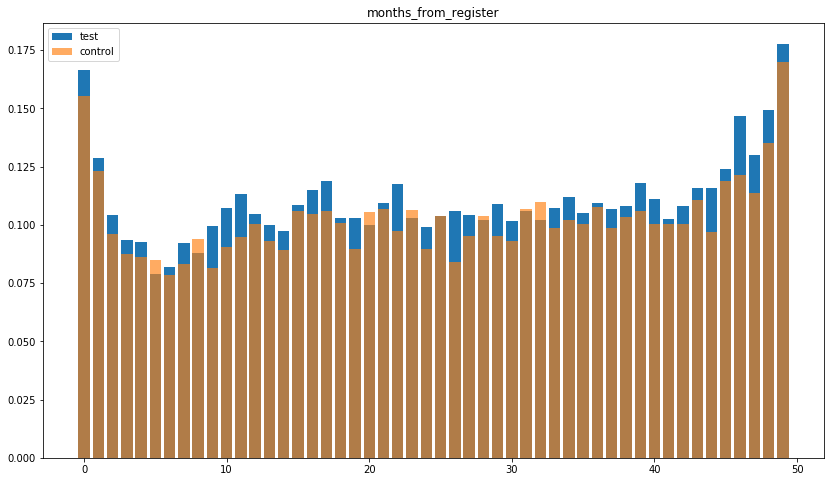

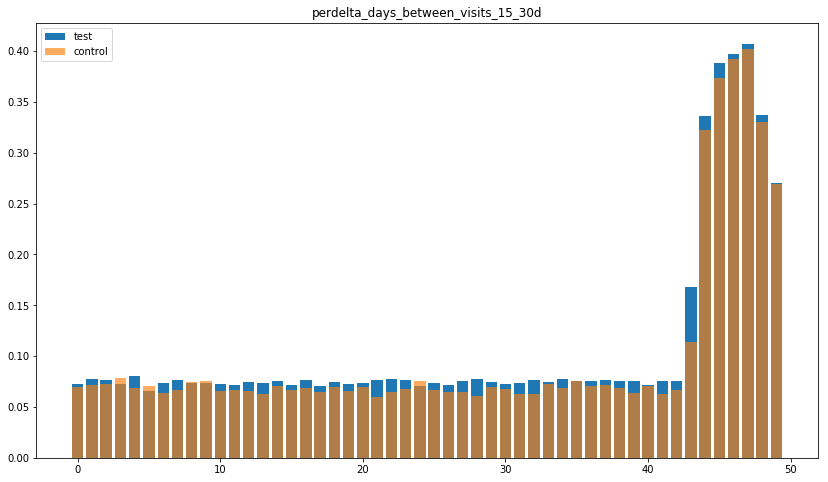

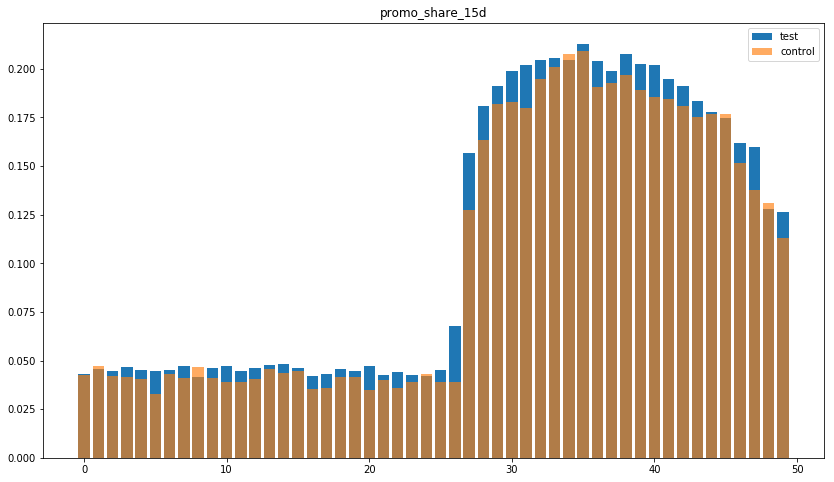

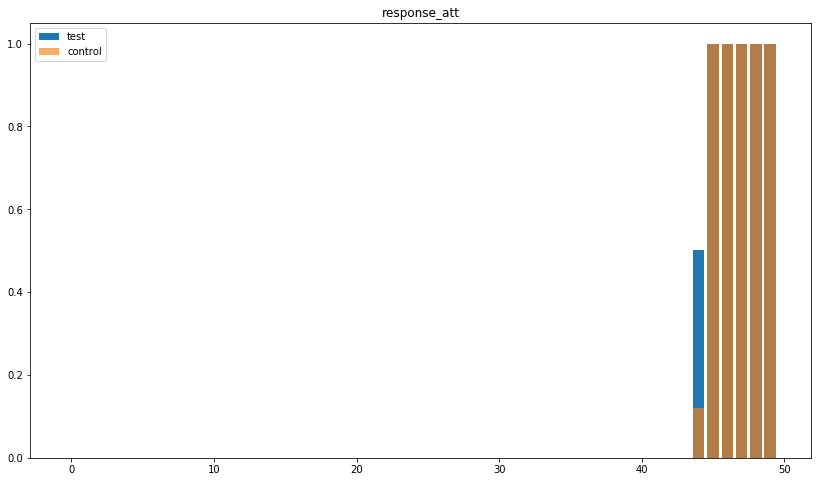

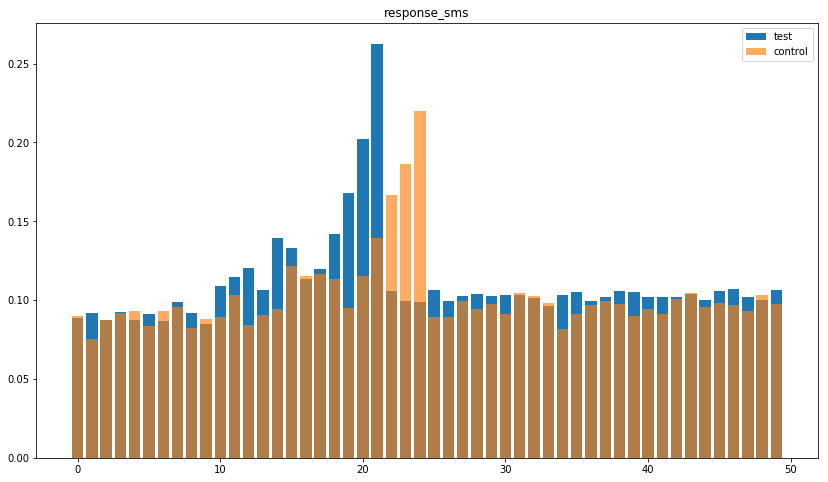

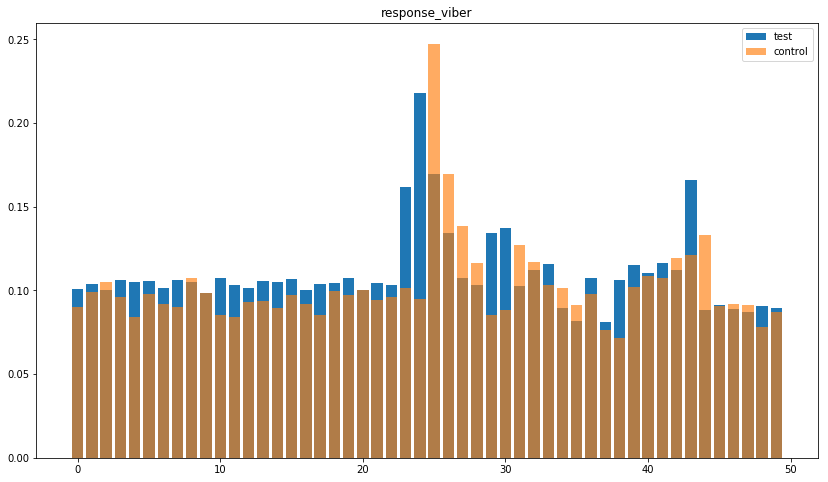

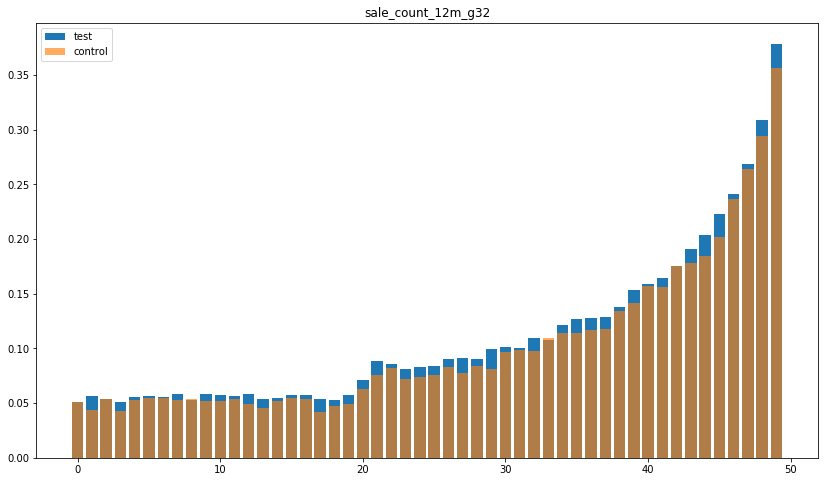

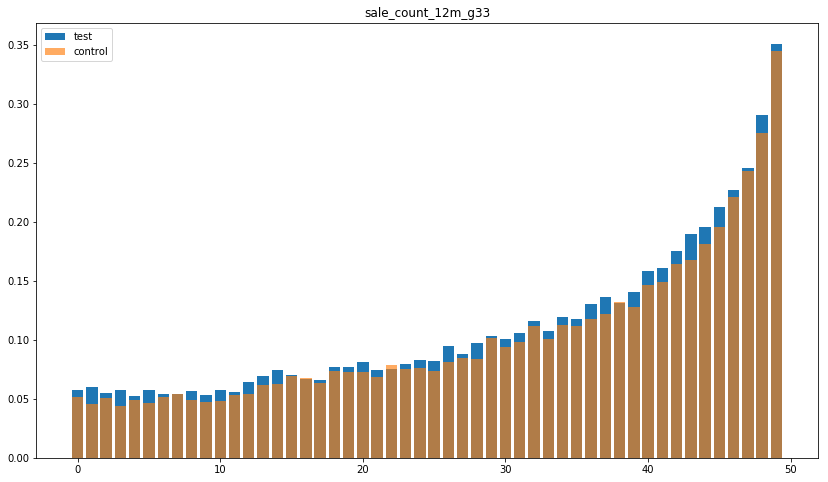

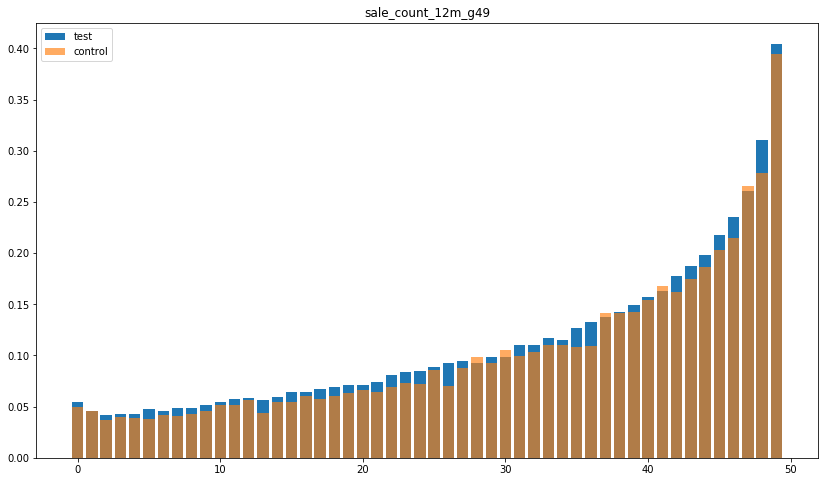

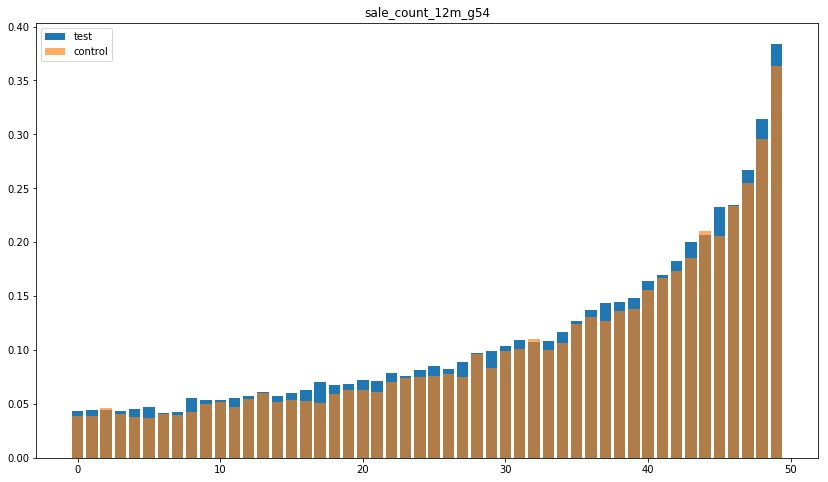

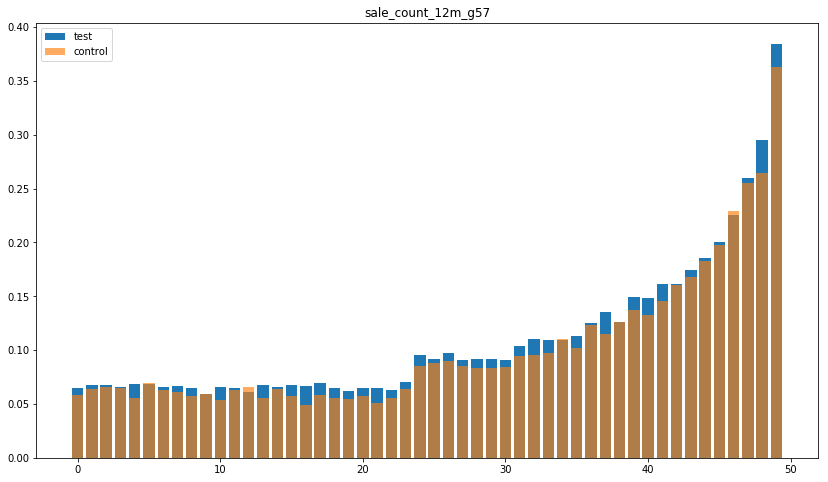

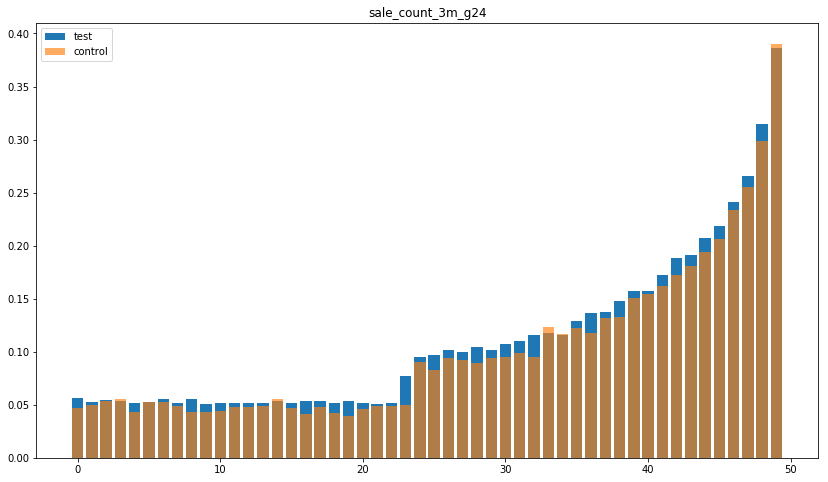

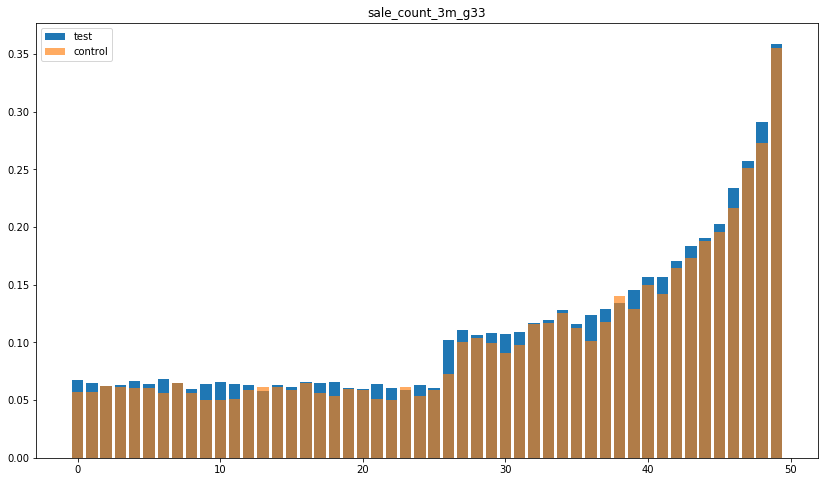

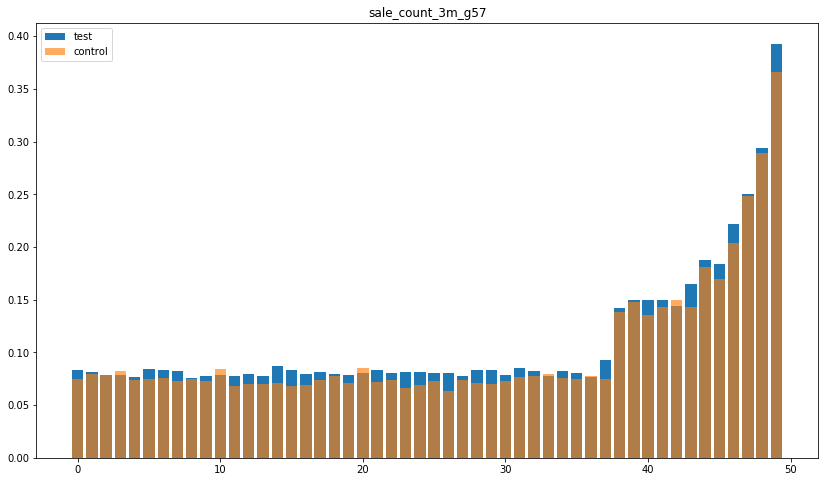

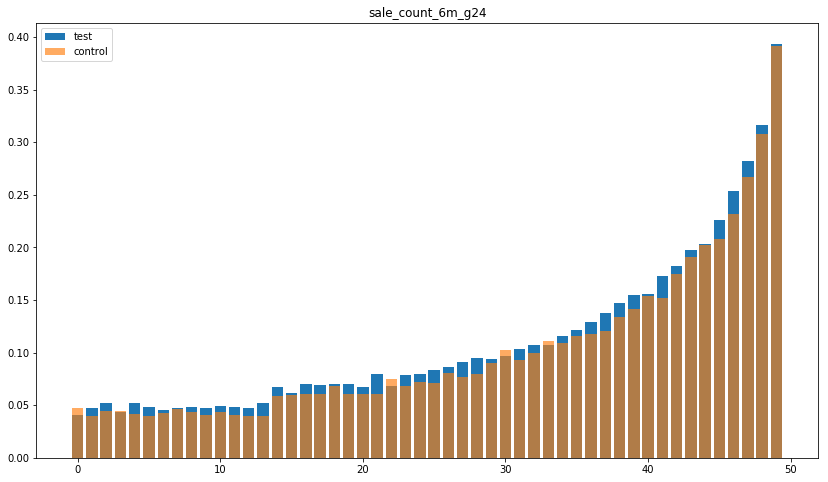

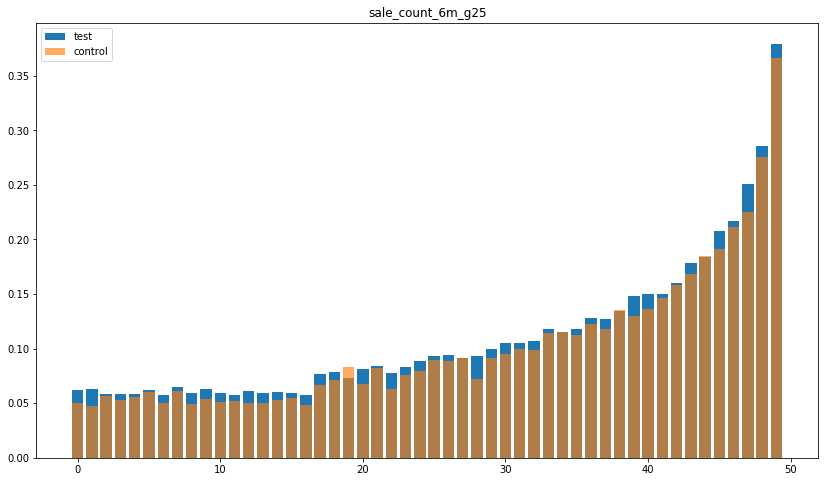

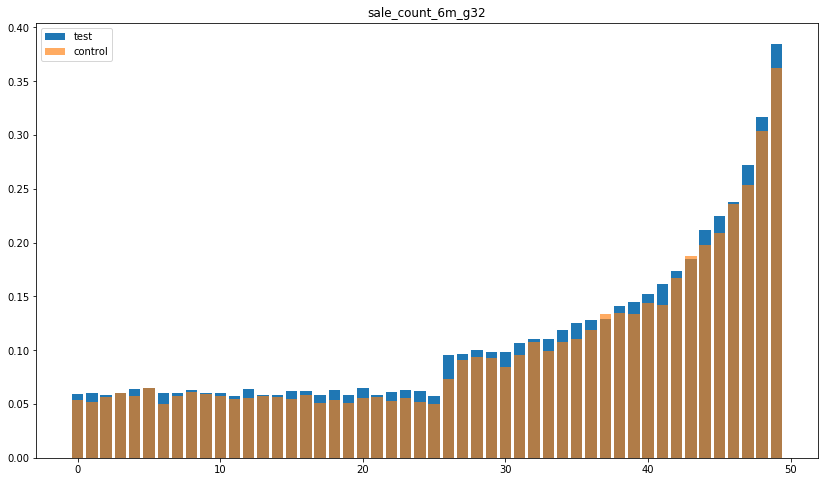

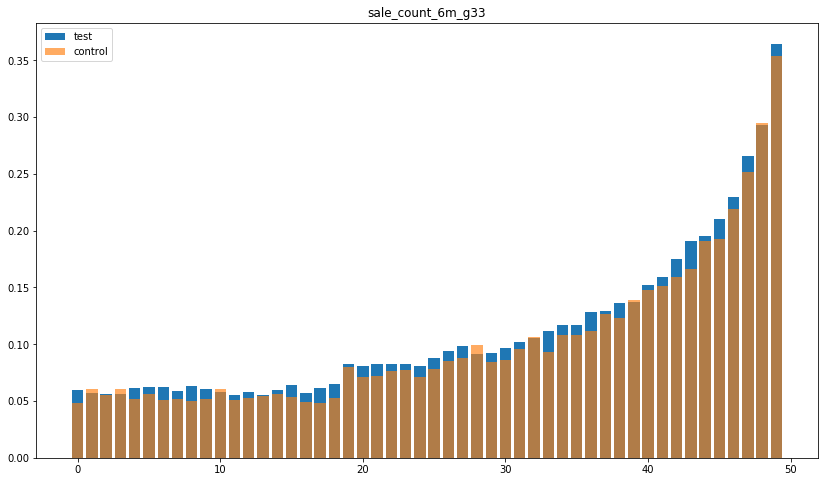

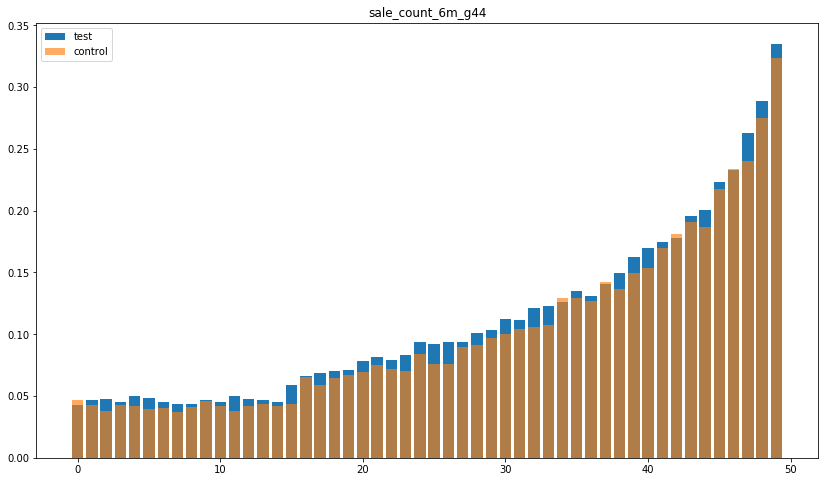

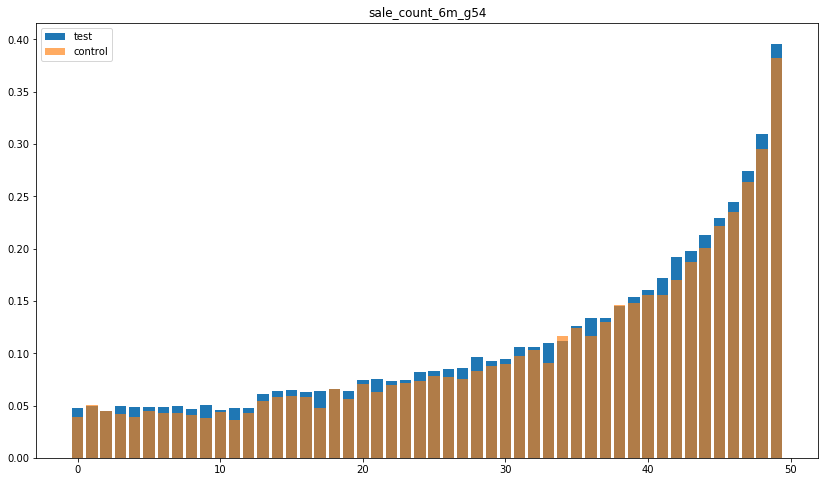

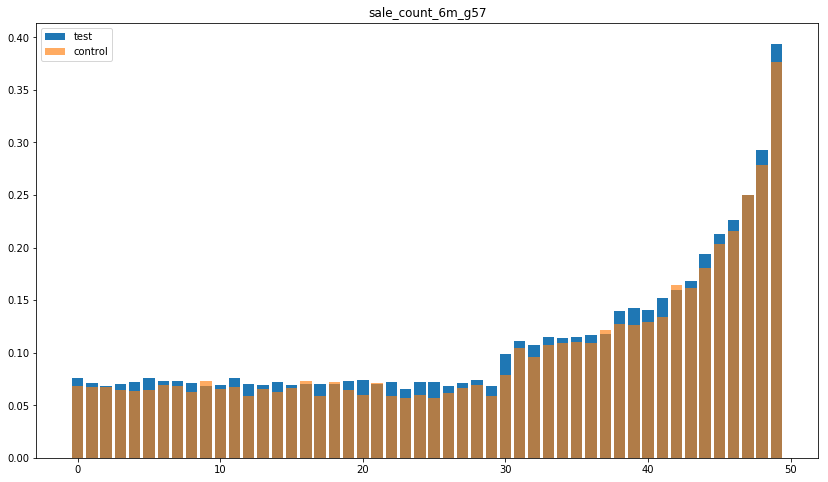

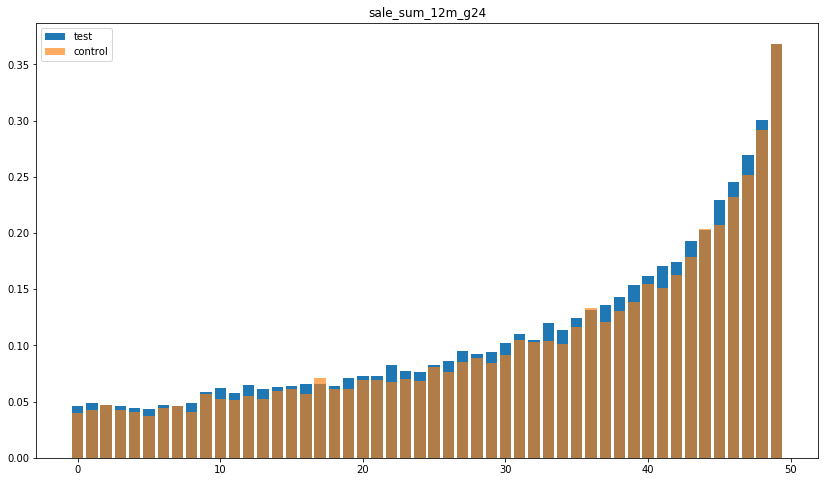

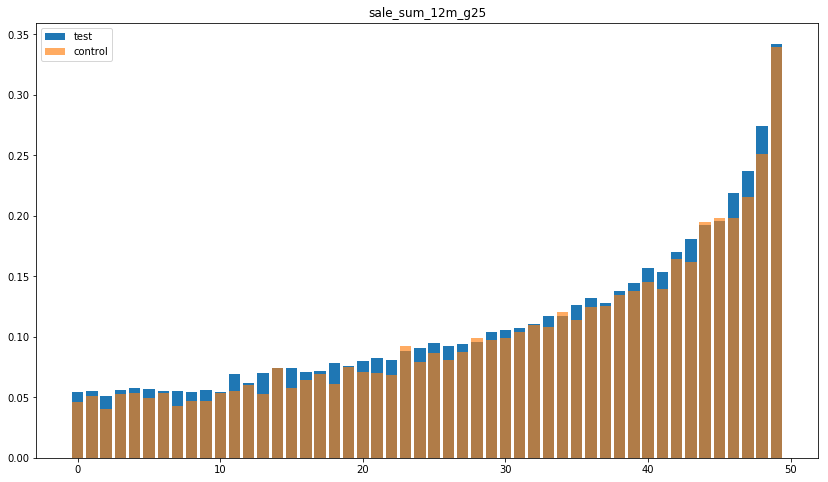

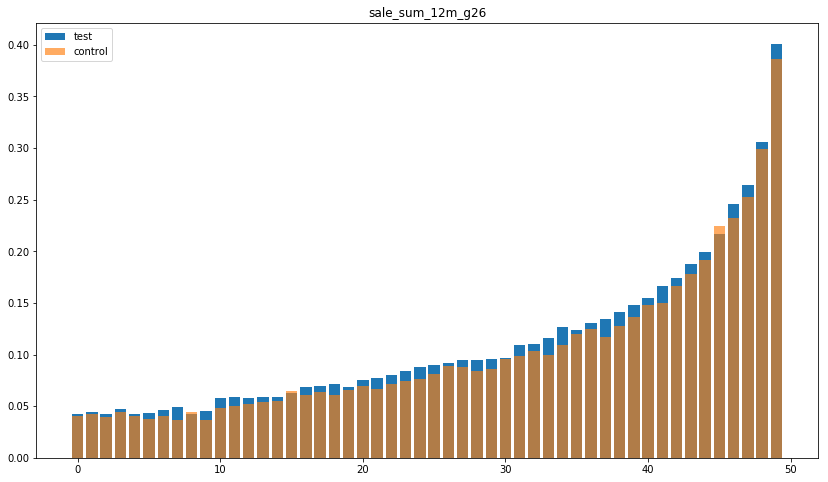

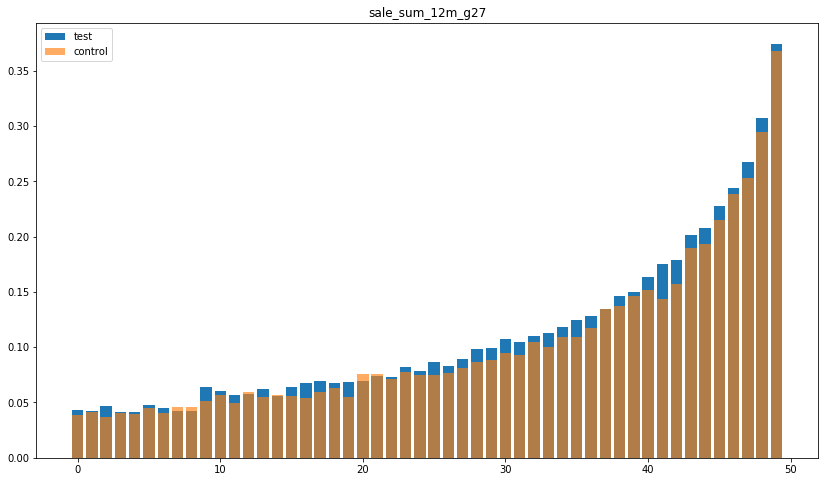

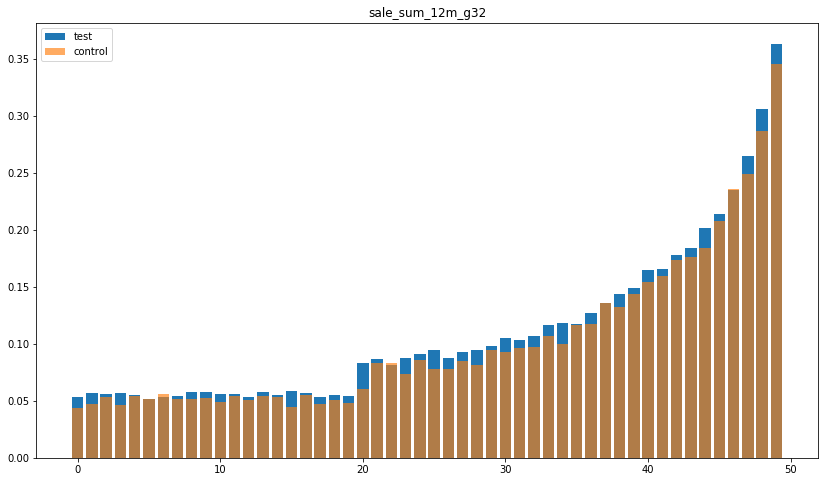

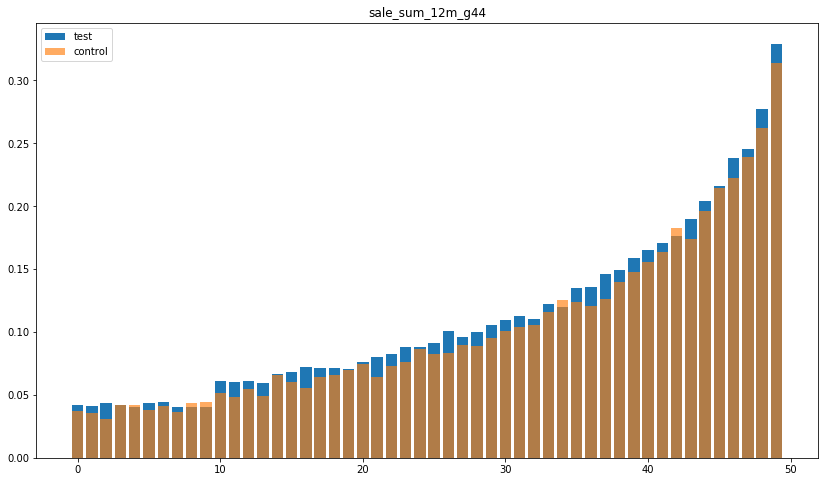

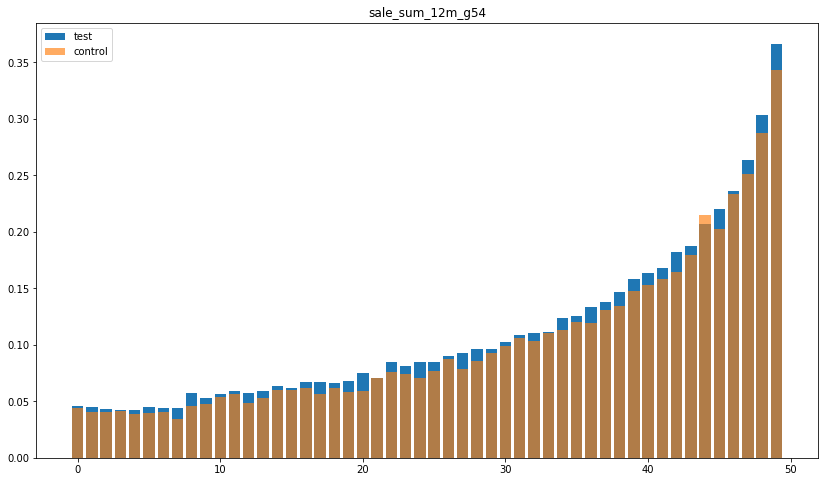

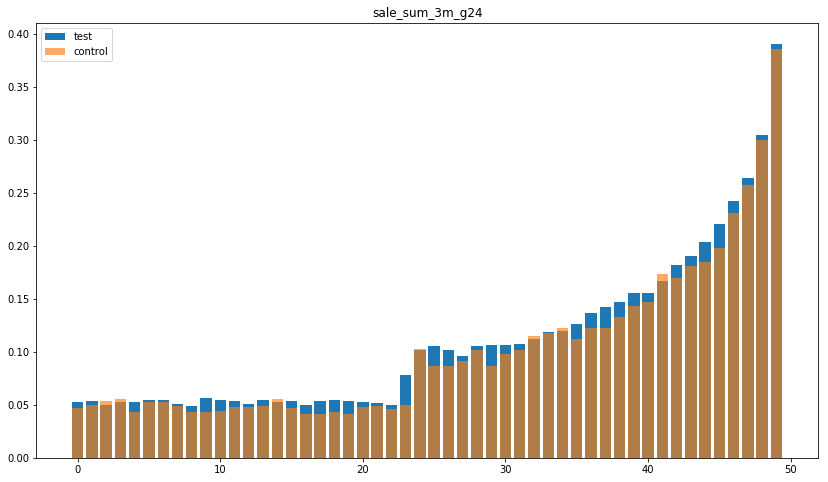

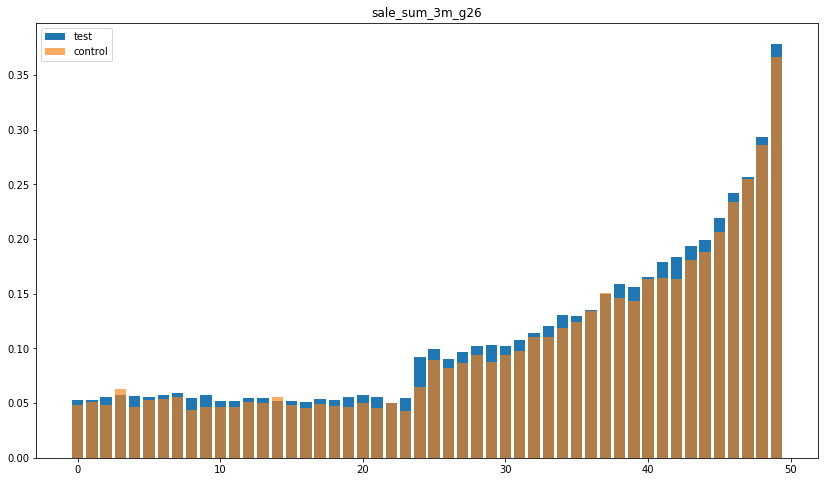

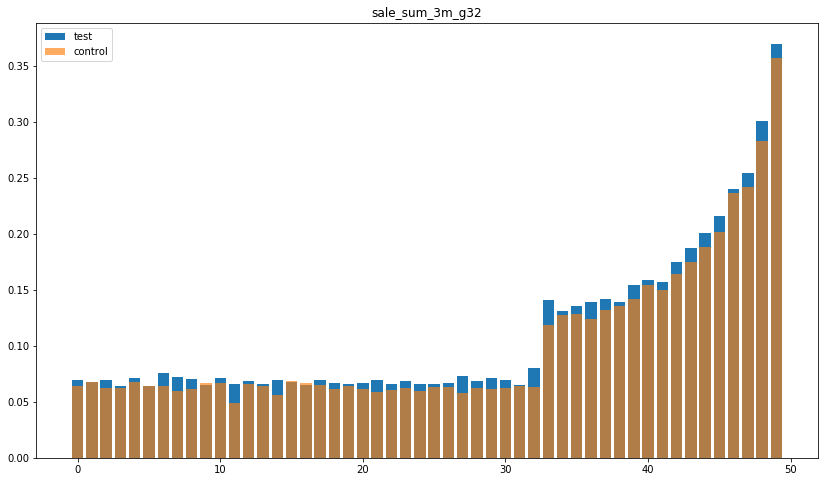

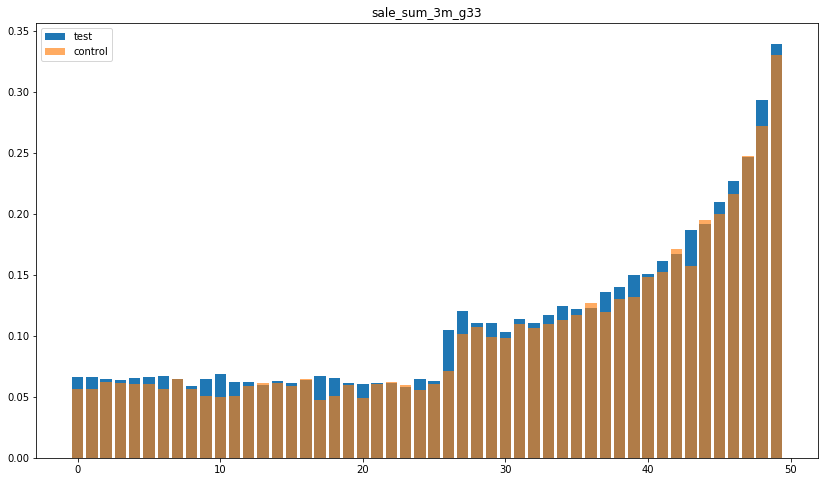

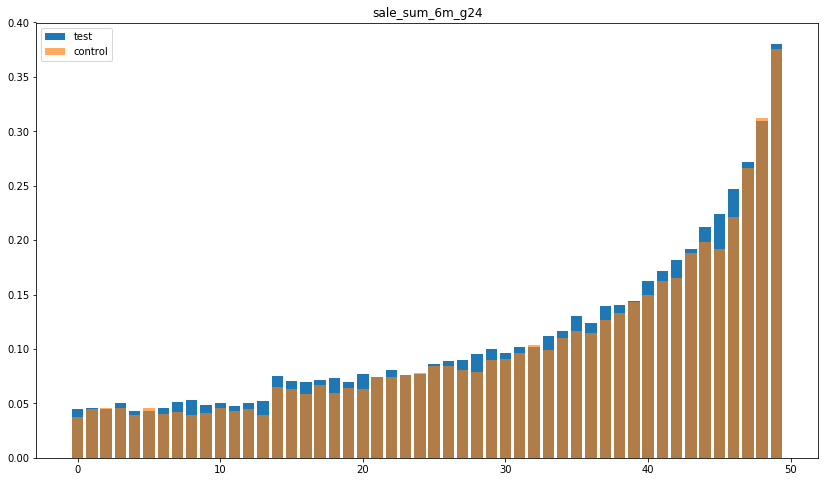

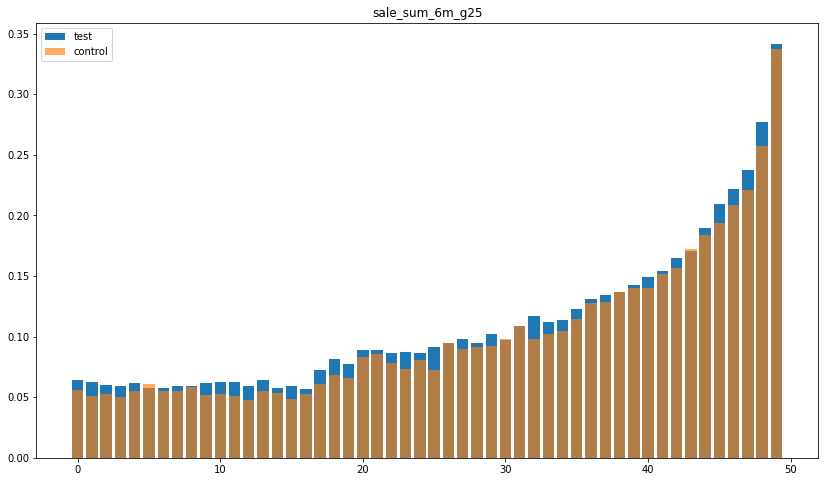

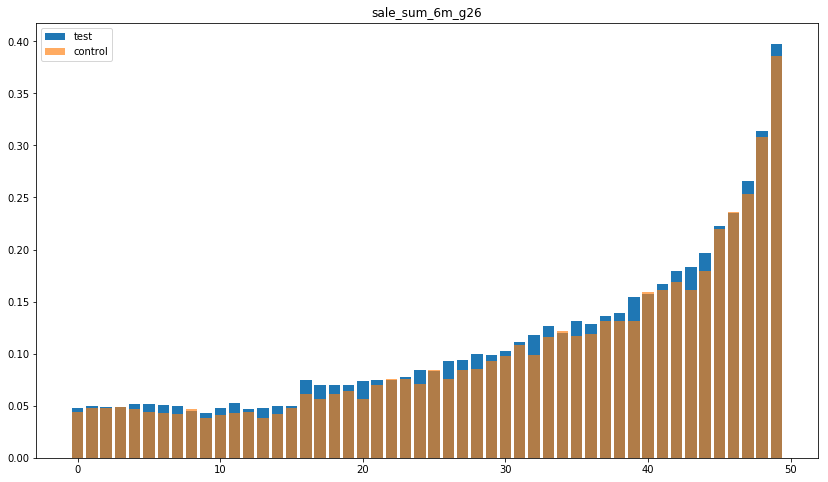

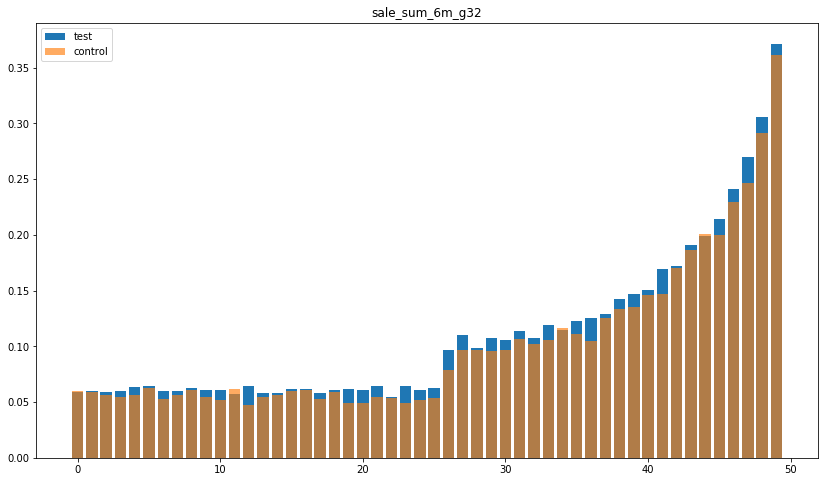

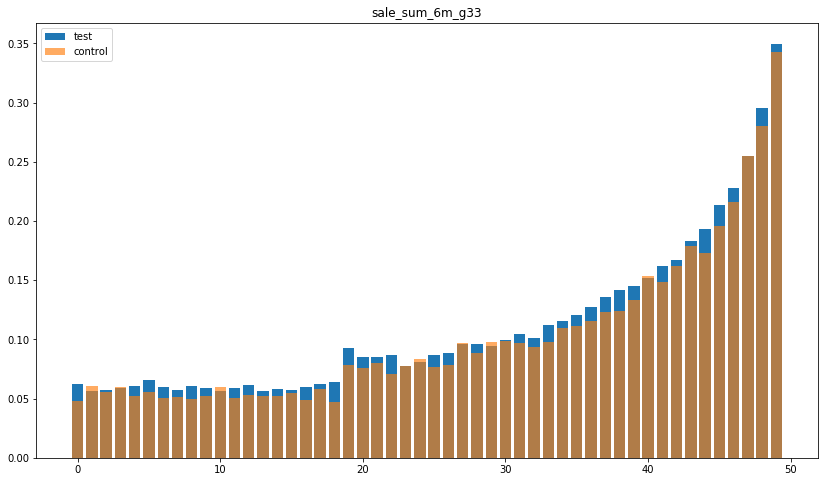

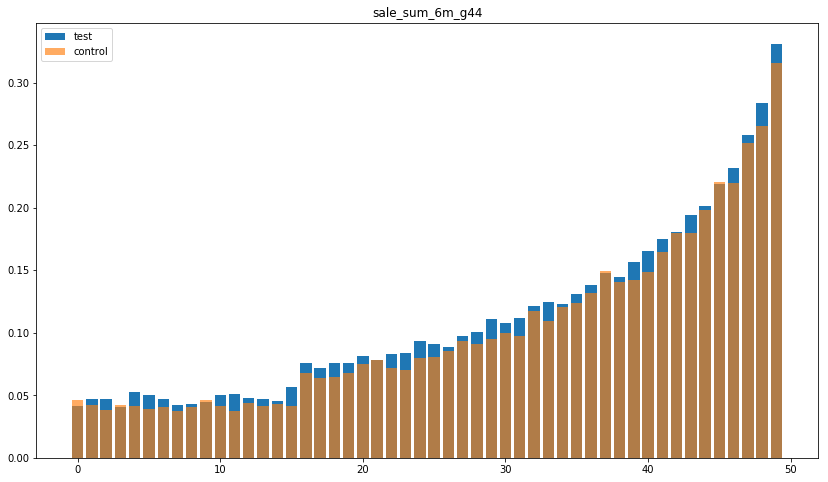

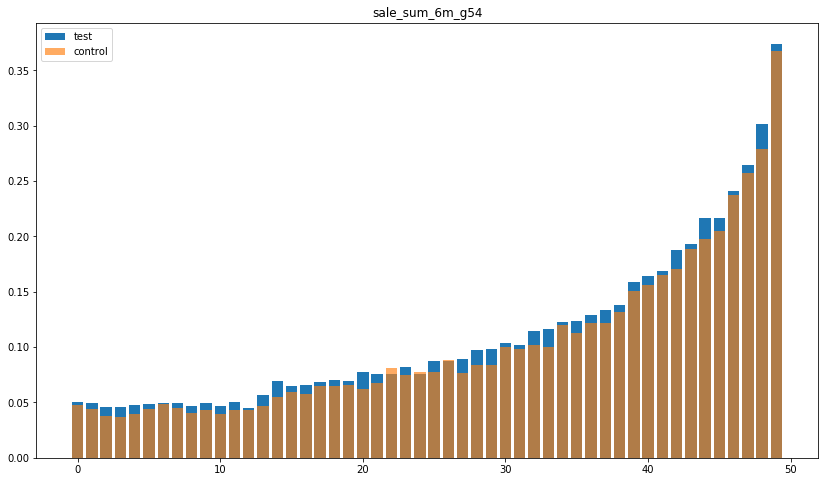

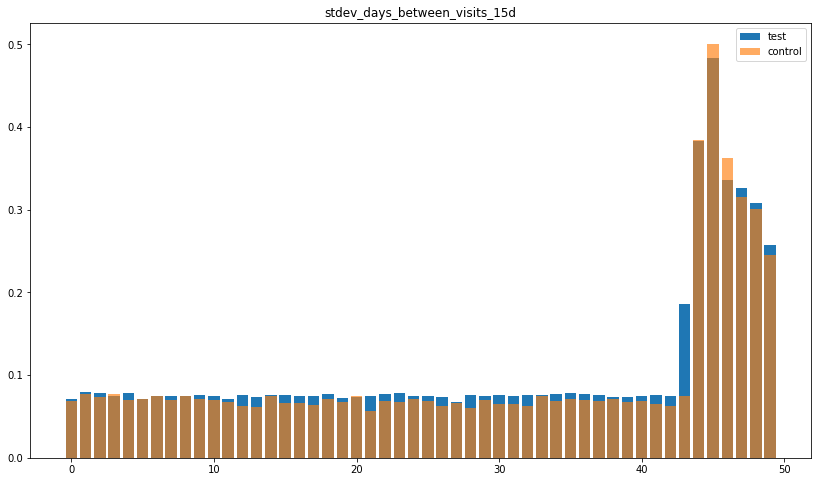

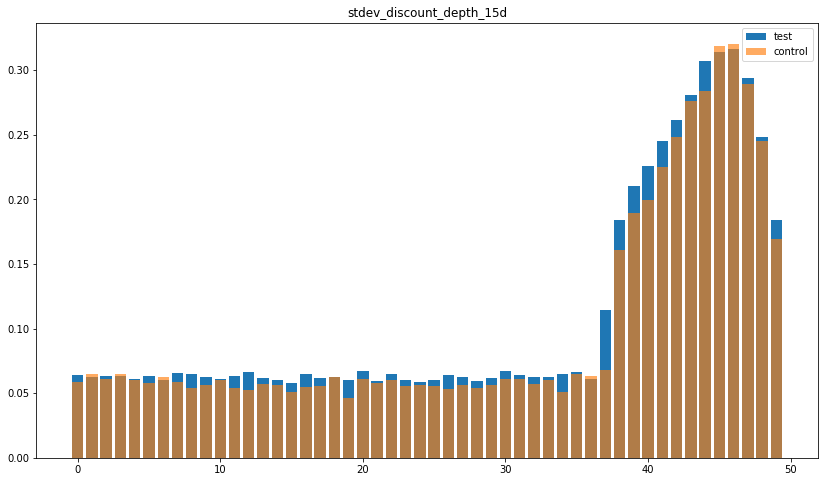

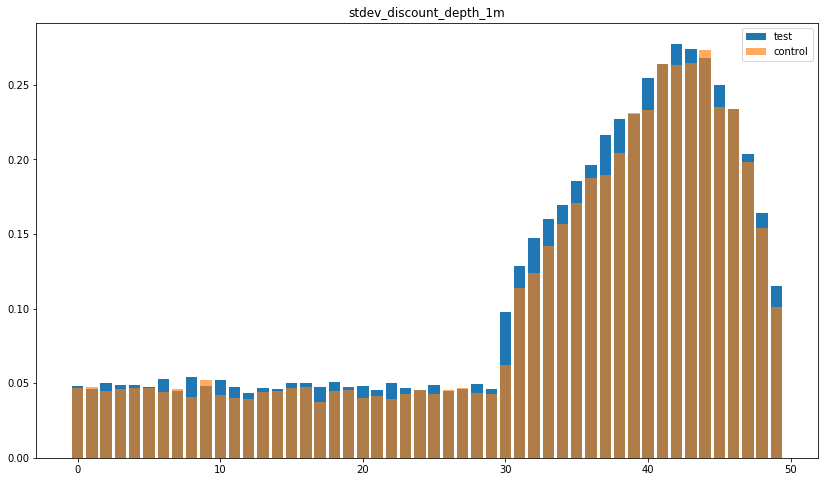

In [43]:
for column_name in list(pdf):
    bars_graphic(pdf, column_name, 50)